# Group 4 Final Project ISC4242
## Predicting Students' Dropout and Academic Success

In [1]:
# Necessary imports
import numpy as np
import pandas as pd
import plotly.express as px
import regex as re
import warnings
warnings.filterwarnings('ignore')


## Data Exploration/Binning

First things first, we acknowledge that our data is number encoded. While this is optimal for surveying, we would like to see what all the numbers are placeholders for. We will begin by making a dictionary that will contain the name of a categorical feature and the corresponding numbers of the possible options of that feature:

In [2]:
features_dict = {"Marital status": "1 – single 2 – married 3 – widower 4 – divorced 5 – facto union 6 – legally separated",
                 
                 "Application mode": "1 - 1st phase - general contingent 2 - Ordinance No. 612/93 5 - 1st phase - special contingent (Azores Island) 7 - Holders of other higher courses 10 - Ordinance No. 854-B/99 15 - International student (bachelor) 16 - 1st phase - special contingent (Madeira Island) 17 - 2nd phase - general contingent 18 - 3rd phase - general contingent 26 - Ordinance No. 533-A/99, item b2) (Different Plan) 27 - Ordinance No. 533-A/99, item b3 (Other Institution) 39 - Over 23 years old 42 - Transfer 43 - Change of course 44 - Technological specialization diploma holders 51 - Change of institution/course 53 - Short cycle diploma holders 57 - Change of institution/course (International)",
                 
                 "Course": "33 - Biofuel Production Technologies 171 - Animation and Multimedia Design 8014 - Social Service (evening attendance) 9003 - Agronomy 9070 - Communication Design 9085 - Veterinary Nursing 9119 - Informatics Engineering 9130 - Equinculture 9147 - Management 9238 - Social Service 9254 - Tourism 9500 - Nursing 9556 - Oral Hygiene 9670 - Advertising and Marketing Management 9773 - Journalism and Communication 9853 - Basic Education 9991 - Management (evening attendance)",
                 
                 "Daytime/evening attendance": "1 – daytime 0 - evening",
                 
                 "Previous qualification": "1 - Secondary education 2 - Higher education - bachelor's degree 3 - Higher education - degree 4 - Higher education - master's 5 - Higher education - doctorate 6 - Frequency of higher education 9 - 12th year of schooling - not completed 10 - 11th year of schooling - not completed 12 - Other - 11th year of schooling 14 - 10th year of schooling 15 - 10th year of schooling - not completed 19 - Basic education 3rd cycle (9th/10th/11th year) or equiv. 38 - Basic education 2nd cycle (6th/7th/8th year) or equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 42 - Professional higher technical course 43 - Higher education - master (2nd cycle)",
                 
                 "Nacionality": "1 - Portuguese; 2 - German; 6 - Spanish; 11 - Italian; 13 - Dutch; 14 - English; 17 - Lithuanian; 21 - Angolan; 22 - Cape Verdean; 24 - Guinean; 25 - Mozambican; 26 - Santomean; 32 - Turkish; 41 - Brazilian; 62 - Romanian; 100 - Moldova (Republic of); 101 - Mexican; 103 - Ukrainian; 105 - Russian; 108 - Cuban; 109 - Colombian",
                 
                 "Mother's qualification": "1 - Secondary Education - 12th Year of Schooling or Eq. 2 - Higher Education - Bachelor's Degree 3 - Higher Education - Degree 4 - Higher Education - Master's 5 - Higher Education - Doctorate 6 - Frequency of Higher Education 9 - 12th Year of Schooling - Not Completed 10 - 11th Year of Schooling - Not Completed 11 - 7th Year (Old) 12 - Other - 11th Year of Schooling 14 - 10th Year of Schooling 18 - General commerce course 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 22 - Technical-professional course 26 - 7th year of schooling 27 - 2nd cycle of the general high school course 29 - 9th Year of Schooling - Not Completed 30 - 8th year of schooling 34 - Unknown 35 - Can't read or write 36 - Can read without having a 4th year of schooling 37 - Basic education 1st cycle (4th/5th year) or equiv. 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 41 - Specialized higher studies course 42 - Professional higher technical course 43 - Higher Education - Master (2nd cycle) 44 - Higher Education - Doctorate (3rd cycle)",
                 
                 "Father's qualification": "1 - Secondary Education - 12th Year of Schooling or Eq. 2 - Higher Education - Bachelor's Degree 3 - Higher Education - Degree 4 - Higher Education - Master's 5 - Higher Education - Doctorate 6 - Frequency of Higher Education 9 - 12th Year of Schooling - Not Completed 10 - 11th Year of Schooling - Not Completed 11 - 7th Year (Old) 12 - Other - 11th Year of Schooling 13 - 2nd year complementary high school course 14 - 10th Year of Schooling 18 - General commerce course 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 20 - Complementary High School Course 22 - Technical-professional course 25 - Complementary High School Course - not concluded 26 - 7th year of schooling 27 - 2nd cycle of the general high school course 29 - 9th Year of Schooling - Not Completed 30 - 8th year of schooling 31 - General Course of Administration and Commerce 33 - Supplementary Accounting and Administration 34 - Unknown 35 - Can't read or write 36 - Can read without having a 4th year of schooling 37 - Basic education 1st cycle (4th/5th year) or equiv. 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 41 - Specialized higher studies course 42 - Professional higher technical course 43 - Higher Education - Master (2nd cycle) 44 - Higher Education - Doctorate (3rd cycle)",
                 
                 "Mother's occupation": "0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 122 - Health professionals 123 - teachers 125 - Specialists in information and communication technologies (ICT) 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 171 - Skilled construction workers and the like, except electricians 173 - Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like 175 - Workers in food processing, woodworking, clothing and other industries and crafts 191 - cleaning workers 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants",
                 
                 "Father's occupation": "0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 101 - Armed Forces Officers 102 - Armed Forces Sergeants 103 - Other Armed Forces personnel 112 - Directors of administrative and commercial services 114 - Hotel, catering, trade and other services directors 121 - Specialists in the physical sciences, mathematics, engineering and related techniques 122 - Health professionals 123 - teachers 124 - Specialists in finance, accounting, administrative organization, public and commercial relations 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 135 - Information and communication technology technicians 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 154 - Protection and security services personnel 161 - Market-oriented farmers and skilled agricultural and animal production workers 163 - Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence 171 - Skilled construction workers and the like, except electricians 172 - Skilled workers in metallurgy, metalworking and similar 174 - Skilled workers in electricity and electronics 175 - Workers in food processing, woodworking, clothing and other industries and crafts 181 - Fixed plant and machine operators 182 - assembly workers 183 - Vehicle drivers and mobile equipment operators 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants 195 - Street vendors (except food) and street service providers",
                 
                 "Displaced": "1 – yes 0 – no",
                 
                 "Educational special needs": "1 – yes 0 – no",
                 
                 "Debtor": "1 – yes 0 – no",
                 
                 "Tuition fees up to date": "1 – yes 0 – no",
                 
                 "Gender": "1 – male 0 – female",
                 
                 "Scholarship holder": "1 – yes 0 – no",
                 
                 "International": "1 – yes 0 – no"
                 
}


Now, we will read in the data and print its head:

In [3]:
raw_data = pd.read_csv('data.csv', sep = ';')
df_raw = raw_data.copy()
pd.set_option('display.max_columns', None) # Ensures we can see all columns
df_raw.info() # Shows data types
df_raw.head() # Shows first five rows to get a sense of whats going on

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                           122.0            1                      37   
3                           122.0            1                      38   
4                           100.0            1                      37   

   Father's qualification  Mother's occupation  Father's occupation  \
0                      12                    5                    9   
1                       3                    3                    3   
2                      37                    9                    9   
3                      37                    5                    3   
4                      38                    9                    9   

   Admission grade  Displaced  Educational special needs  Debtor  \
0            127.3          1                          0       0   
1            142.5          1                          0       0   
2            124.8          1                          0       0   
3            119.6          1                          0       0   
4            141.5          0                          0       0   

   Tuition fees up to date  Gender  Scholarship holder  Age at enrollment  \
0                        1       1                   0                 20   
1                        0       1                   0                 19   
2                        0       1                   0                 19   
3                        1       0                   0                 20   
4                        1       0                   0                 45   

   International  Curricular units 1st sem (credited)  \
0              0                                    0   
1              0                                    0   
2              0                                    0   
3              0                                    0   
4              0                                    0   

   Curricular units 1st sem (enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular units 1st sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                       8   
4                                       9   

   Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  \
0                                    0                          0.000000   
1                                    6                         14.000000   
2                                    0                          0.000000   
3                                    6                         13.428571   
4                                    5                         12.333333   

   Curricular units 1st sem (without evaluations)  \
0                                               0   
1                                               0   
2                       

Something we noticed is that the "Daytime/evening attendance" column is formatted quite weirdly with the "\t" at the end. Let's fix that and also start grouping up all of the categorical columns:

In [4]:
# Renaming Daytime/evening attendance column
df_raw_2 = df_raw.rename({'Daytime/evening attendance\t': 'Daytime/evening attendance'}, axis=1)

# Group up all the categorical variable columns
cat_cols = [0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 20] # Index numbers
cat_col_names = [df_raw_2.columns[i] for i in cat_cols] # Gathering the names

# Ensure that the names we gathered are of type string
for col in cat_col_names:
    df_raw_2[col] = df_raw_2[col].astype(str)

Now, let's use regular expressions alongside our features dictionary to begin the process of making these numbers mean something:

In [5]:
# Replace the integer labels in the categorical columns with their corresponding text labels
replace_dicts = dict()
for col in cat_col_names:
    text = features_dict[col]
    labels = re.split(";? ?([0-9]+) [-–] ", text)[1:]
    names_dict = {labels[2*k]: labels[2*k+1] for k in range(len(labels) // 2)}
    replace_dicts[col] = names_dict

df_raw_3 = df_raw_2.copy()

for col in cat_col_names:
    df_raw_3[col] = df_raw_3[col].replace(replace_dicts[col])

Let's see, what the new data frame looks like after those changes:

In [6]:
df_raw_3.head()

Marital status                  Application mode  Application order  \
0         single    2nd phase - general contingent                  5   
1         single  International student (bachelor)                  1   
2         single    1st phase - general contingent                  5   
3         single    2nd phase - general contingent                  2   
4        married                 Over 23 years old                  1   

                                Course Daytime/evening attendance  \
0      Animation and Multimedia Design                    daytime   
1                              Tourism                    daytime   
2                 Communication Design                    daytime   
3         Journalism and Communication                    daytime   
4  Social Service (evening attendance)                    evening   

  Previous qualification  Previous qualification (grade) Nacionality  \
0    Secondary education                           122.0  Portuguese   
1    Secondary education                           160.0  Portuguese   
2    Secondary education                           122.0  Portuguese   
3    Secondary education                           122.0  Portuguese   
4    Secondary education                           100.0  Portuguese   

                              Mother's qualification  \
0  Basic Education 3rd Cycle (9th/10th/11th Year)...   
1  Secondary Education - 12th Year of Schooling o...   
2  Basic education 1st cycle (4th/5th year) or eq...   
3  Basic Education 2nd Cycle (6th/7th/8th Year) o...   
4  Basic education 1st cycle (4th/5th year) or eq...   

                              Father's qualification  \
0                     Other - 11th Year of Schooling   
1                          Higher Education - Degree   
2  Basic education 1st cycle (4th/5th year) or eq...   
3  Basic education 1st cycle (4th/5th year) or eq...   
4  Basic Education 2nd Cycle (6th/7th/8th Year) o...   

                                 Mother's occupation  \
0  Personal Services, Security and Safety Workers...   
1     Intermediate Level Technicians and Professions   
2                                  Unskilled Workers   
3  Personal Services, Security and Safety Workers...   
4                                  Unskilled Workers   

                              Father's occupation  Admission grade Displaced  \
0                               Unskilled Workers            127.3       yes   
1  Intermediate Level Technicians and Professions            142.5       yes   
2                               Unskilled Workers            124.8       yes   
3  Intermediate Level Technicians and Professions            119.6       yes   
4                               Unskilled Workers            141.5        no   

  Educational special needs Debtor Tuition fees up to date  Gender  \
0                        no     no                     yes    male   
1                        no     no                      no    male   
2                        no     no                      no    male   
3                        no     no                     yes  female   
4                        no     no                     yes  female   

  Scholarship holder  Age at enrollment International  \
0                 no                 20            no   
1                 no                 19            no   
2                 no                 19            no   
3                 no                 20            no   
4                 no                 45            no   

   Curricular units 1st sem (credited)  Curricular units 1st sem (enrolled)  \
0                                    0                                    0   
1                                    0                                    6   
2                                    0                                    6   
3                                    0                                    6   
4                                    0                          

For convenience, we will rename the "Nacionality" into "Nationality" to correct the spelling:

In [7]:
df_renamed = df_raw_3.rename({"Nacionality": "Nationality"}, axis=1)

# Printing our renamed dataframe
df_renamed.info() # Ensuring now that the columns are not int64 type
df_renamed.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   object 
 1   Application mode                                4424 non-null   object 
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   object 
 4   Daytime/evening attendance                      4424 non-null   object 
 5   Previous qualification                          4424 non-null   object 
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nationality                                     4424 non-null   object 
 8   Mother's qualification                          4424 non-null   object 
 9   Father's qualification                   

Marital status                  Application mode  Application order  \
0         single    2nd phase - general contingent                  5   
1         single  International student (bachelor)                  1   
2         single    1st phase - general contingent                  5   
3         single    2nd phase - general contingent                  2   
4        married                 Over 23 years old                  1   

                                Course Daytime/evening attendance  \
0      Animation and Multimedia Design                    daytime   
1                              Tourism                    daytime   
2                 Communication Design                    daytime   
3         Journalism and Communication                    daytime   
4  Social Service (evening attendance)                    evening   

  Previous qualification  Previous qualification (grade) Nationality  \
0    Secondary education                           122.0  Portuguese   
1    Secondary education                           160.0  Portuguese   
2    Secondary education                           122.0  Portuguese   
3    Secondary education                           122.0  Portuguese   
4    Secondary education                           100.0  Portuguese   

                              Mother's qualification  \
0  Basic Education 3rd Cycle (9th/10th/11th Year)...   
1  Secondary Education - 12th Year of Schooling o...   
2  Basic education 1st cycle (4th/5th year) or eq...   
3  Basic Education 2nd Cycle (6th/7th/8th Year) o...   
4  Basic education 1st cycle (4th/5th year) or eq...   

                              Father's qualification  \
0                     Other - 11th Year of Schooling   
1                          Higher Education - Degree   
2  Basic education 1st cycle (4th/5th year) or eq...   
3  Basic education 1st cycle (4th/5th year) or eq...   
4  Basic Education 2nd Cycle (6th/7th/8th Year) o...   

                                 Mother's occupation  \
0  Personal Services, Security and Safety Workers...   
1     Intermediate Level Technicians and Professions   
2                                  Unskilled Workers   
3  Personal Services, Security and Safety Workers...   
4                                  Unskilled Workers   

                              Father's occupation  Admission grade Displaced  \
0                               Unskilled Workers            127.3       yes   
1  Intermediate Level Technicians and Professions            142.5       yes   
2                               Unskilled Workers            124.8       yes   
3  Intermediate Level Technicians and Professions            119.6       yes   
4                               Unskilled Workers            141.5        no   

  Educational special needs Debtor Tuition fees up to date  Gender  \
0                        no     no                     yes    male   
1                        no     no                      no    male   
2                        no     no                      no    male   
3                        no     no                     yes  female   
4                        no     no                     yes  female   

  Scholarship holder  Age at enrollment International  \
0                 no                 20            no   
1                 no                 19            no   
2                 no                 19            no   
3                 no                 20            no   
4                 no                 45            no   

   Curricular units 1st sem (credited)  Curricular units 1st sem (enrolled)  \
0                                    0                                    0   
1                                    0                                    6   
2                                    0                                    6   
3                                    0                                    6   
4                                    0                          

One problem with this dataset is that it contains many qualitative features, each of which consists of many levels. Additionally, some of these levels represent such a small proportion of observations that they introduce difficulty and needless bulk to the data exploration process.

As an example, we examine the "Application mode" variable.

In [8]:
# How many levels does the "Application mode" variable have?
print("Number of levels: {} \n".format(len(df_renamed["Application mode"].unique())))

# How many observations correspond to each level of the application mode variable?
print(df_renamed.groupby("Application mode").count()["Target"])

Number of levels: 18 

Application mode
1st phase - general contingent                         1708
1st phase - special contingent (Azores Island)           16
1st phase - special contingent (Madeira Island)          38
2nd phase - general contingent                          872
3rd phase - general contingent                          124
Change of course                                        312
Change of institution/course                             59
Change of institution/course (International)              1
Holders of other higher courses                         139
International student (bachelor)                         30
Ordinance No. 533-A/99, item b2) (Different Plan)         1
Ordinance No. 533-A/99, item b3 (Other Institution)       1
Ordinance No. 612/93                                      3
Ordinance No. 854-B/99                                   10
Over 23 years old                                       785
Short cycle diploma holders                              35


As we can see, the "Application mode" variable alone has 18 levels. If all of the qualitative variables are one-hot encoded for modeling, they will add hundreds of feature columns to the dataframe and introduce unneeded bulkiness to the dataset.

Additionally, many of the one-hot encoded features would be sparse. We can see that many of the categories correspond to less than 80 observations, about ~2% of the dataset. These sparse features might interfere with the modeling process, especially if they are not present in the training/test set. To deal with this issue, we will relabel these small categories  as "Other". This will reduce the complexity of the dataset and ensure that the qualitative variables have a workable distribution.

In [9]:
# Getting a list of the names of each categorical feature
cat_cols = [0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 20]
cat_col_names = [df_renamed.columns[i] for i in cat_cols]

reduced_categories = dict()

# Locate the categories that represent fewer than 80 features and relabel them as "Other"
for col in cat_col_names:
    group_count = df_renamed.groupby(col).count().iloc[:,0]
    small_groups = [group for group in group_count.index if group_count.loc[group] < 80]
    reduced_categories[col] = small_groups
    in_small_groups = np.where(df_renamed[col].isin(small_groups))
    df_renamed.loc[in_small_groups[0], col] = "Other"

Now the distributions of each qualitative variable will be more manageable.

In [10]:
# How many levels does the "Application mode" variable have?
print("Number of levels: {} \n".format(len(df_renamed["Father's occupation"].unique())))

# How many observations correspond to each level of the application mode variable?
print(df_renamed.groupby("Father's occupation").count()["Target"])

Number of levels: 12 

Father's occupation
Administrative staff                                                                                           386
Armed Forces Professions                                                                                       266
Farmers and Skilled Workers in Agriculture, Fisheries and Forestry                                             242
Installation and Machine Operators and Assembly Workers                                                        318
Intermediate Level Technicians and Professions                                                                 384
Other                                                                                                          177
Personal Services, Security and Safety Workers and Sellers                                                     516
Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers     134
Skilled Workers in Industry, Construc

We can see which categories were reduced to "Other."

In [11]:
for col in cat_col_names:
    print("\n"+col+"\n")
    print(reduced_categories[col])


Marital status

['facto union', 'legally separated', 'widower']

Application mode

['1st phase - special contingent (Azores Island)', '1st phase - special contingent (Madeira Island)', 'Change of institution/course', 'Change of institution/course (International)', 'International student (bachelor)', 'Ordinance No. 533-A/99, item b2) (Different Plan)', 'Ordinance No. 533-A/99, item b3 (Other Institution)', 'Ordinance No. 612/93', 'Ordinance No. 854-B/99', 'Short cycle diploma holders', 'Transfer']

Course

['Biofuel Production Technologies']

Daytime/evening attendance

[]

Previous qualification

['10th year of schooling', '10th year of schooling - not completed', '11th year of schooling - not completed', '12th year of schooling - not completed', 'Basic education 2nd cycle (6th/7th/8th year) or equiv.', 'Frequency of higher education', "Higher education - bachelor's degree", 'Higher education - degree (1st cycle)', 'Higher education - doctorate', 'Higher education - master (2nd cycle)

We can also view which classes were retained for each feature:

In [12]:
for col in cat_col_names:
    print("\n"+col+"\n")
    print(df_renamed[col].unique())


Marital status

['single' 'married' 'divorced' 'Other']

Application mode

['2nd phase - general contingent' 'Other' '1st phase - general contingent'
 'Over 23 years old' '3rd phase - general contingent'
 'Technological specialization diploma holders' 'Change of course'
 'Holders of other higher courses']

Course

['Animation and Multimedia Design' 'Tourism' 'Communication Design'
 'Journalism and Communication' 'Social Service (evening attendance)'
 'Management (evening attendance)' 'Nursing' 'Social Service'
 'Advertising and Marketing Management' 'Basic Education'
 'Veterinary Nursing' 'Equinculture' 'Oral Hygiene' 'Management'
 'Agronomy' 'Other' 'Informatics Engineering']

Daytime/evening attendance

['daytime' 'evening']

Previous qualification

['Secondary education'
 'Basic education 3rd cycle (9th/10th/11th year) or equiv.' 'Other'
 'Technological specialization course' 'Higher education - degree']

Nationality

['Portuguese' 'Other']

Mother's qualification

['Basic Educatio

One thing we noticed when looking at the data thoroughly is that some of the students have 0 credits enrolled:

In [13]:
no_units = df_renamed[(df_renamed['Curricular units 1st sem (enrolled)'] == 0) & (df_renamed['Curricular units 2nd sem (enrolled)'] == 0)]
no_units.shape

(180, 37)

We'll simply remove these students as taking classes is an integral part of being a student in the first place. Having students in our dataset who don't take class is redundant.

In [14]:
df_renamed = df_renamed.drop(no_units.index)
df_renamed.shape

(4244, 37)

---

## Feature Selection

To begin the feature selection portion of this project, let us remind ourselves of what our data looks like:

In [15]:
df_renamed.info()
df_renamed.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 4244 entries, 1 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4244 non-null   object 
 1   Application mode                                4244 non-null   object 
 2   Application order                               4244 non-null   int64  
 3   Course                                          4244 non-null   object 
 4   Daytime/evening attendance                      4244 non-null   object 
 5   Previous qualification                          4244 non-null   object 
 6   Previous qualification (grade)                  4244 non-null   float64
 7   Nationality                                     4244 non-null   object 
 8   Mother's qualification                          4244 non-null   object 
 9   Father's qualification                        

Marital status                Application mode  Application order  \
1          single                           Other                  1   
2          single  1st phase - general contingent                  5   
3          single  2nd phase - general contingent                  2   
4         married               Over 23 years old                  1   
5         married               Over 23 years old                  1   
6          single  1st phase - general contingent                  1   
7          single  3rd phase - general contingent                  4   
8          single  1st phase - general contingent                  3   
9          single  1st phase - general contingent                  1   
10         single  1st phase - general contingent                  1   

                                  Course Daytime/evening attendance  \
1                                Tourism                    daytime   
2                   Communication Design                    daytime   
3           Journalism and Communication                    daytime   
4    Social Service (evening attendance)                    evening   
5        Management (evening attendance)                    evening   
6                                Nursing                    daytime   
7                                Tourism                    daytime   
8                         Social Service                    daytime   
9                         Social Service                    daytime   
10  Advertising and Marketing Management                    daytime   

                               Previous qualification  \
1                                 Secondary education   
2                                 Secondary education   
3                                 Secondary education   
4                                 Secondary education   
5   Basic education 3rd cycle (9th/10th/11th year)...   
6                                 Secondary education   
7                                 Secondary education   
8                                 Secondary education   
9                                 Secondary education   
10                                Secondary education   

    Previous qualification (grade) Nationality  \
1                            160.0  Portuguese   
2                            122.0  Portuguese   
3                            122.0  Portuguese   
4                            100.0  Portuguese   
5                            133.1  Portuguese   
6                            142.0  Portuguese   
7                            119.0  Portuguese   
8                            137.0       Other   
9                            138.0  Portuguese   
10                           139.0  Portuguese   

                               Mother's qualification  \
1   Secondary Education - 12th Year of Schooling o...   
2   Basic education 1st cycle (4th/5th year) or eq...   
3   Basic Education 2nd Cycle (6th/7th/8th Year) o...   
4   Basic education 1st cycle (4th/5th year) or eq...   
5   Basic education 1st cycle (4th/5th year) or eq...   
6   Basic Education 3rd Cycle (9th/10th/11th Year)...   
7   Basic education 1st cycle (4th/5th year) or eq...   
8   Secondary Education - 12th Year of Schooling o...   
9   Secondary Education - 12th Year of Schooling o...   
10  Basic Education 2nd Cycle (6th/7th/8th Year) o...   

                               Father's qualification  \
1                           Higher Education - Degree   
2   Basic education 1st cycle (4th/5th year) or eq...   
3   Basic education 1st cycle (4th/5th year) or eq...   
4   Basic Education 2nd Cycle (6th/7th/8th Year) o...   
5   Basic education 1st cycle (4th/5th year) or eq...   
6   Basic Education 2nd Cycle (6th/7th/8th Year) o...   
7   Basic education 1st cycle (4th/5th year) or eq...   
8   Secondary Education - 12th Year of Schooling o...   
9   Basic Education 3rd Cycle (9th/10th/11th Year)...   
10  Basic Education 3rd Cycle (9th/10th/11th Year).

If we look at the data types for all of our features they fall into one of two batches: numerical (int64 or float64) and categorical (object). We have 19 total numerical features and 17 total categorical features (excluding the target) giving us a grand total of 36 independent variables to consider. We will aim to treat each feature different depending on their data type and try to reduce the amount of features for more generalization. Ideally, all the features are predictive towards the target but majority of the time that is not the case. Additionally, we must be wary of the curse of dimensionality looming over our head. Here's how we will accomplish this:
- We will first create 2 data frames: 1 with just the categorical features and another with only the numerical features.

- Then, we will carry out appropriate tests for the data types to check for the strength of correlation between the variables. Strongly correlated variable combinations will give us leeway to cut some features from the final model. 
    - Cramer's V Matrix for categorical features
    - Pearson's Correlation Coefficients ($r$) and Analysis of Variance (ANOVA) for the numerical features

- After we identify the feature(s) that aren't very predictive we will make determinations based on our research goals and intuition whether or not we remove the feature.

### Creating categorical and numerical feature data frames

Let's begin by creating the categorical features data frame:

In [16]:
cat_df = df_renamed.select_dtypes(include=['object']) # Select only the object types (categorical types)
print("Before drop",cat_df.shape) # Verify we get the 18 categorical columns
cat_df = cat_df.drop(columns='Target') # Dropping the target column
print("After drop",cat_df.shape) # Verify we have 17 categorical columns now
cat_df.head() # Verify correct selection

Before drop (4244, 18)
After drop (4244, 17)


Marital status                Application mode  \
1         single                           Other   
2         single  1st phase - general contingent   
3         single  2nd phase - general contingent   
4        married               Over 23 years old   
5        married               Over 23 years old   

                                Course Daytime/evening attendance  \
1                              Tourism                    daytime   
2                 Communication Design                    daytime   
3         Journalism and Communication                    daytime   
4  Social Service (evening attendance)                    evening   
5      Management (evening attendance)                    evening   

                              Previous qualification Nationality  \
1                                Secondary education  Portuguese   
2                                Secondary education  Portuguese   
3                                Secondary education  Portuguese   
4                                Secondary education  Portuguese   
5  Basic education 3rd cycle (9th/10th/11th year)...  Portuguese   

                              Mother's qualification  \
1  Secondary Education - 12th Year of Schooling o...   
2  Basic education 1st cycle (4th/5th year) or eq...   
3  Basic Education 2nd Cycle (6th/7th/8th Year) o...   
4  Basic education 1st cycle (4th/5th year) or eq...   
5  Basic education 1st cycle (4th/5th year) or eq...   

                              Father's qualification  \
1                          Higher Education - Degree   
2  Basic education 1st cycle (4th/5th year) or eq...   
3  Basic education 1st cycle (4th/5th year) or eq...   
4  Basic Education 2nd Cycle (6th/7th/8th Year) o...   
5  Basic education 1st cycle (4th/5th year) or eq...   

                                 Mother's occupation  \
1     Intermediate Level Technicians and Professions   
2                                  Unskilled Workers   
3  Personal Services, Security and Safety Workers...   
4                                  Unskilled Workers   
5                                  Unskilled Workers   

                                 Father's occupation Displaced  \
1     Intermediate Level Technicians and Professions       yes   
2                                  Unskilled Workers       yes   
3     Intermediate Level Technicians and Professions       yes   
4                                  Unskilled Workers        no   
5  Skilled Workers in Industry, Construction and ...        no   

  Educational special needs Debtor Tuition fees up to date  Gender  \
1                        no     no                      no    male   
2                        no     no                      no    male   
3                        no     no                     yes  female   
4                        no     no                     yes  female   
5                        no    yes                     yes    male   

  Scholarship holder International  
1                 no            no  
2                 no            no  
3                 no            no  
4                 no            no  
5                 no            no

Now, the numerical features data frame:

In [17]:
num_df = df_renamed.select_dtypes(include=['number']) # Select only the numerical types
print(num_df.shape) # Ensure we have 19 columns for the 19 numerical features
num_df.head()

(4244, 19)


Application order  Previous qualification (grade)  Admission grade  \
1                  1                           160.0            142.5   
2                  5                           122.0            124.8   
3                  2                           122.0            119.6   
4                  1                           100.0            141.5   
5                  1                           133.1            114.8   

   Age at enrollment  Curricular units 1st sem (credited)  \
1                 19                                    0   
2                 19                                    0   
3                 20                                    0   
4                 45                                    0   
5                 50                                    0   

   Curricular units 1st sem (enrolled)  \
1                                    6   
2                                    6   
3                                    6   
4                                    6   
5                                    5   

   Curricular units 1st sem (evaluations)  \
1                                       6   
2                                       0   
3                                       8   
4                                       9   
5                                      10   

   Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  \
1                                    6                         14.000000   
2                                    0                          0.000000   
3                                    6                         13.428571   
4                                    5                         12.333333   
5                                    5                         11.857143   

   Curricular units 1st sem (without evaluations)  \
1                                               0   
2                                               0   
3                                               0   
4                                               0   
5                                               0   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
1                                    0                                    6   
2                                    0                                    6   
3                                    0                                    6   
4                                    0                                    6   
5                                    0                                    5   

   Curricular units 2nd sem (evaluations)  \
1                                       6   
2                                       0   
3                                      10   
4                                       6   
5                                      17   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   
5                                    5                         11.500000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   
5                                               5               16.2   

   Inflation rate   GDP  
1            -0.3  0.79  
2             1.4  1.74  
3            -0.8 -3.12  
4            -0.3  0.79  
5             0.3 -0.92

### Categorical feature selection

As stated previously, we will be using Cramér's V to create a correlation matrix to conduct our categorical feature selection.

Cramér's V is a measure used to understand the strength of the relationship between two categorical variables with two or more unique values per variable in a contingency table. It provides a relative measure of association that is not influenced by the size of the table or the dataset. This statistic was published by Harald Cramér in 1946 in the book titled *Mathematical Methods of Statistics*. Here is his formulation that we will implement (bias corrected):

$\tilde{V} = \sqrt{\frac{\tilde{\phi}^2}{\text{min}(\tilde{k}-1, \tilde{r}-1)}}$ 

where $\phi^2 = \frac{\chi^2}{n}$, $k \text{ is number of columns and } r \text{ is number of rows}$, and

where $\tilde{\phi}^2 = \text{max}(0, \phi^2 - \frac{(k-1)(r-1)}{n-1})$, $\tilde{k} = k - \frac{(k-1)^2}{n-1}$, and $\tilde{r} = r - \frac{(r-1)^2}{n-1}$

The value of Cramér's V statistic ranges from [0,1]. A value of $V$ that is close to 0 indicates that two variables we are comparing have little to no association and values of $V$ that are close to 1 indicates that the two variables are very associated with each other. Generally, a $V$ greater than 0.9 is considered as alarming as correlation goes but we will keep note of any above 0.5.

Before we use Cramér's V, we need to encode our data. We will use `LabelEncoder()` for this. Let's implement it and print the head of the new `cat_df`:

In [18]:
# Importing the LabelEncoder() function
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder() # Initializing the label encoder
cat_df_encoded = pd.DataFrame() # Initialize empty dataframe for encoded data

# Iterate through all the columns to encode them
for i in cat_df.columns:
    cat_df_encoded[i] = label.fit_transform(cat_df[i])

cat_df_encoded.head()

Marital status  Application mode  Course  Daytime/evening attendance  \
0               3                 5      15                           0   
1               3                 0       4                           0   
2               3                 1       7                           0   
3               2                 6      14                           1   
4               2                 6       9                           1   

   Previous qualification  Nationality  Mother's qualification  \
0                       3            1                       6   
1                       3            1                       2   
2                       3            1                       0   
3                       3            1                       2   
4                       0            1                       2   

   Father's qualification  Mother's occupation  Father's occupation  \
0                       3                    2                    4   
1                       2                    9                   11   
2                       2                    4                    4   
3                       0                    9                   11   
4                       2                    9                    8   

   Displaced  Educational special needs  Debtor  Tuition fees up to date  \
0          1                          1       0                        0   
1          1                          1       0                        0   
2          1                          1       0                        1   
3          0                          1       0                        1   
4          0                          1       1                        1   

   Gender  Scholarship holder  International  
0       1                   0              0  
1       1                   0              0  
2       0                   0              0  
3       0                   0              0  
4       1                   0              0

Now, we can implement a function called `cramers_V()` that will calculate the $V$ statistic between two variables:

In [19]:
# Importing a function to calculate the chi^2 statistic
from scipy.stats import chi2_contingency

def cramers_V(var_1, var_2):
    """
    Summary:
    Implements the Cramer's V function according to the formula created
    by Harald Cramer (1946) and provide by Wikipedia in the following link:
    https://en.wikipedia.org/wiki/Cram%C3%A9r's_V.
    
    Args:
        var_1 (DataFrame Column): First feature used for comparison
        var_2 (DataFrame Column): Second feature used for comparison

    Returns:
        V (float64): Cramer's V Statistic
    """
    # Create contingency table
    contingency_table = pd.crosstab(var_1, var_2, rownames = None, colnames = None)
    # Calculate chi^2 statistic
    chi2 = chi2_contingency(contingency_table)[0] # Default is alpha = 0.05
    
    # Calculate the number of observations
    n = contingency_table.sum().sum()
    # Getting the shape of the contingency table i.e. r and k
    r, k = contingency_table.shape
    
    # Calculating the phi coefficients
    phi2 = chi2 / n
    phi2_tilde = max(0, phi2 - (((k - 1)*(r - 1))/ (n - 1)))
    # Calculating r_tilde and k_tilde
    r_tilde = r - (((r - 1) ** 2) / ( n - 1 ))
    k_tilde = k - (((k - 1) ** 2) / ( n - 1 ))
    # Calculate V
    V = np.sqrt(phi2_tilde / min((k_tilde - 1), (r_tilde - 1)))
    return V
    

Let's use this function above to create a symmetrical data frame called `cramers_results` which we will later use to create a heat map and visualize the correlation between categorical columns:

In [20]:
cramers_rows = [] # Creating empty list to store the row V cramer's values

for var_1 in cat_df_encoded:
    cramers_cols = [] # Creating empty list to store the column V cramer's values
    for var_2 in cat_df_encoded:
        v = cramers_V(cat_df_encoded[var_1], cat_df_encoded[var_2]) # Calculating V
        cramers_cols.append(round(v, 2)) # Round to 2 decimal places
    cramers_rows.append(cramers_cols) # Append the column values to the row list since the matrix is symmetric

cramers_vs = np.array(cramers_rows)

# Putting the results into a dataframe
cramers_results = pd.DataFrame(cramers_vs, columns=cat_df_encoded.columns, index=cat_df_encoded.columns)
cramers_results

Marital status  Application mode  Course  \
Marital status                        1.00              0.28    0.21   
Application mode                      0.28              1.00    0.24   
Course                                0.21              0.24    1.00   
Daytime/evening attendance            0.36              0.41    1.00   
Previous qualification                0.18              0.63    0.21   
Nationality                           0.02              0.20    0.10   
Mother's qualification                0.19              0.13    0.14   
Father's qualification                0.15              0.12    0.13   
Mother's occupation                   0.10              0.10    0.12   
Father's occupation                   0.07              0.08    0.10   
Displaced                             0.27              0.39    0.31   
Educational special needs             0.02              0.02    0.06   
Debtor                                0.03              0.14    0.16   
Tuition fees up to date               0.10              0.20    0.14   
Gender                                0.05              0.18    0.43   
Scholarship holder                    0.11              0.22    0.23   
International                         0.02              0.20    0.10   

                            Daytime/evening attendance  \
Marital status                                    0.36   
Application mode                                  0.41   
Course                                            1.00   
Daytime/evening attendance                        1.00   
Previous qualification                            0.17   
Nationality                                       0.02   
Mother's qualification                            0.27   
Father's qualification                            0.25   
Mother's occupation                               0.17   
Father's occupation                               0.11   
Displaced                                         0.25   
Educational special needs                         0.02   
Debtor                                            0.00   
Tuition fees up to date                           0.04   
Gender                                            0.01   
Scholarship holder                                0.09   
International                                     0.02   

                            Previous qualification  Nationality  \
Marital status                                0.18         0.02   
Application mode                              0.63         0.20   
Course                                        0.21         0.10   
Daytime/evening attendance                    0.17         0.02   
Previous qualification                        1.00         0.04   
Nationality                                   0.04         1.00   
Mother's qualification                        0.10         0.06   
Father's qualification                        0.09         0.09   
Mother's occupation                           0.09         0.06   
Father's occupation                           0.08         0.05   
Displaced                                     0.21         0.00   
Educational special needs                     0.01         0.00   
Debtor                                        0.15         0.07   
Tuition fees up to date                       0.14         0.04   
Gender                                        0.11         0.03   
Scholarship holder                            0.14         0.03   
International                                 0.04         1.00   

                            Mother's qualification  Father's qualification  \
Marital status                                0.19                    0.15   
Application mode                              0.13                    0.12   
Course                                        0.14                    0.13   
Daytime/evening attendance                    0.27                    0.25   
Previous qualification                        0.10                    0.09   
Nationality

We have created the matrix, now let's visualize it with a heat map:

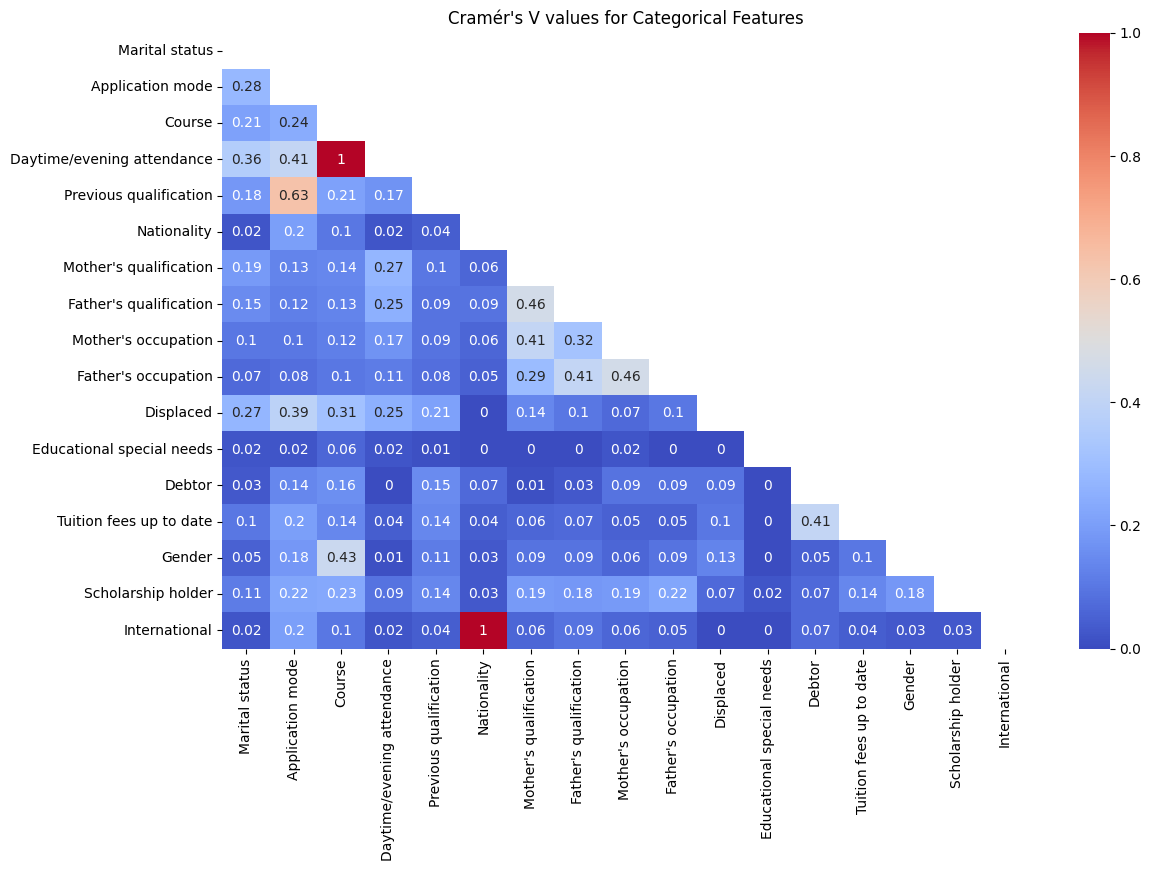

In [21]:
# Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a mask to hide the upper triangle part of symmetrical matrix
mask = np.zeros_like(cramers_results, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Plot heatmap
plt.figure(figsize = (13, 8))
plt.title("Cramér's V values for Categorical Features")
sns.heatmap(cramers_results, mask = mask, annot = True, cmap = "coolwarm")
plt.show()

The following bullets describes the results of this heatmap:
- There were 3 Cramér's V values above 0.5. These V's were between the following feature combinations:
    - Previous Qualification and Application Mode (V = 0.63)
    - Daytime/Evening Attendance and Course (V = 1)
    - Nationality and International (V = 1)
- For the 3 feature combinations above, one of them will be discarded while the other will be used in modeling.

We will discuss what will be done with these categorical features at the end of this section. For now, let's move onto the numerical features.

### Numerical Feature Selection

We will start by creating a correlation matrix showcased as a heatmap using Pearson's Correlation Coefficient ($r$). If the absolute value of any $r$ value is greater than 0.8, that feature pair would be considered very correlated with each other. Let's implement the heat map into our program:

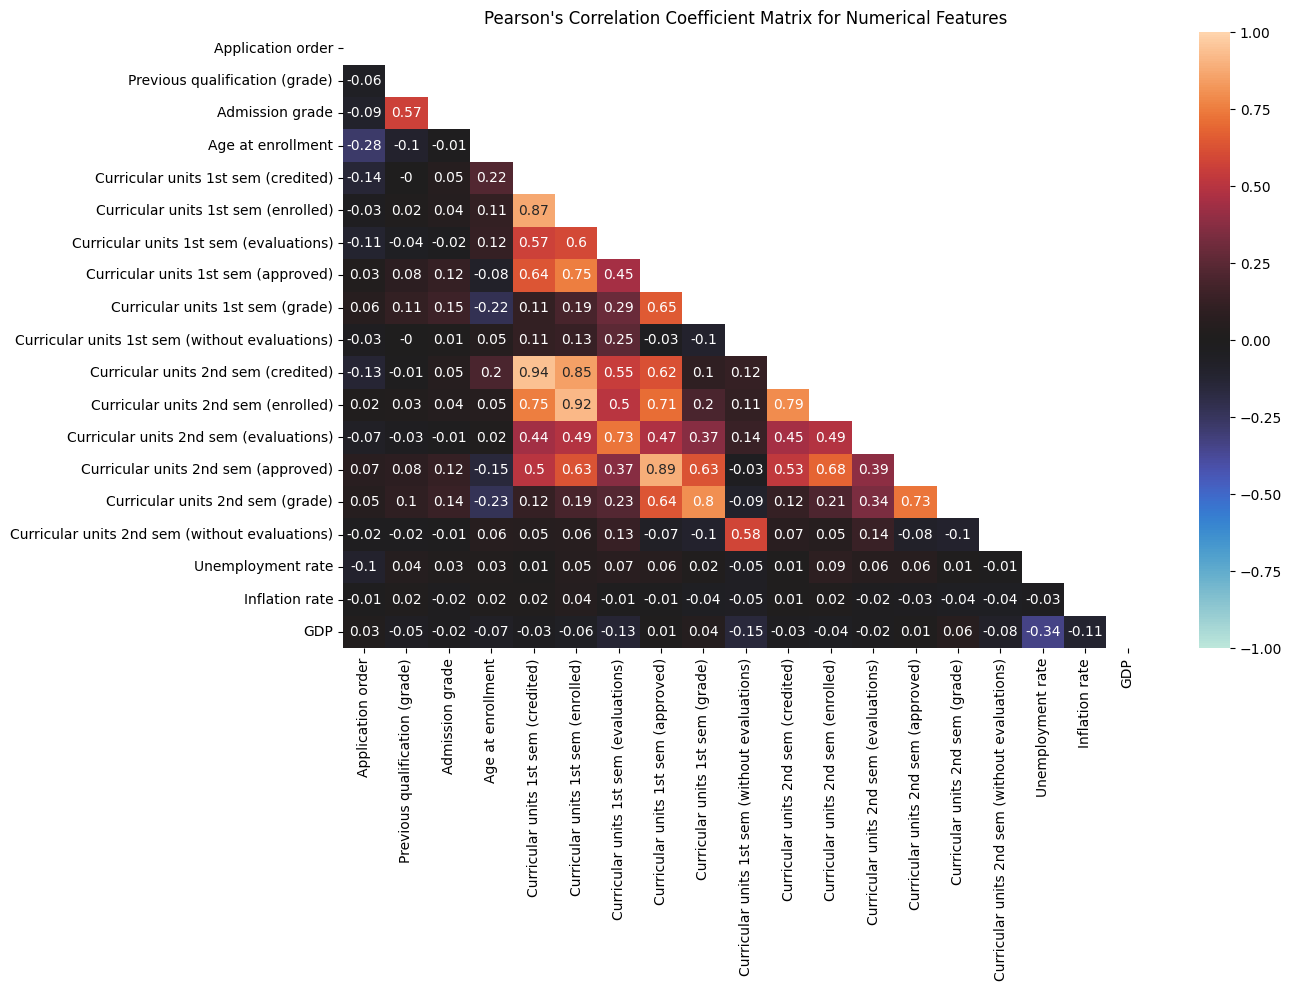

In [22]:
# Calculating the pair-wise pearson correlation coefficient
corr_matrix = num_df.corr()
corr_matrix = corr_matrix.round(2)

# Creating a mask to hide the upper triangle part of symmetrical matrix
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Plot heatmap
plt.figure(figsize = (13, 8))
plt.title("Pearson's Correlation Coefficient Matrix for Numerical Features")
sns.heatmap(corr_matrix, mask = mask, annot = True, vmin=-1, vmax=1, center=0)
plt.show()

The following bullet points describe the results of the heatmap:
- There are four $r$ values above 0.8. These $r$ values were between the following feature combinations:
    - Curricular units 1st sem (enrolled) and its 2nd semester counterpart ($r$ = 0.92)
    - Curricular units 1st sem (credited) and its 2nd semester counterpart ($r$ = 0.94)
    - Curricular units 1st sem (approved) and its 2nd semester counterpart ($r$ = 0.89)
    - Curricular units 1st sem (grade) and its 2nd semester counterpart ($r$ = 0.8)

- While the majority of the features are not very correlated with each other, there were a couple instances of feature combinations getting close to 0.8. But again, these feature combinations were correlated because the values were taken a semester apart.

- Additionally, the 1st and 2nd semester features often correlate highly with each other such as credits, approval, grade, etc. It might be worth looking into getting rid of redundant semester features.

- We will have to make a decision to determine if its best to keep the 1st semester features or the 2nd semester features as they are very correlated with each other. Which semester (1st or 2nd) we pick may not matter as much because the $r$ values are telling us they tell the same story linearly.

However, although correlation between numerical variables is important, we are more interested in the effect they have on the target value. That's where a function from `sklearn` comes in called `SelectKBest()`. It uses a scoring function ($F$ statistic from ANOVA, $\chi^2$, etc) to select features according to the k highest scores. We will use it along with the $r$ values we gathered previously to help us narrow down which numerical features to select.

The scoring function that is ideal in our scenario is the default `f_classif`, which is the $F$ statistic from the ANOVA procedure. ANOVA is useful for comparing numerical features according to some category. Our category in this case is our target variable. Remember we have three possible outcomes for target variable: Graduated (Success), Enrolled (Relative Success), and Dropout (Failure).

A reminder of the F statistic from the ANOVA table:

$F = \frac{MST}{MSE}$ where $MST$ is Mean Square for Treatment and $MSE$ is Mean Square for Error.

Intuitively the $F$-statistic can be thought of as $F = \frac{\text{variation between sample means}}{\text{variation within the samples}}$. It is used frequently in the ANOVA F-Test where your goal is to compare $k$ number of treatment means. The null hypothesis of that test is that the $k$ treatment means are the same and if we reject said test we have evidence to say that they aren't. The higher the $F$, the more likely it is that we reject and the more variation there is between sample means. We want lots of variation between sample means as this is what we want out of a predictive feature.

To use `SelectKBest()` we need to use a $Y$ response (target) vector:

In [23]:
Y = label.fit_transform(df_renamed["Target"].values) # Making sure the target is encoded
Y

array([2, 0, 2, ..., 0, 2, 2], shape=(4244,))

Now, we can implement `SelectKBest()`:

In [24]:
from sklearn.feature_selection import SelectKBest

# Fit SelectKBest
# Use k = "all" will result in keeping all features 
# to examine all of the scores (F-stats) and p-values
result = SelectKBest(k="all").fit(num_df, Y)

# Extract scores and p-values
scores = result.scores_
p_values = result.pvalues_

# Get feature names
feature_names = num_df.columns

# Sort by F-stat scores (descending)
sorted_indices = np.argsort(scores)[::-1]
sorted_features = feature_names[sorted_indices]
sorted_scores = scores[sorted_indices]
sorted_pvals = p_values[sorted_indices]

# Print results
for feature, score, p_val in zip(sorted_features, sorted_scores, sorted_pvals):
    print(f"Feature: {feature}, F-stat: {score:.4f}, p-value: {p_val:.4f}")

Feature: Curricular units 2nd sem (approved), F-stat: 1602.7202, p-value: 0.0000
Feature: Curricular units 2nd sem (grade), F-stat: 1404.2584, p-value: 0.0000
Feature: Curricular units 1st sem (approved), F-stat: 946.9501, p-value: 0.0000
Feature: Curricular units 1st sem (grade), F-stat: 888.4533, p-value: 0.0000
Feature: Age at enrollment, F-stat: 157.9996, p-value: 0.0000
Feature: Curricular units 2nd sem (evaluations), F-stat: 91.8207, p-value: 0.0000
Feature: Curricular units 2nd sem (enrolled), F-stat: 90.0916, p-value: 0.0000
Feature: Curricular units 1st sem (enrolled), F-stat: 63.8710, p-value: 0.0000
Feature: Curricular units 1st sem (evaluations), F-stat: 37.1989, p-value: 0.0000
Feature: Admission grade, F-stat: 33.7891, p-value: 0.0000
Feature: Previous qualification (grade), F-stat: 26.5179, p-value: 0.0000
Feature: Curricular units 2nd sem (without evaluations), F-stat: 21.0270, p-value: 0.0000
Feature: Application order, F-stat: 19.1597, p-value: 0.0000
Feature: Curricu

As we can see, there is a lot to comb over but here is the summary:
- Inflation rate is the only feature with a high p-value and will most likely end up getting cut.

- Again, the 1st and 2nd semester features share a lot of similarities as far as where they place on this list above. This further supports the point to keep only one semester worth of features as they paint the same picture.

- Age at enrollment places quite high on this list which may make it a formidable feature.

- GDP and Unemployment Rate are significant but place quite low on this list. In addition to correlation they have with each other it might be worth to keep one or cut both of the features.

### Feature selection decisions
Making these decision of which variables to keep isn't easy, especially since the documentation for this data set is not very good. We hope that through these tests and our reasoning we convey a justifiable reason to cut the variable we discarded. This process can be highly subjective at times. We are a perfect example of this as the paper connected to this dataset ended their modeling process with 25 independent variables, we ended up with fewer. Lack of information and experience may be to blame but we feel as if this the most concrete feature list we have. Without further ado, here are the features we cut and the reasons we did so:

##### Numerical Features discarded:
- Any Curricular Units 2nd semester features (6): In this case, we sided to keep the 1st semester features as opposed to the 2nd semester features. It makes more sense intuitively to us as perhaps some people may dropout is due to their first semester failures. There is probably a negligible difference if you use the 2nd semester features as opposed to the 1st semester, that is to say there is no right answer.

- Curricular Units 1st semester (evaluations) and (without evaluations) (2): Here, although these variables seem to have high predictive power we just don't have any information as to what they mean. We don't want to input a feature that we will have a hard time interpreting even though it may be key to higher accuracy. We will not sacrifice interpretability for prediction power.

- Application order (1): Similar story to the previous features. Not a lot is known as to what this variable means, it may be super useful but we wouldn't know how to interpret it.

- Unemployment rate, GDP, and Inflation rate (3): This was a tough one but we feel like intuitively that these economic factors of Portugal will have minimal impact on the success of a student.

##### Categorical Features discarded:
- Previous Qualification (1): Had quite a high $V$ score with Application mode but not to worry, there is a numerical feature that keeps track of the grade of this previous qualification. 

- Daytime/Evening attendance (1): This was quite simple to figure out why it was perfectly correlated with the Course feature. The names of the Courses indicate whether or not a course is evening attendance or not (for ex: Social Service (evening attendance)). Therefore, every time evening attendance appeared in the name of the Course, the evening attendance variable checked off. So for simplicity, we kept the Courses feature as it already had Daytime/Evening attendance built in.

- Nationality (1): Very similar situation happened with this feature and International student. Every time a student wasn't from Portugal, the International variable would say Yes and No otherwise. We opted to keep the feature International due to its simplicity.

In total we cut **15** variables. Again, this is based on the tests and intuition we had. Someone with access to more data and knowledge of academia may come to different conclusions.

### Final Features

Since we cut 15 features, that means we are left with **21** features. Here is a list of all 21 features kept and the new data frame created:

In [25]:
# List with index of features we cut:
cut_features = [2, 4, 5, 7, 23, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]

# Verifying we have the correct list of features to cut
# df_renamed.columns[cut_features]

# Dropping the features we cut
df_reduced = df_renamed.drop(columns=df_renamed.columns[cut_features])

# Verifying the shape of the new dataframe
print(df_reduced.shape)
df_reduced.head()

(4244, 22)


Marital status                Application mode  \
1         single                           Other   
2         single  1st phase - general contingent   
3         single  2nd phase - general contingent   
4        married               Over 23 years old   
5        married               Over 23 years old   

                                Course  Previous qualification (grade)  \
1                              Tourism                           160.0   
2                 Communication Design                           122.0   
3         Journalism and Communication                           122.0   
4  Social Service (evening attendance)                           100.0   
5      Management (evening attendance)                           133.1   

                              Mother's qualification  \
1  Secondary Education - 12th Year of Schooling o...   
2  Basic education 1st cycle (4th/5th year) or eq...   
3  Basic Education 2nd Cycle (6th/7th/8th Year) o...   
4  Basic education 1st cycle (4th/5th year) or eq...   
5  Basic education 1st cycle (4th/5th year) or eq...   

                              Father's qualification  \
1                          Higher Education - Degree   
2  Basic education 1st cycle (4th/5th year) or eq...   
3  Basic education 1st cycle (4th/5th year) or eq...   
4  Basic Education 2nd Cycle (6th/7th/8th Year) o...   
5  Basic education 1st cycle (4th/5th year) or eq...   

                                 Mother's occupation  \
1     Intermediate Level Technicians and Professions   
2                                  Unskilled Workers   
3  Personal Services, Security and Safety Workers...   
4                                  Unskilled Workers   
5                                  Unskilled Workers   

                                 Father's occupation  Admission grade  \
1     Intermediate Level Technicians and Professions            142.5   
2                                  Unskilled Workers            124.8   
3     Intermediate Level Technicians and Professions            119.6   
4                                  Unskilled Workers            141.5   
5  Skilled Workers in Industry, Construction and ...            114.8   

  Displaced Educational special needs Debtor Tuition fees up to date  Gender  \
1       yes                        no     no                      no    male   
2       yes                        no     no                      no    male   
3       yes                        no     no                     yes  female   
4        no                        no     no                     yes  female   
5        no                        no    yes                     yes    male   

  Scholarship holder  Age at enrollment International  \
1                 no                 19            no   
2                 no                 19            no   
3                 no                 20            no   
4                 no                 45            no   
5                 no                 50            no   

   Curricular units 1st sem (credited)  Curricular units 1st sem (enrolled)  \
1                                    0                                    6   
2                                    0                                    6   
3                                    0                                    6   
4                                    0                                    6   
5                                    0                                    5   

   Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  \
1                                    6                         14.000000   
2                                    0                          0.000000   
3                                    6                         13.428571   
4                                    5                         12.333333   
5                                    5                         11.857143   

     Target  
1  Graduate  
2   Dropou

---

## Data Visualization

### Target Analysis - Count Plot & Pie Chart

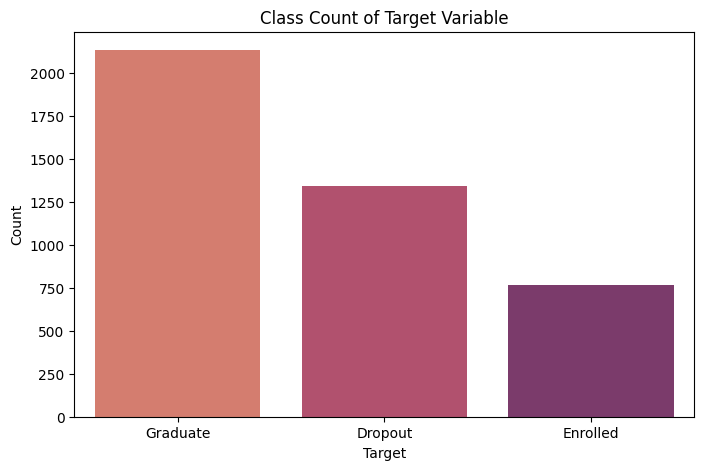

In [26]:
# Target Variable Distribution
plt.figure(figsize=(8,5))
sns.countplot(x=df_reduced["Target"], hue=df_reduced["Target"], palette="flare")
plt.title("Class Count of Target Variable")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()


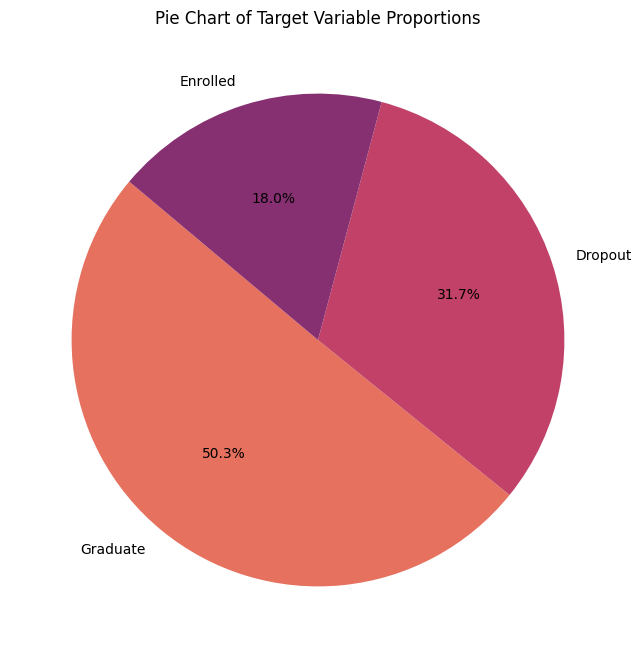

In [27]:
plt.figure(figsize=(15,8))
counts = df_renamed["Target"].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("flare", len(counts)))
plt.title("Pie Chart of Target Variable Proportions")
plt.show()

Both the bar chart and the pie chart show a clear class imbalance which was anticipated with this dataset.

### Violin Plots for each Numerical Feature against Target

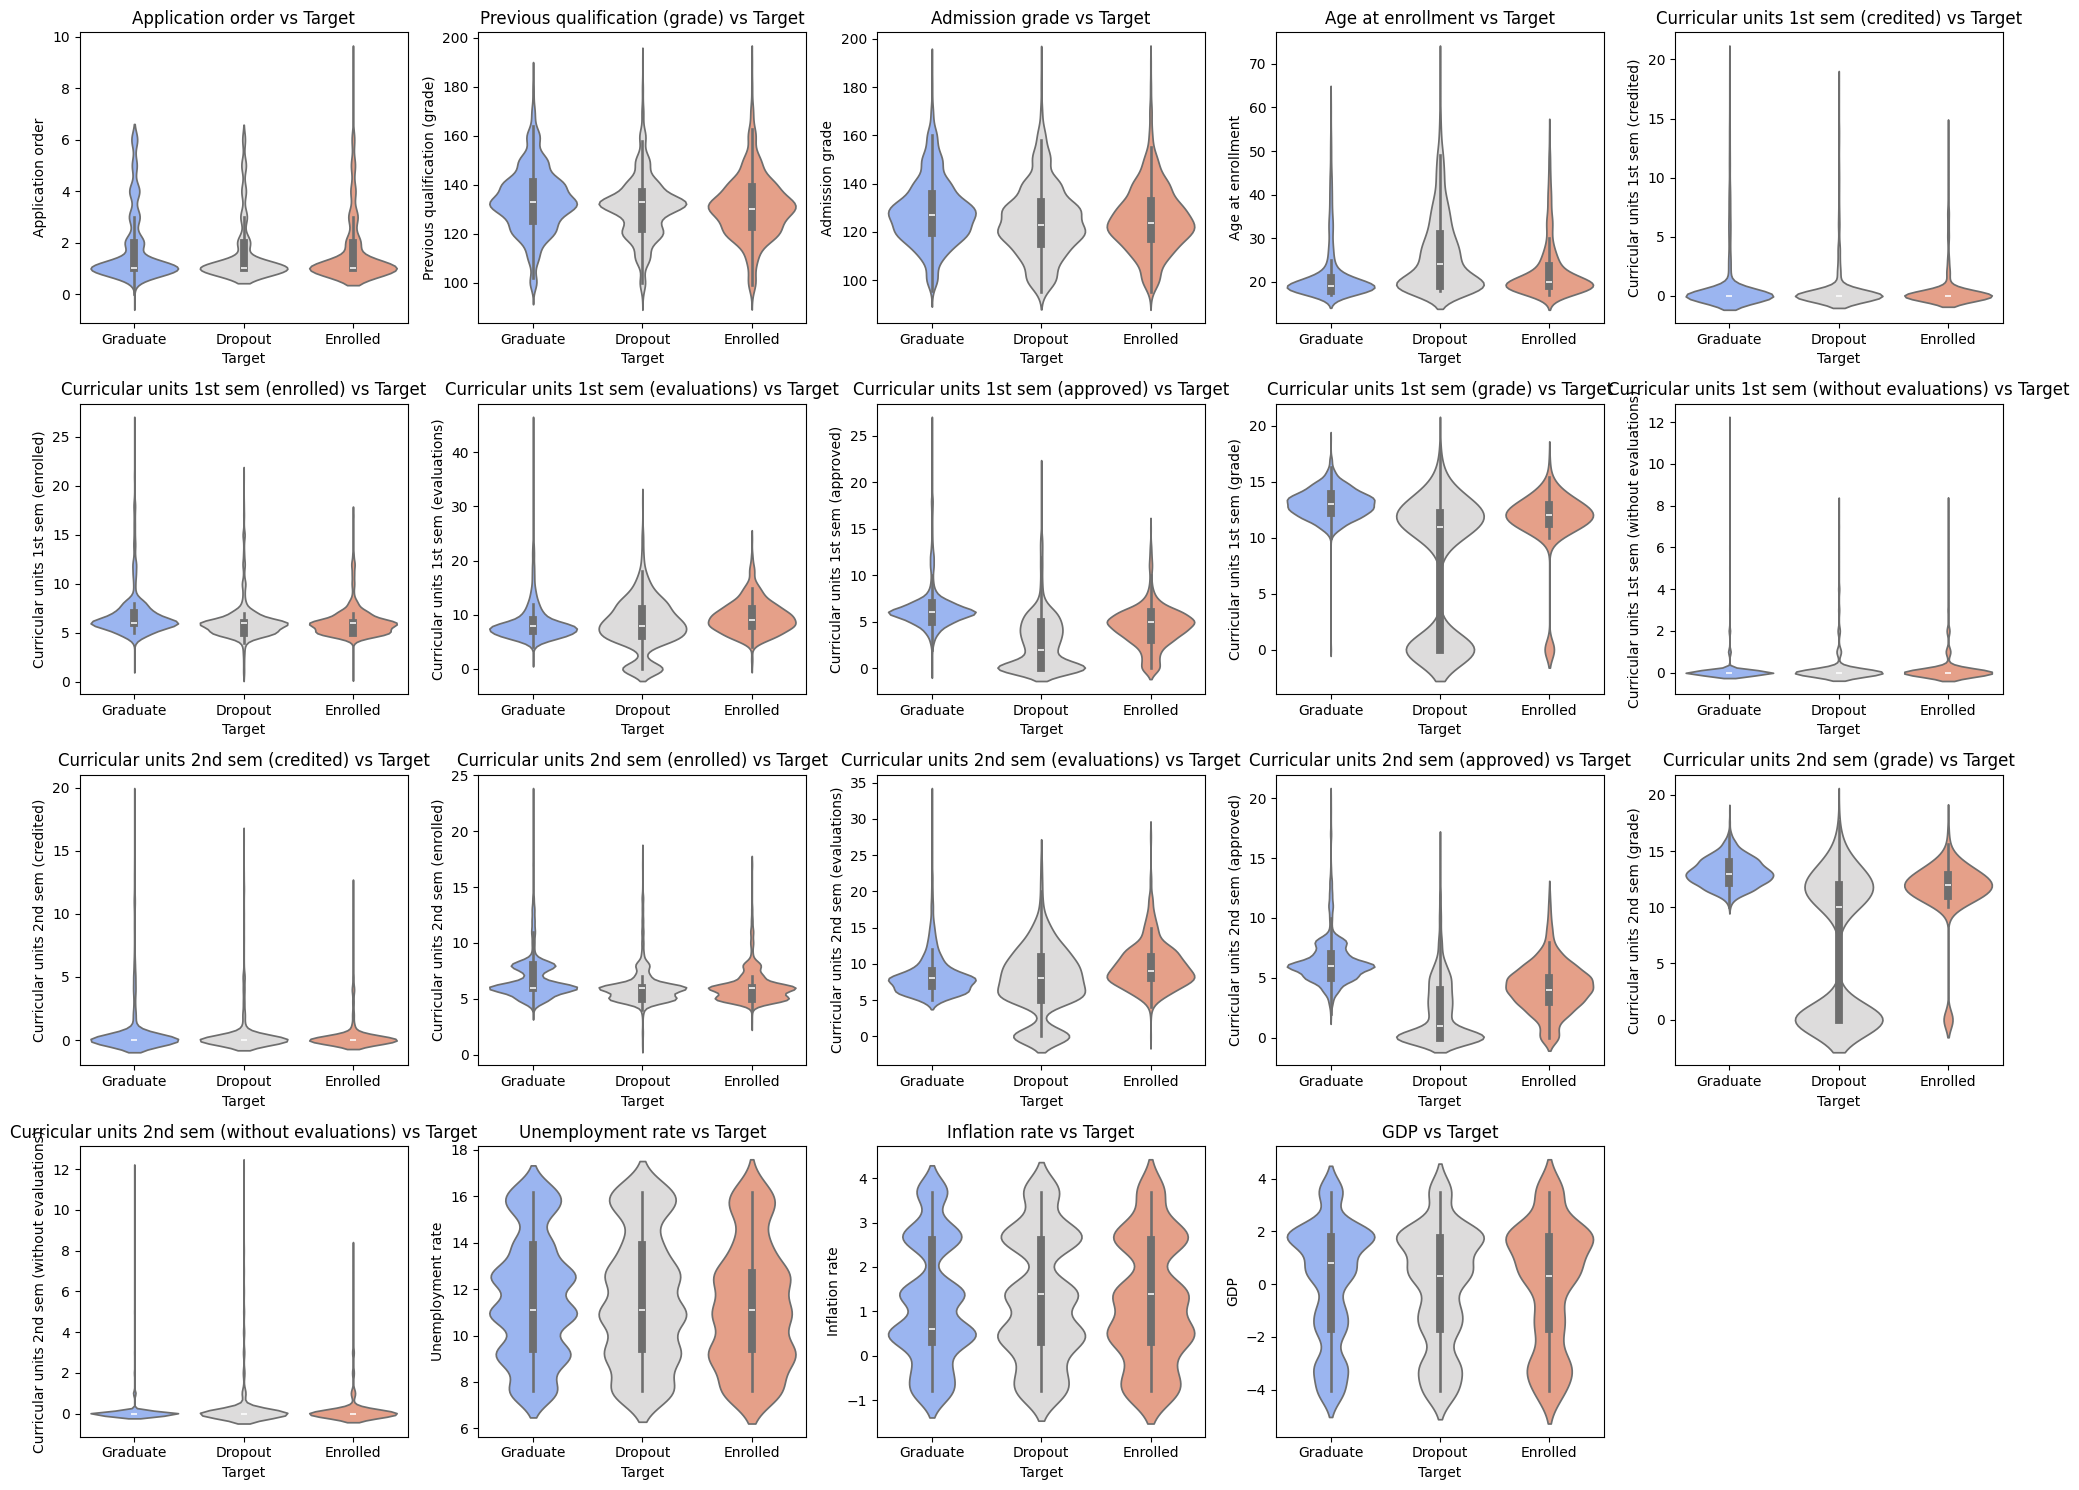

In [28]:
plt.figure(figsize=(20,15))
for i, col in enumerate(num_df.columns, 1):
    plt.subplot(4, 5, i)
    sns.violinplot(x=df_reduced["Target"], y=num_df[col], hue=df_reduced["Target"],palette="coolwarm")
    plt.title(f"{col} vs Target")
plt.tight_layout()
plt.show()


### Box-plots for each Numerical Feature 

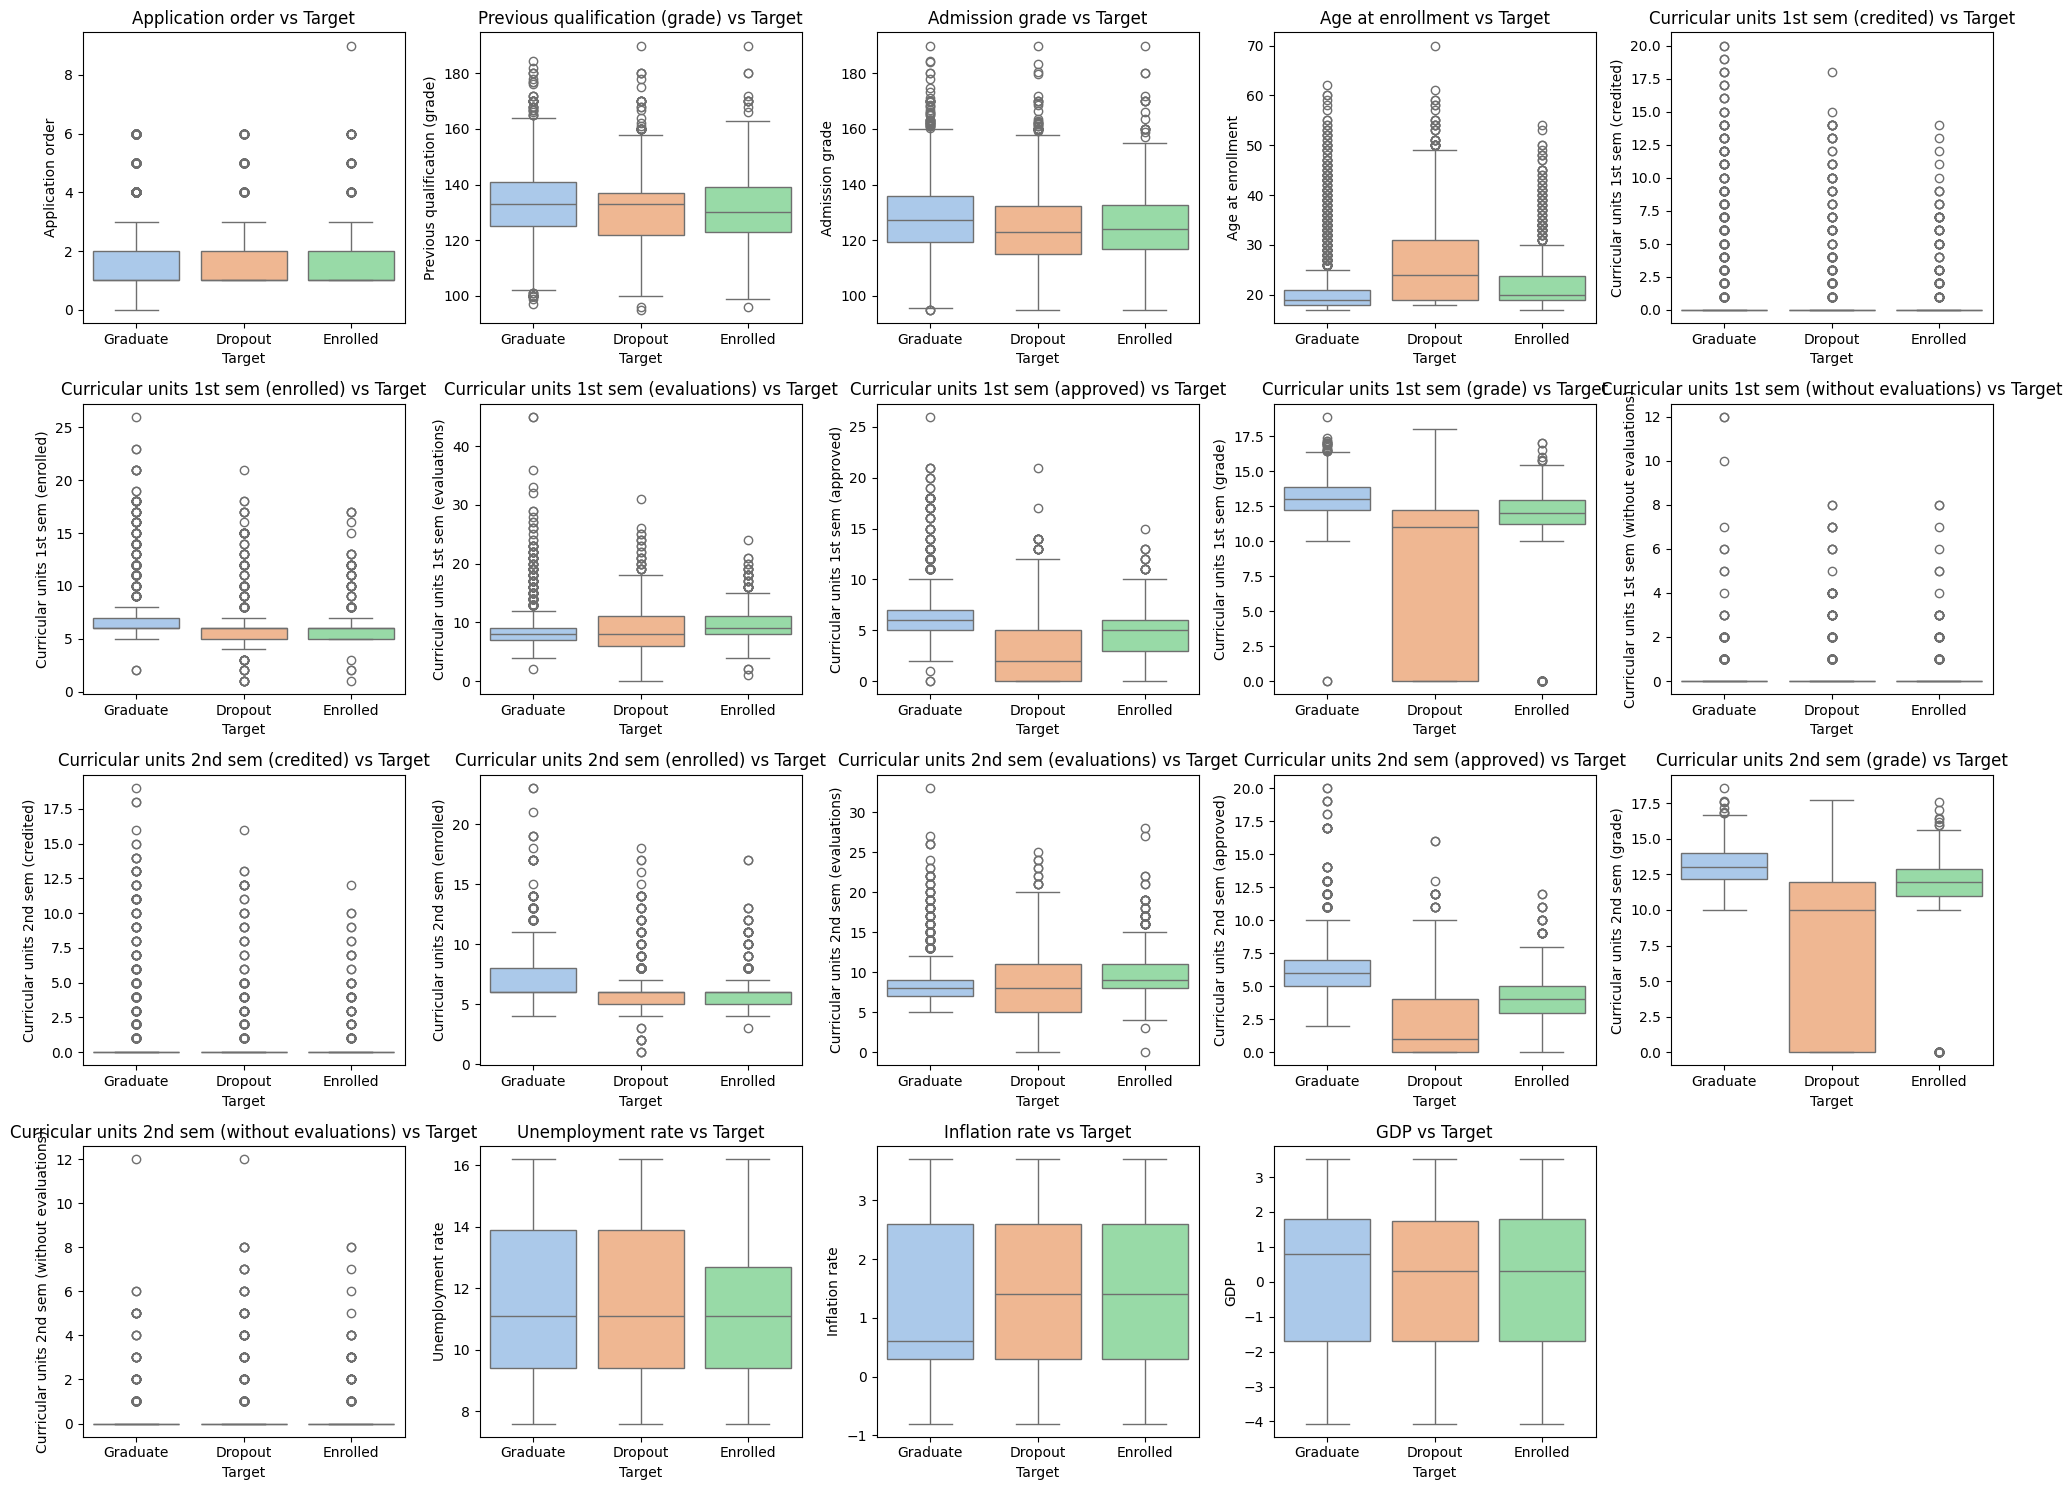

In [29]:
plt.figure(figsize=(20,15))
for i, col in enumerate(num_df.columns, 1):
    plt.subplot(4, 5, i)  # Adjust grid size based on the number of features
    sns.boxplot(x=df_reduced["Target"], y=num_df[col], hue=df_reduced["Target"], palette="pastel")
    plt.title(f"{col} vs Target")
    plt.xlabel("Target")
    plt.ylabel(col)

plt.tight_layout()
plt.show()

### Numerical Feature Visualizations

#### Histograms for each Numerical Feature

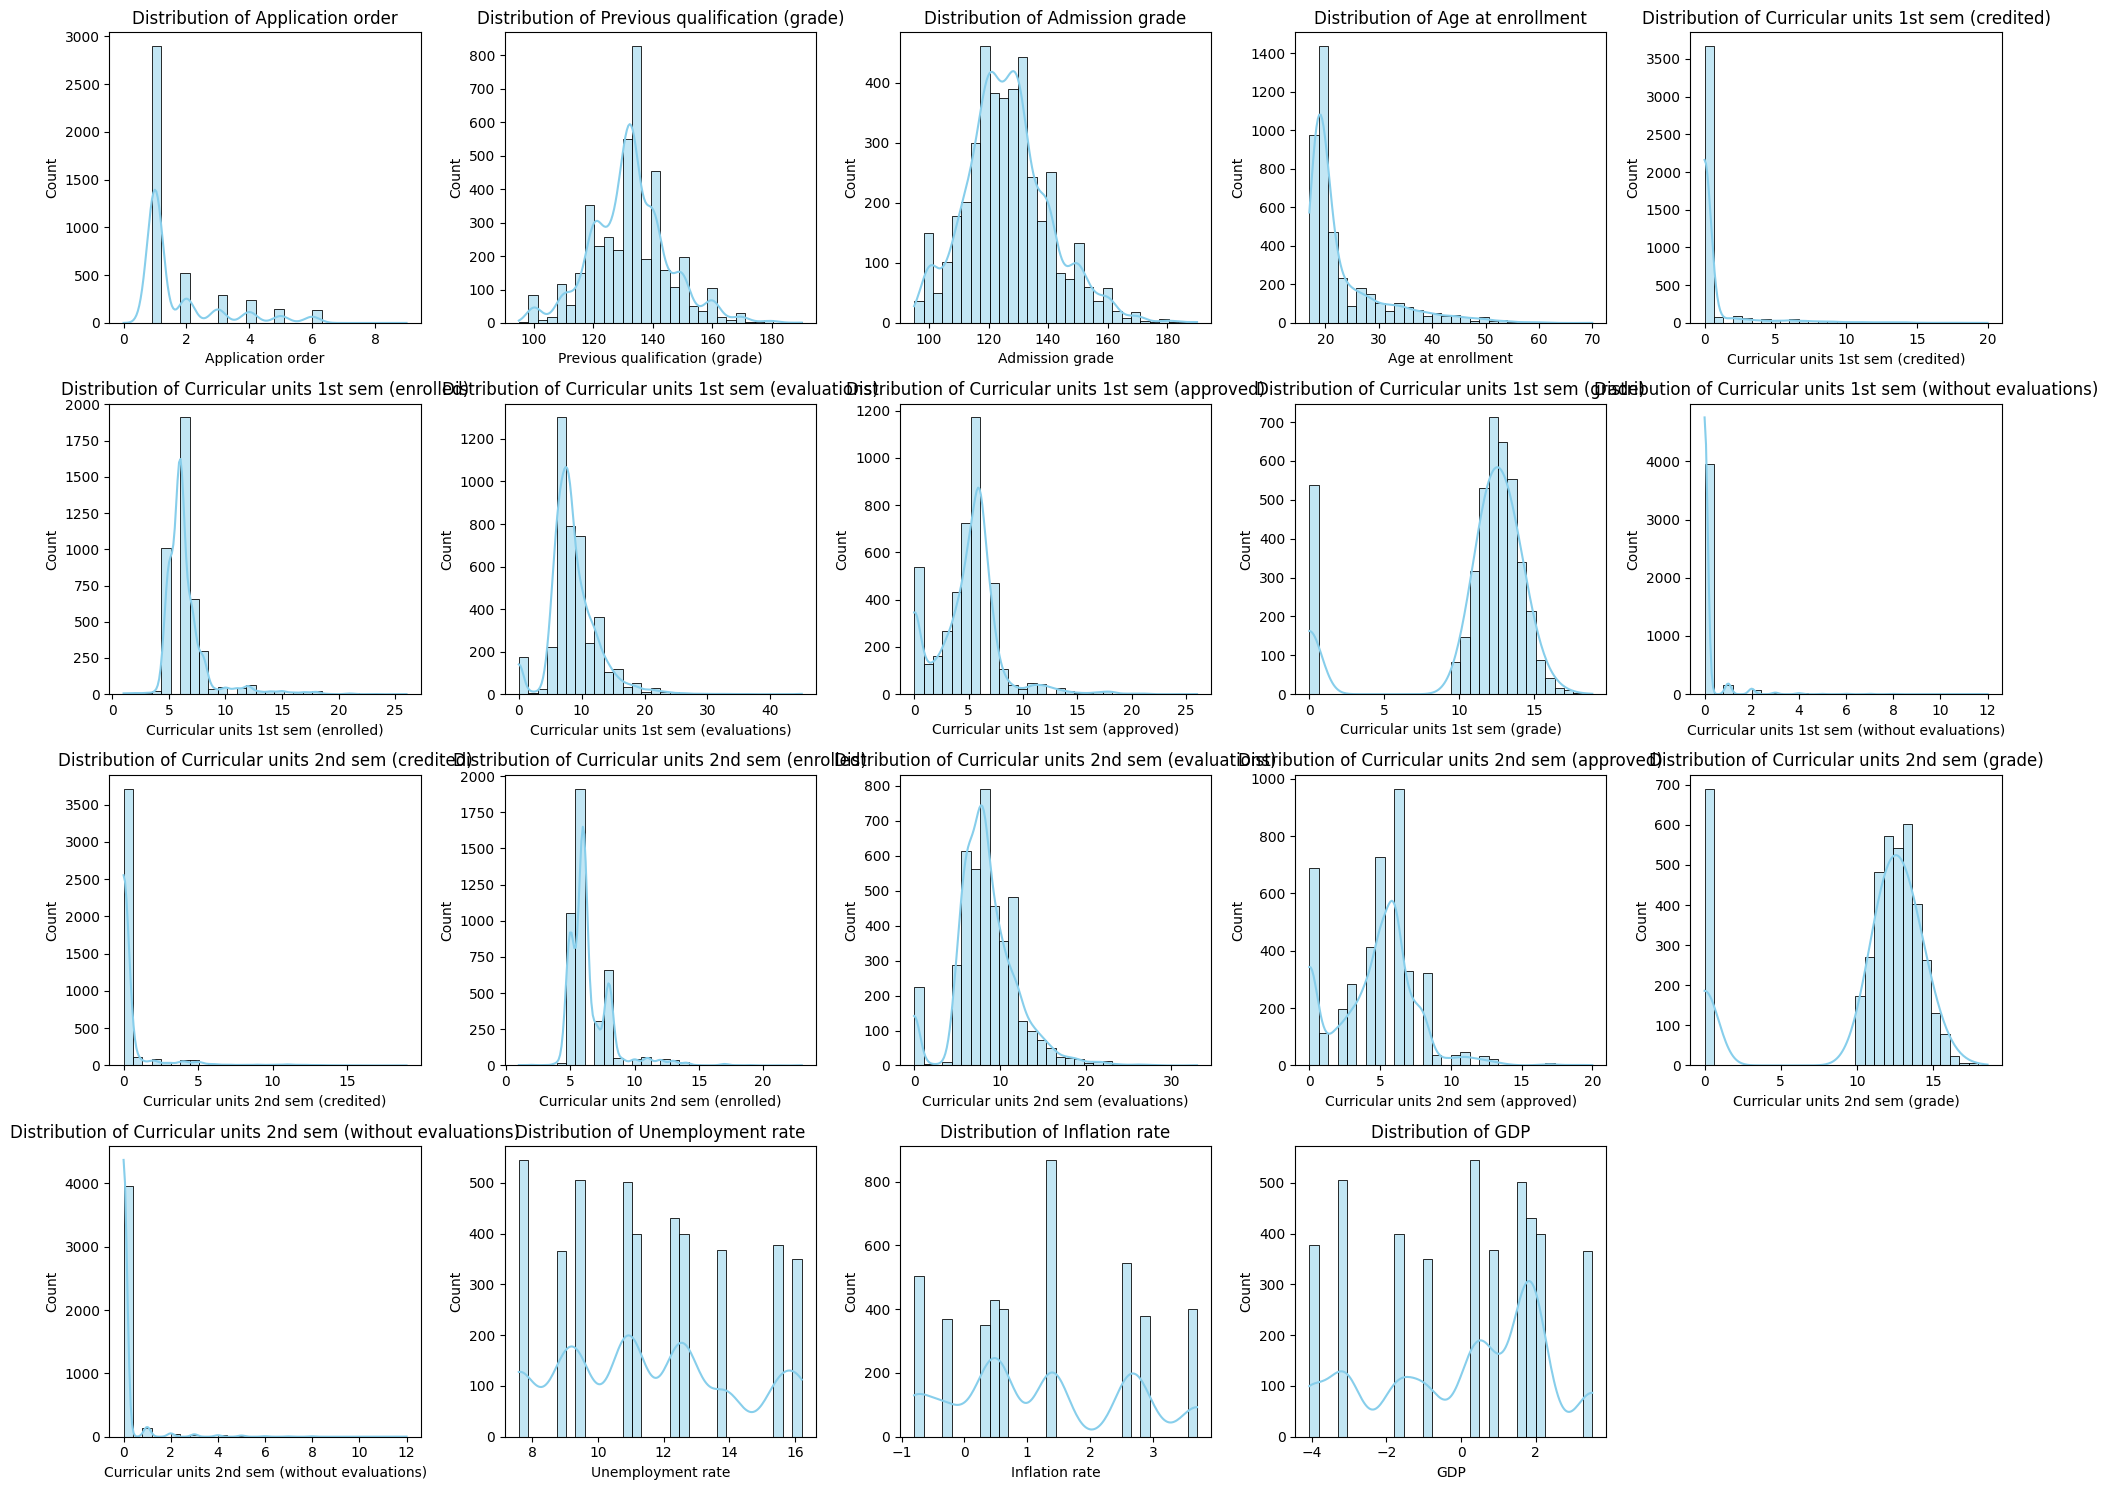

In [30]:
plt.figure(figsize=(20,15))
for i, col in enumerate(num_df.columns, 1):
    plt.subplot(4,5,i)
    sns.histplot(num_df[col], kde=True, bins=30, color="skyblue")
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


## Boxplots for each Numerical Feature


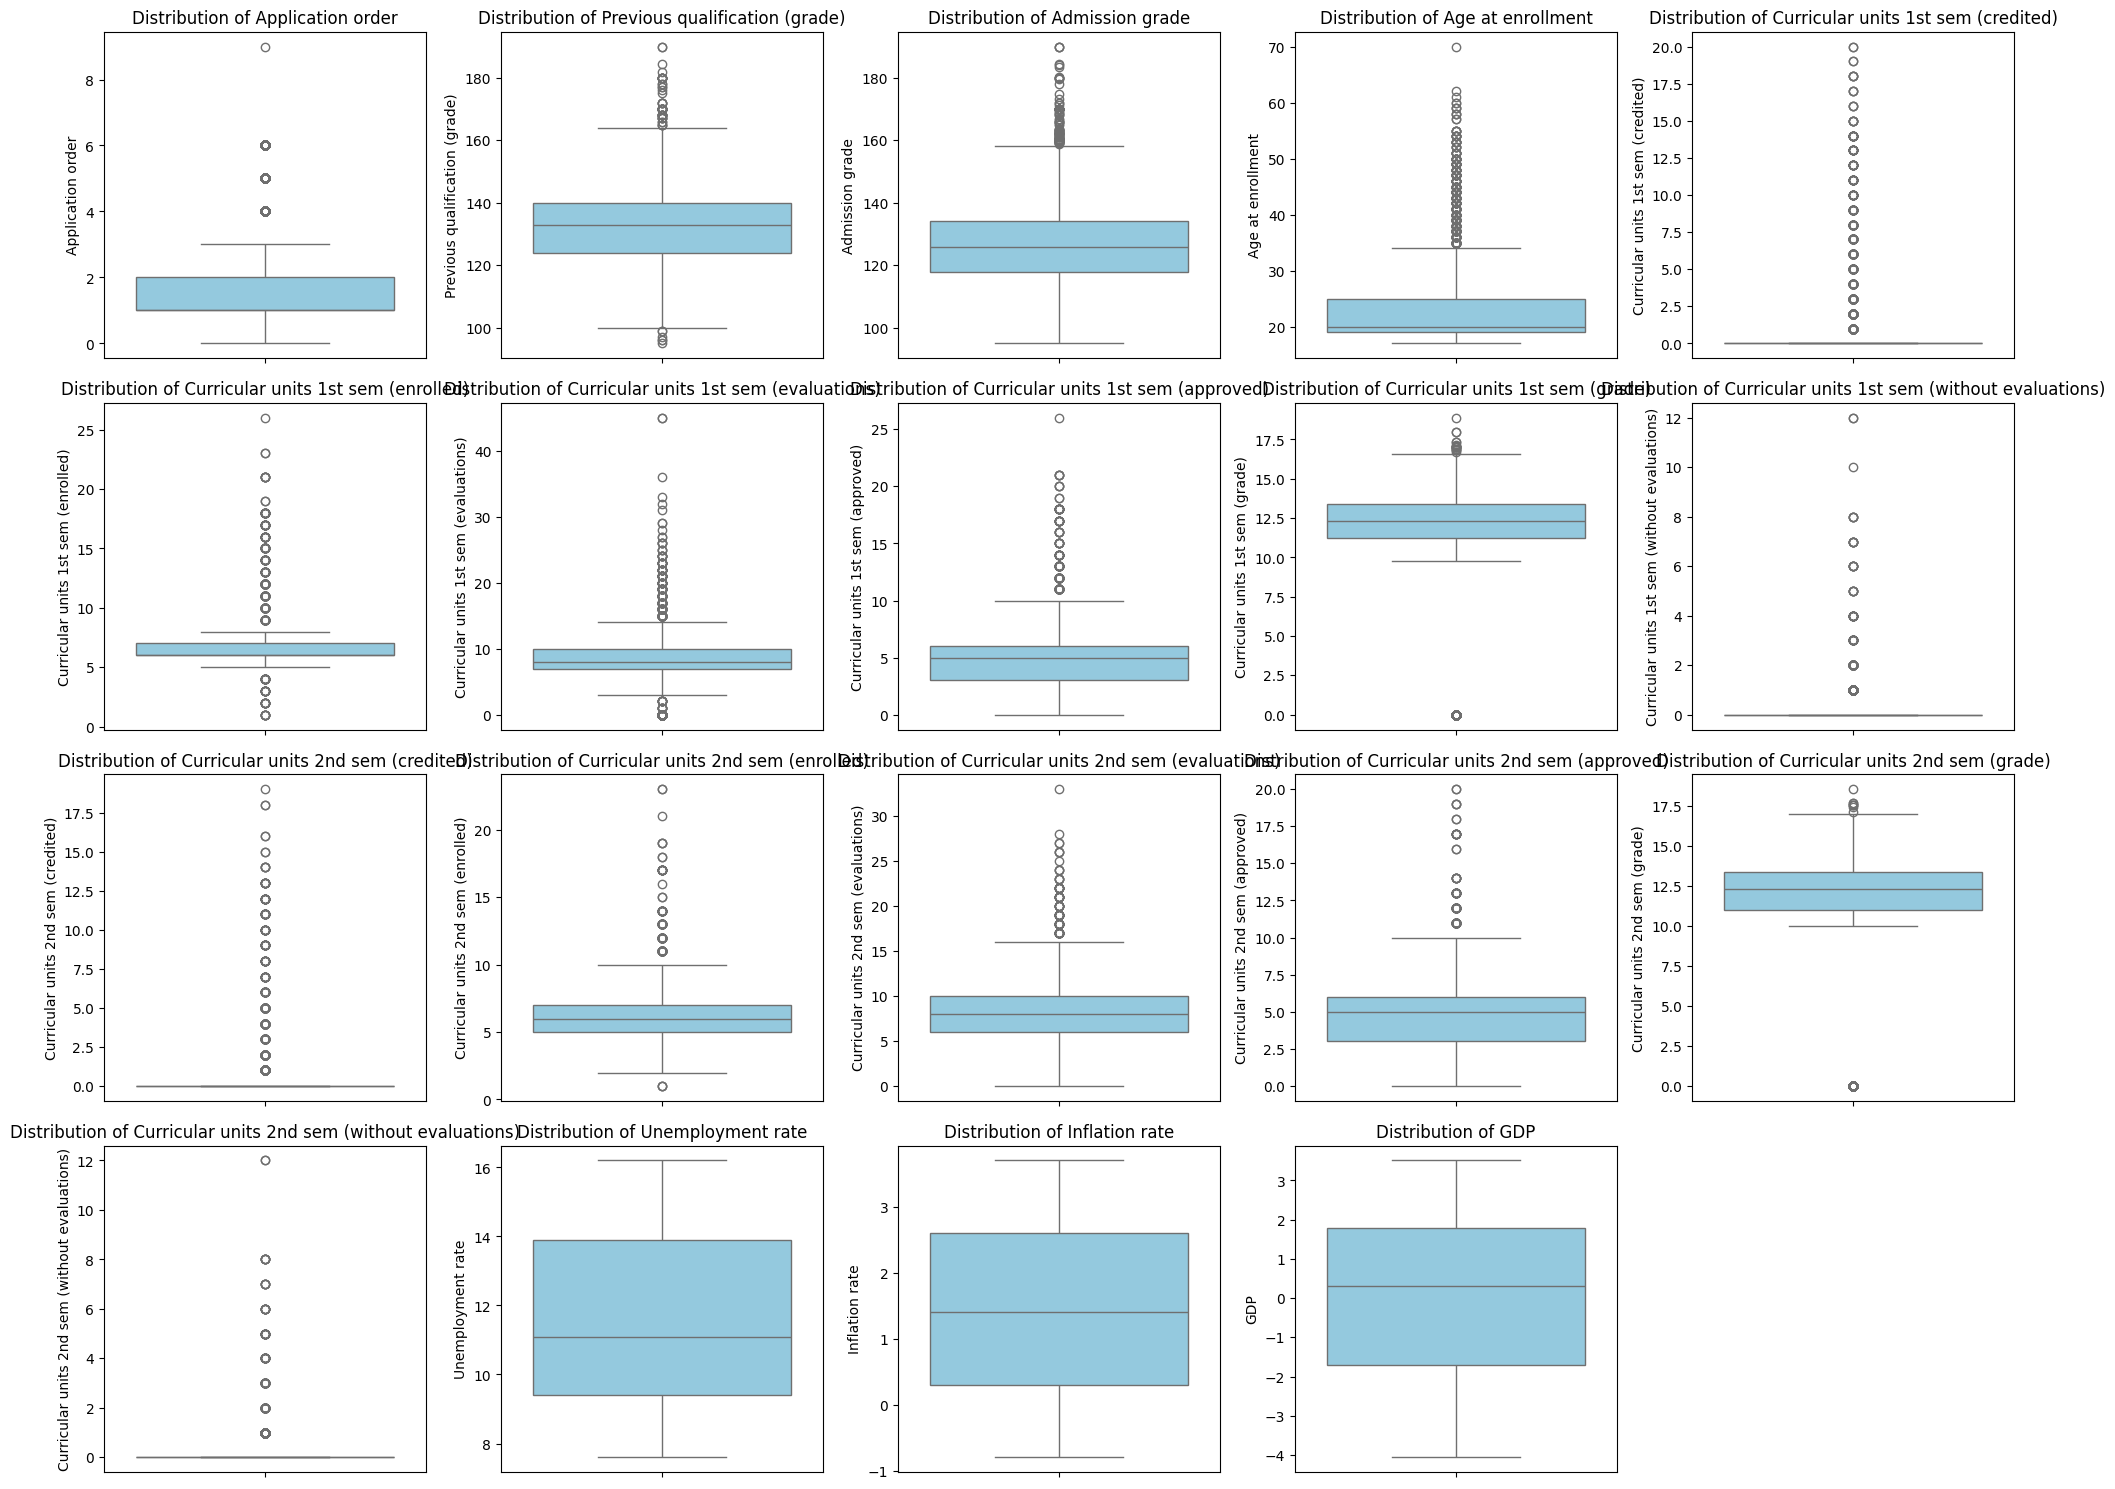

In [31]:
plt.figure(figsize=(20,15))
for i, col in enumerate(num_df.columns, 1):
    plt.subplot(4,5,i)
    sns.boxplot(y=num_df[col], color="skyblue")
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

#### Scatterplots with Hues as Target 

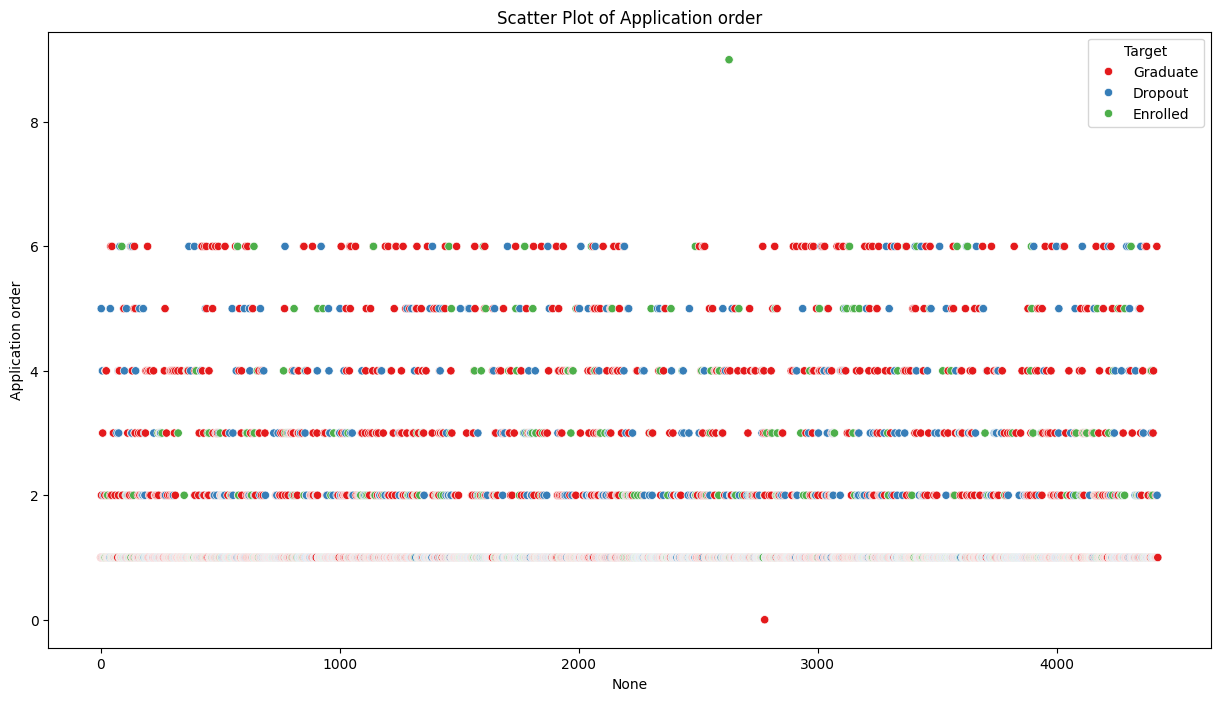

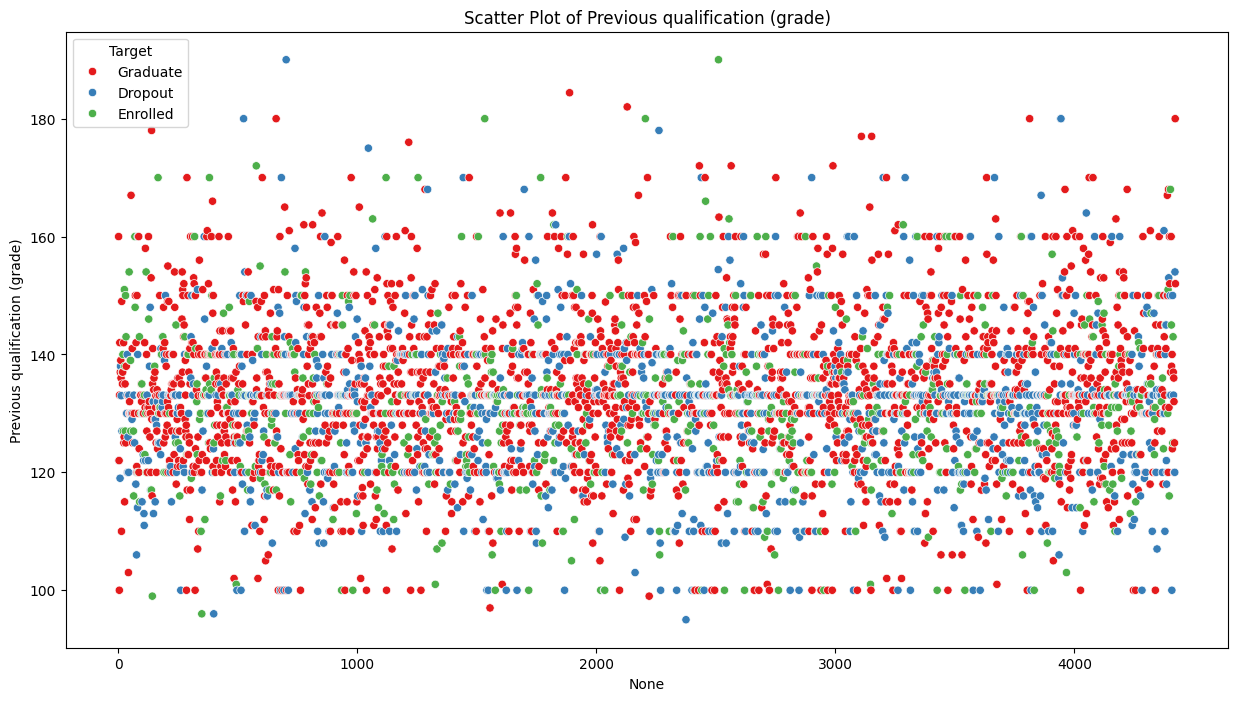

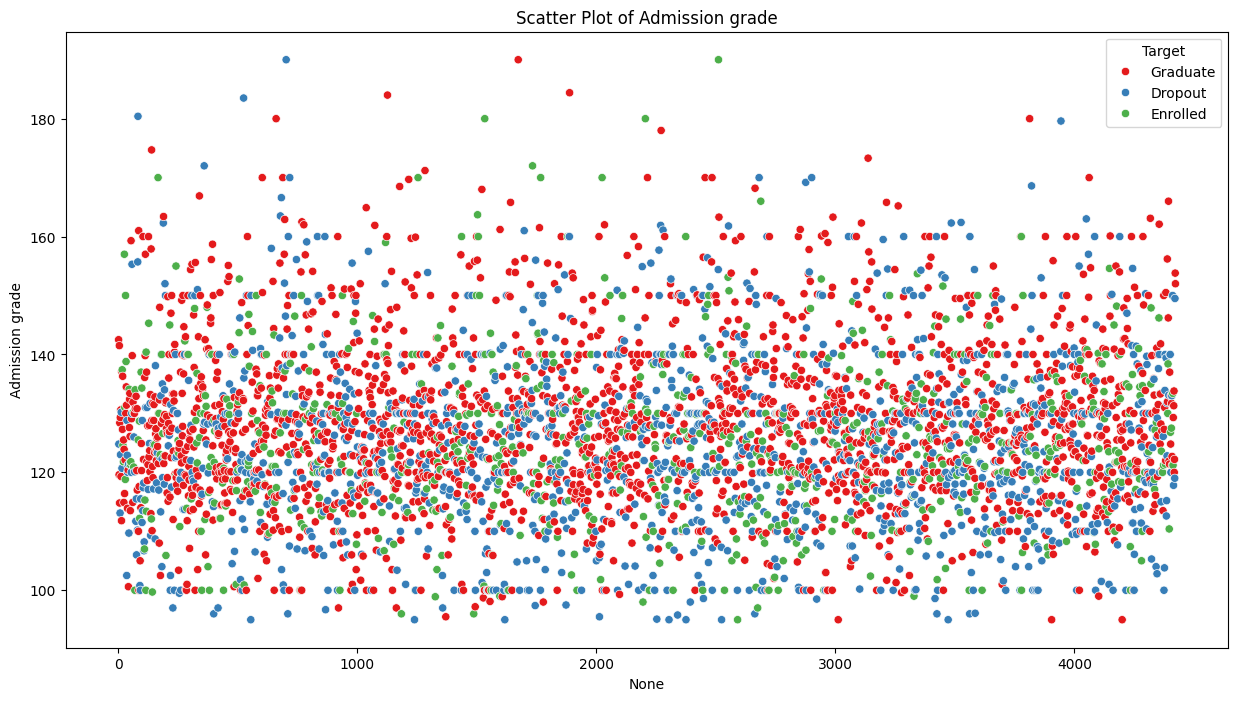

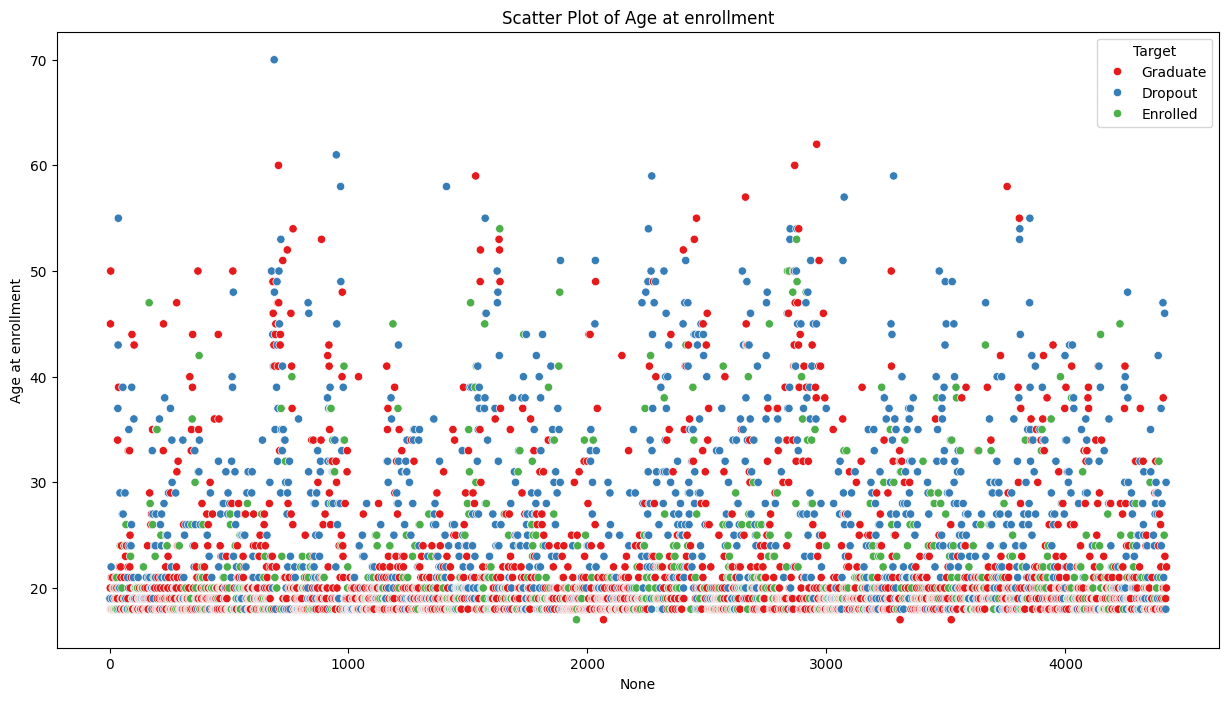

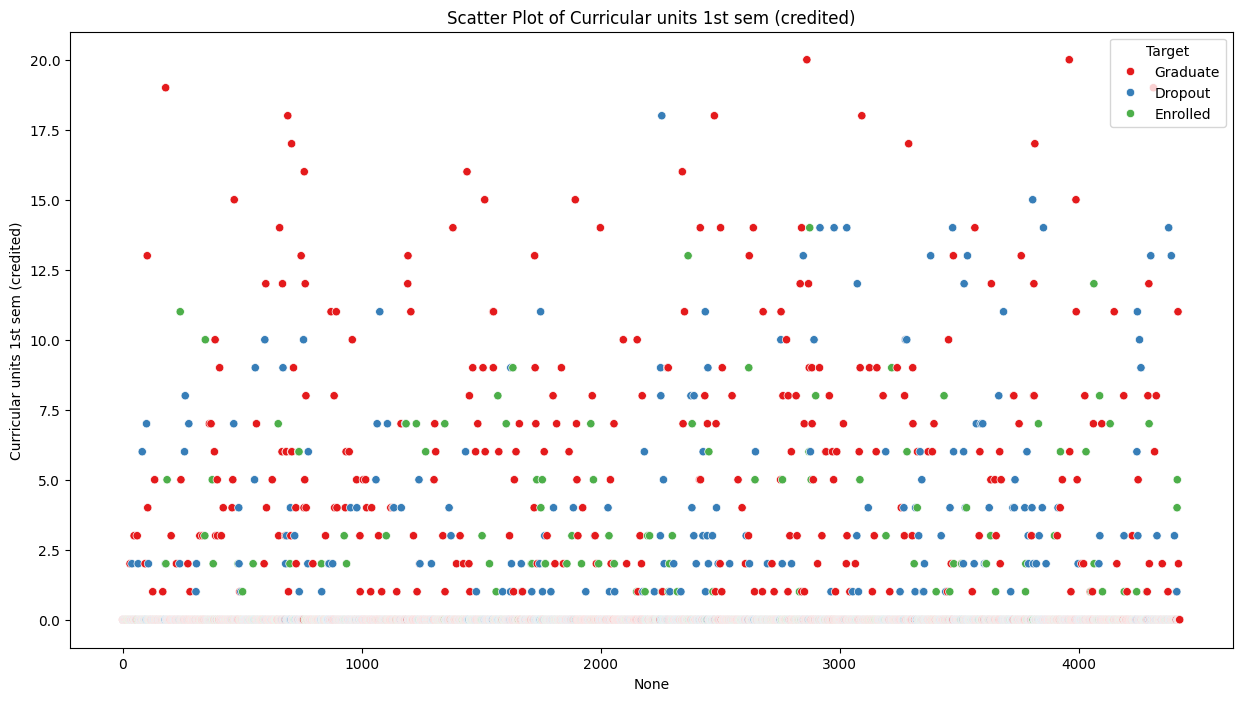

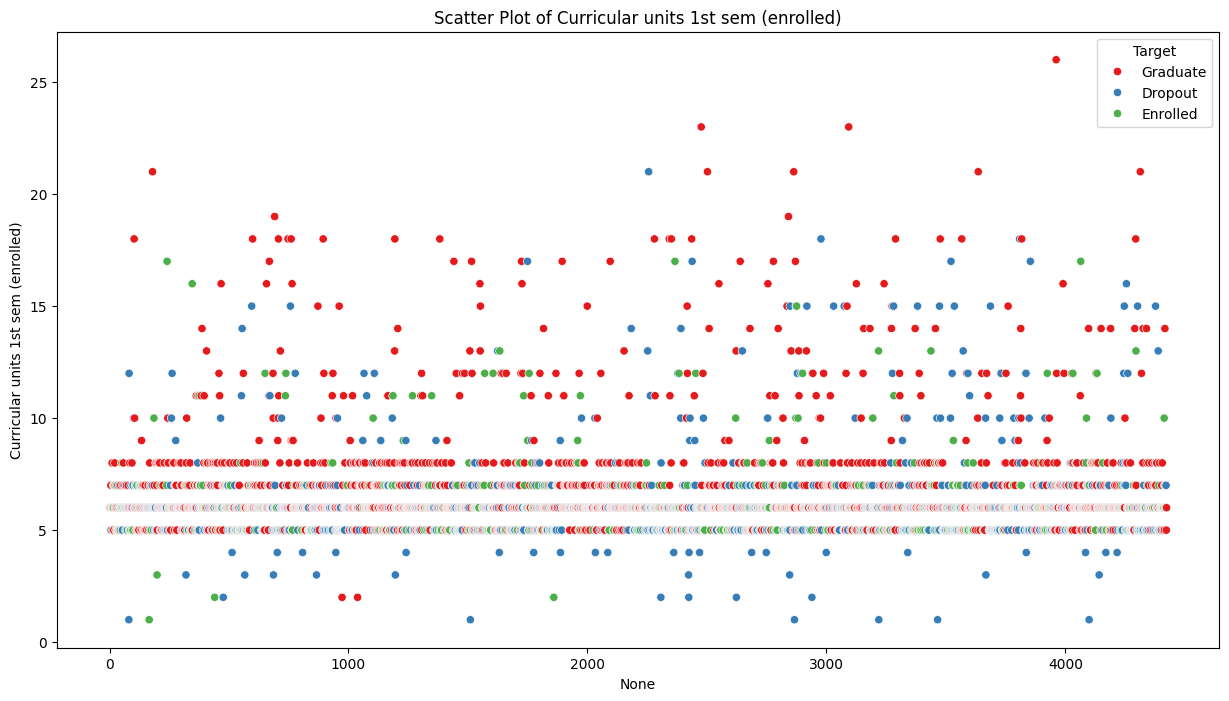

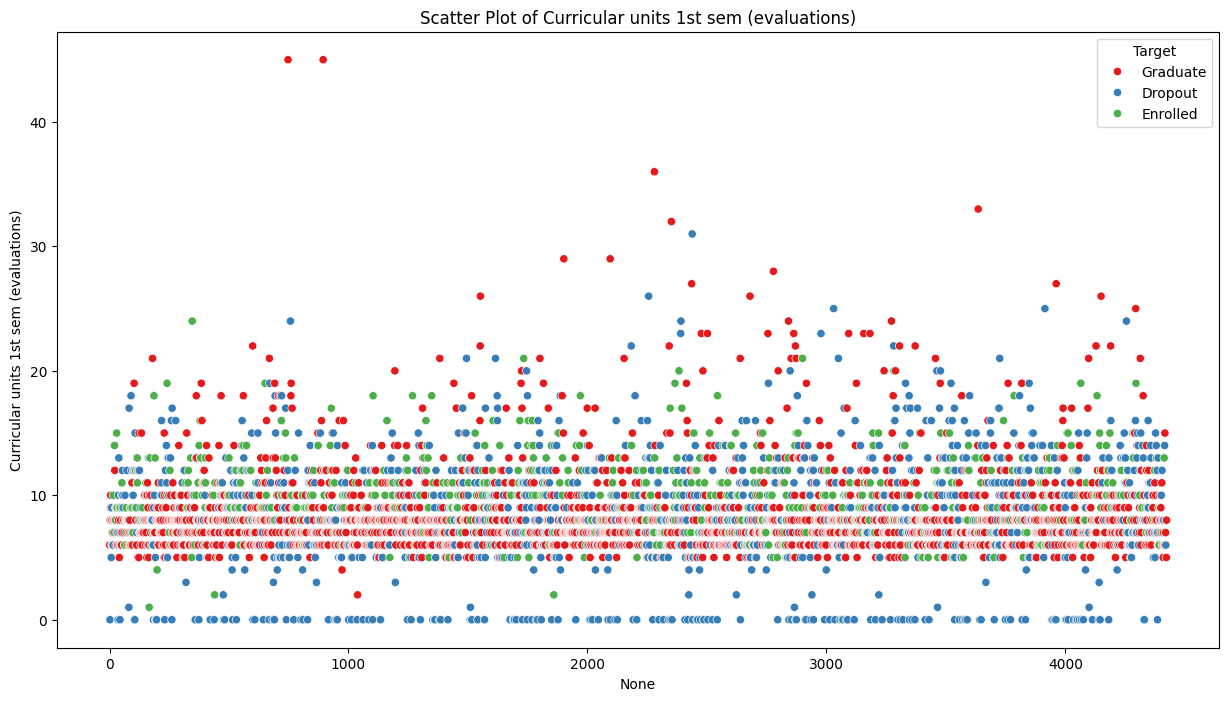

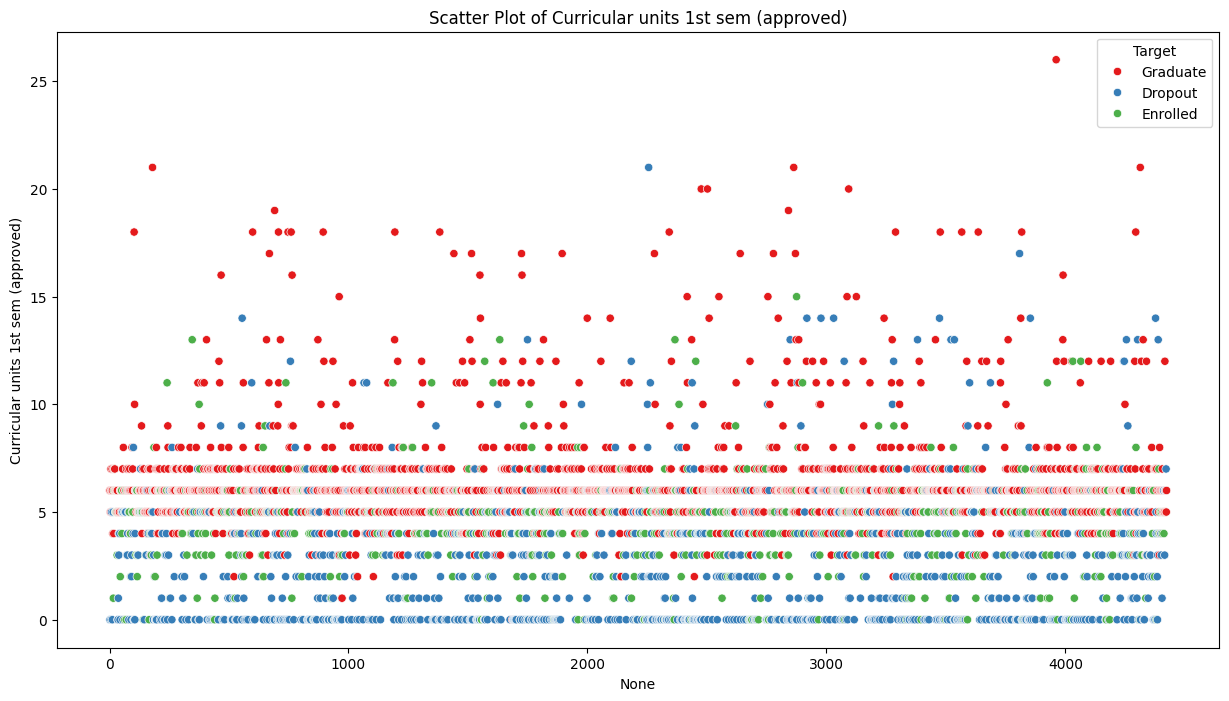

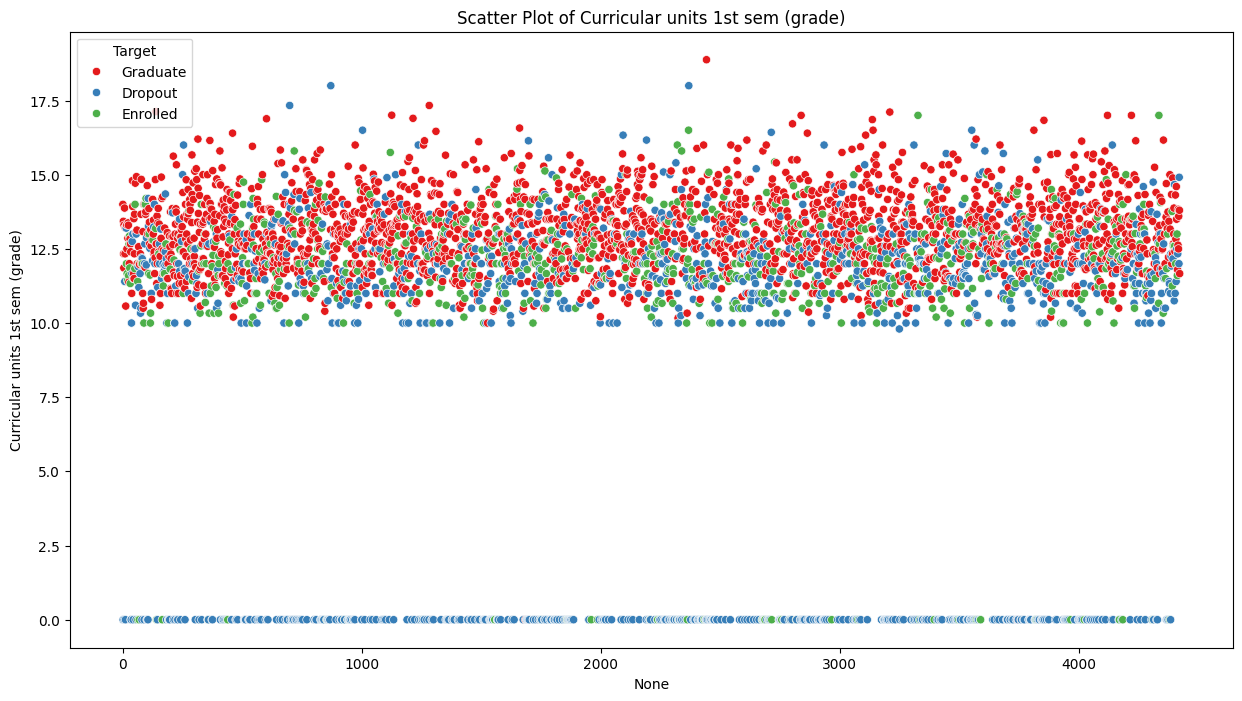

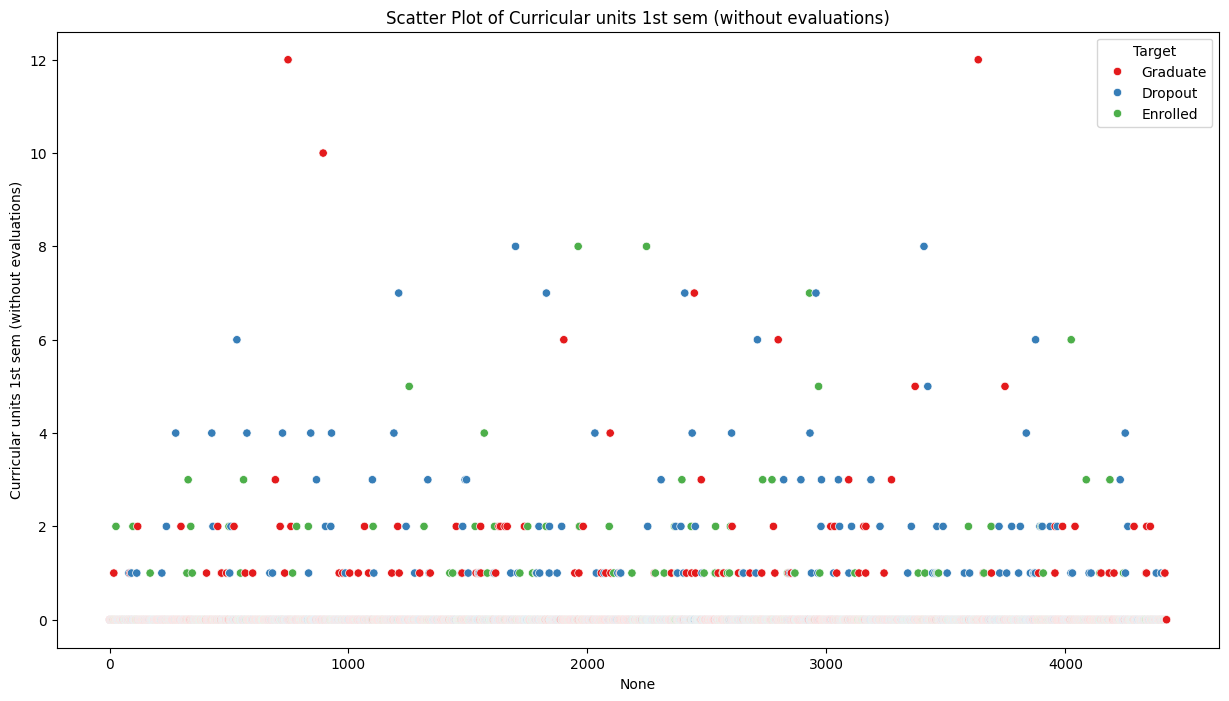

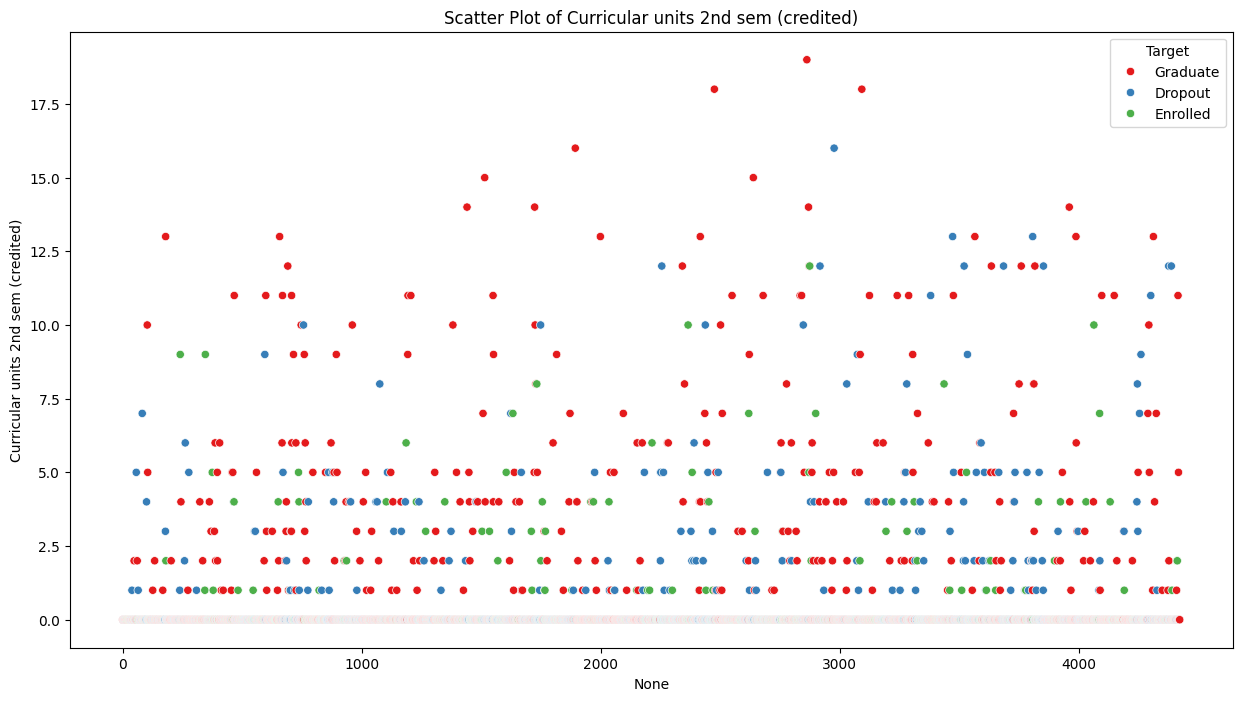

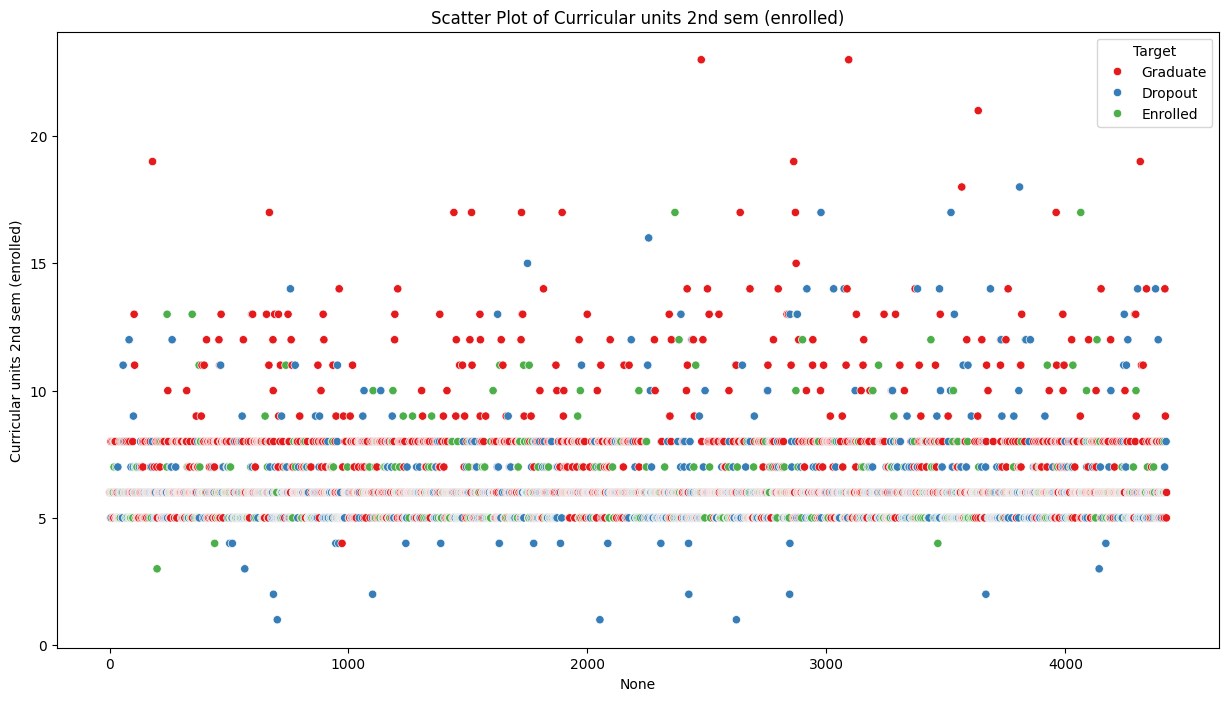

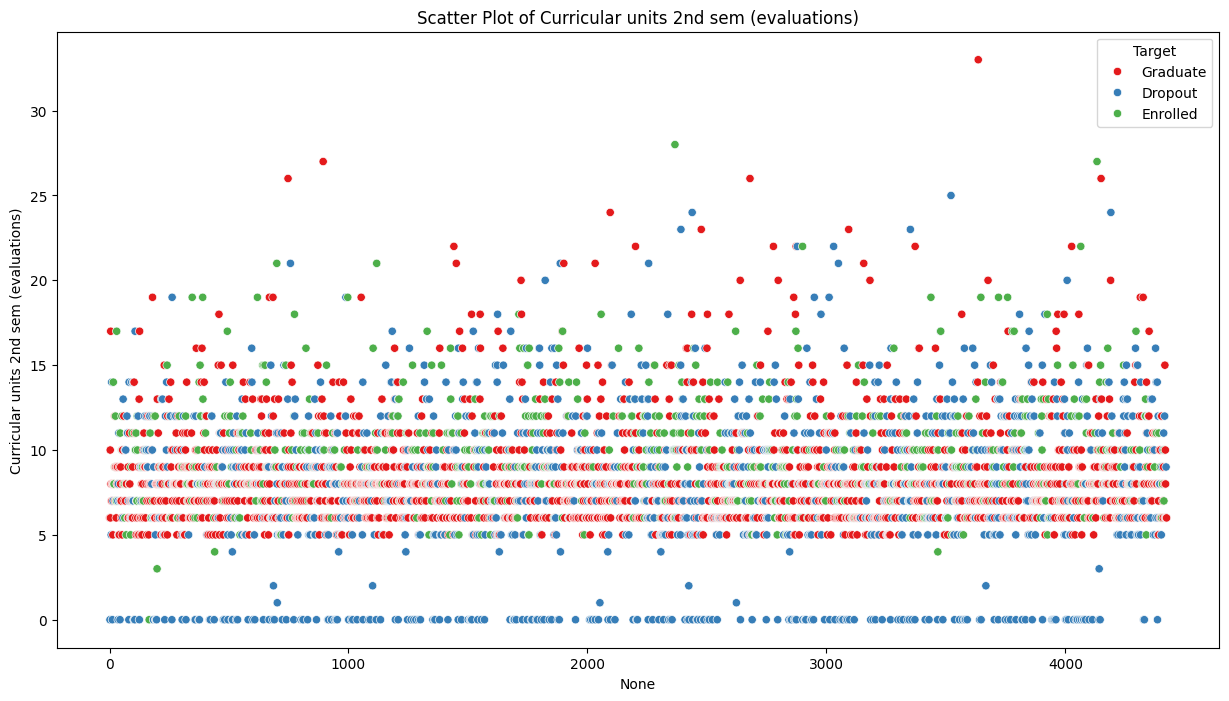

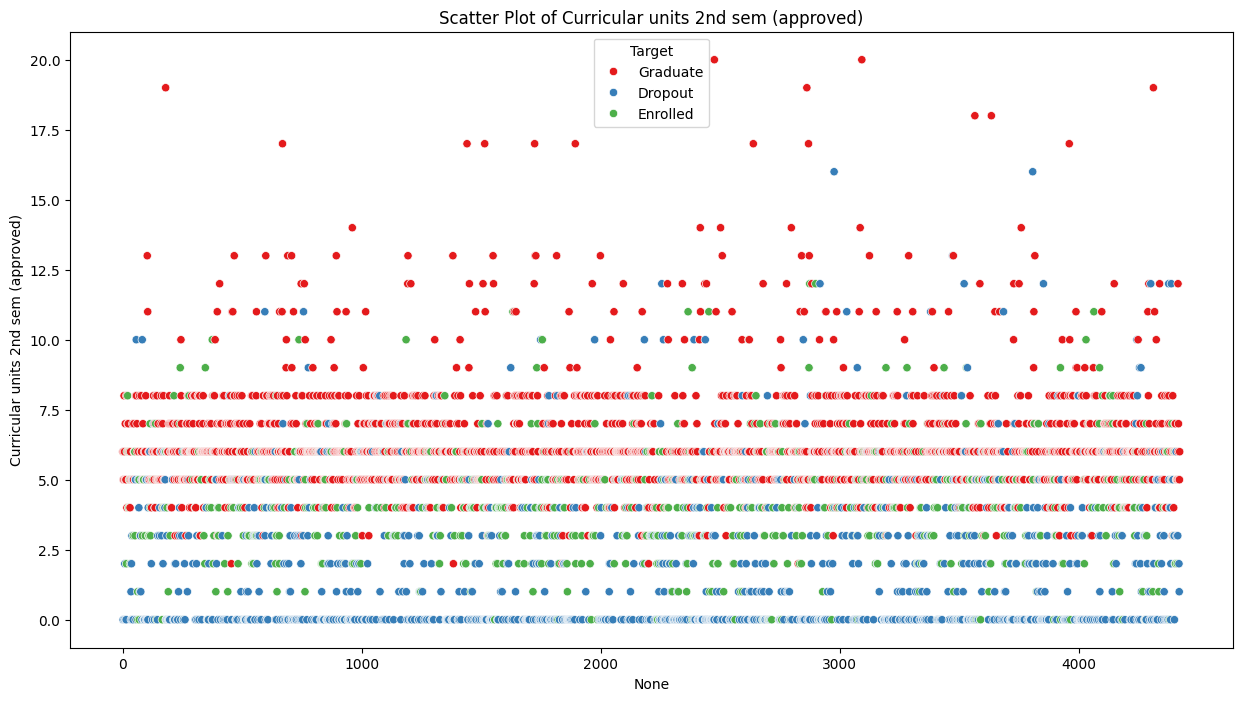

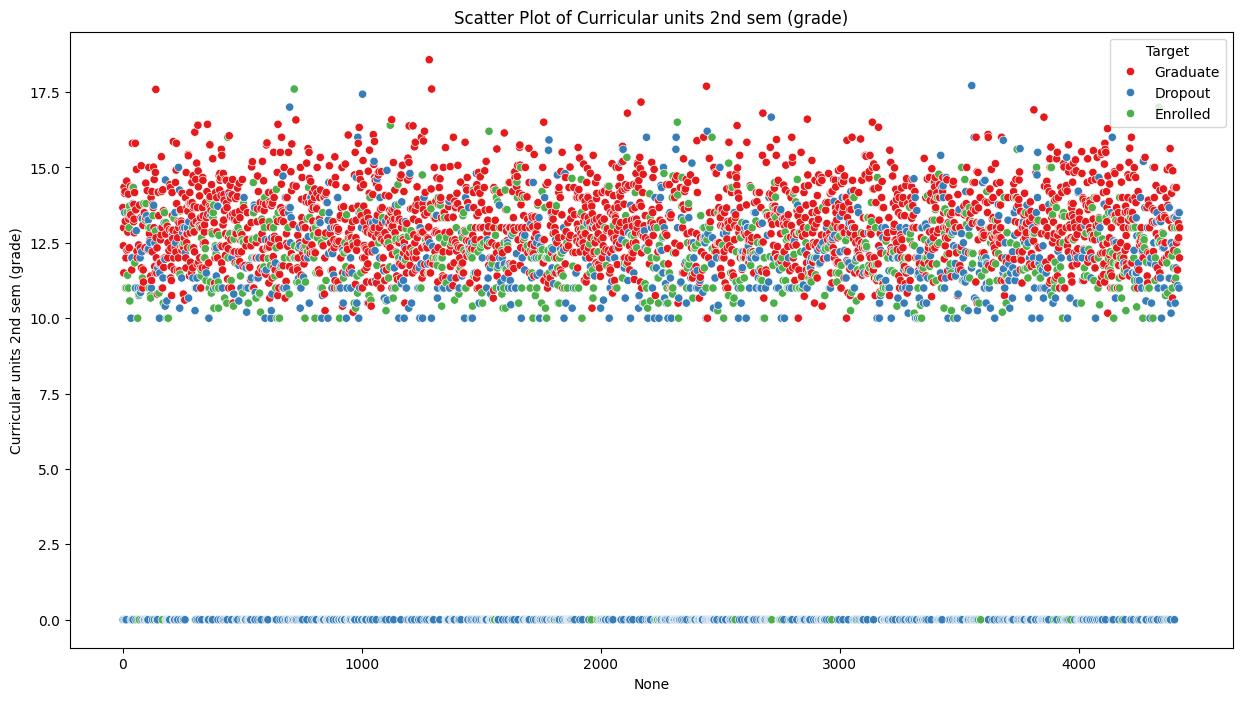

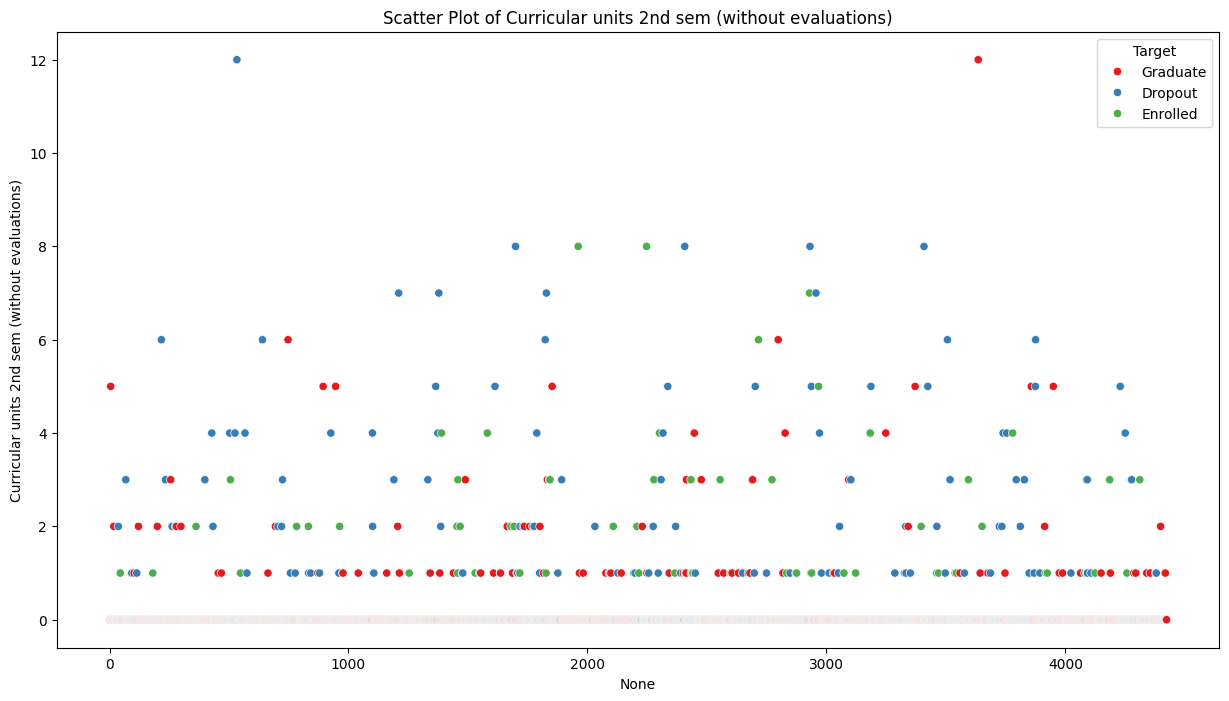

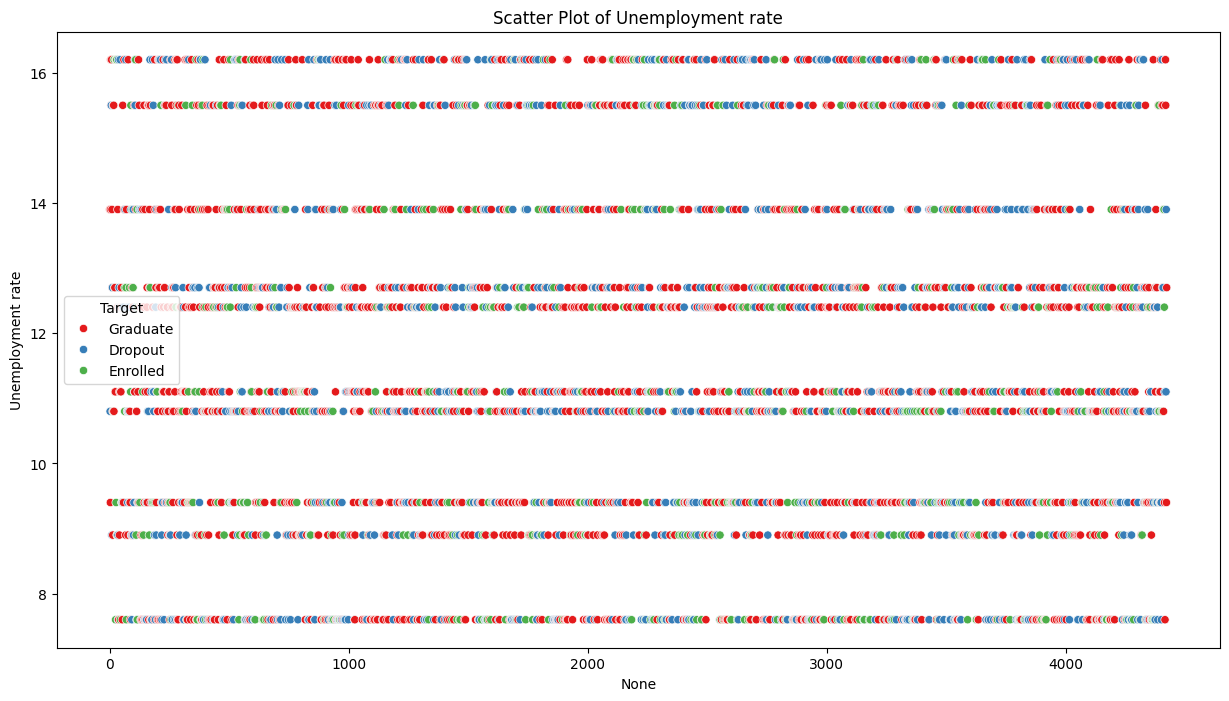

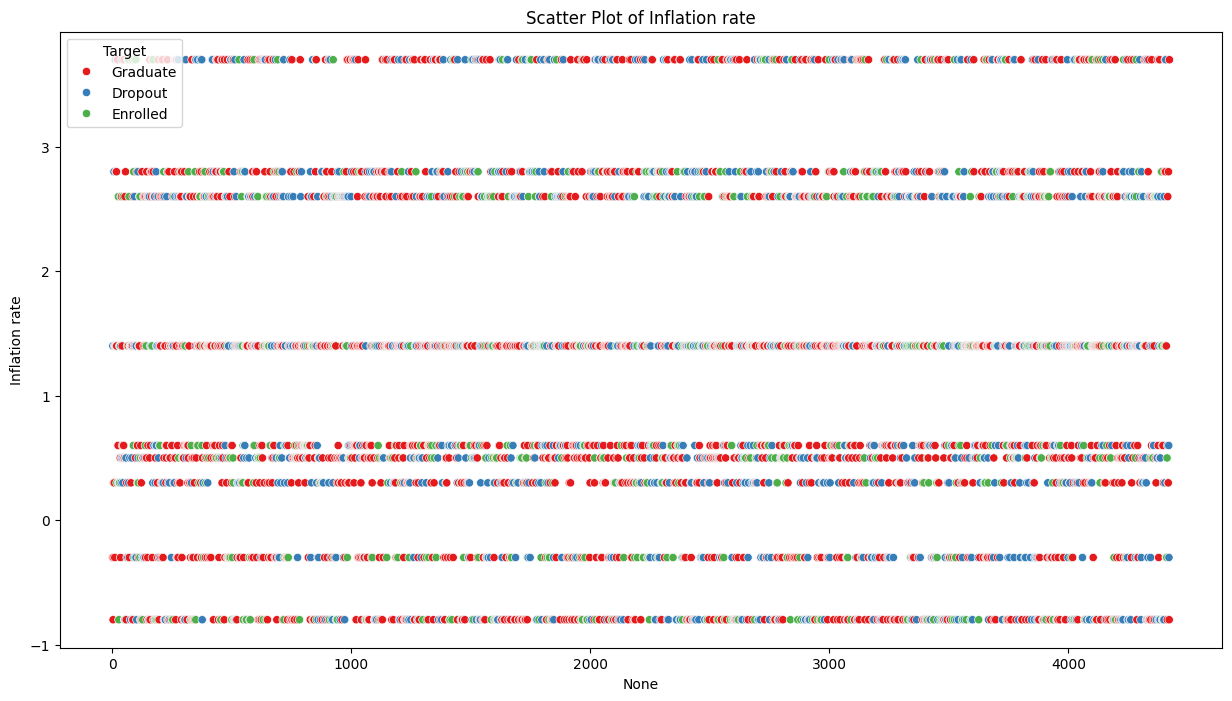

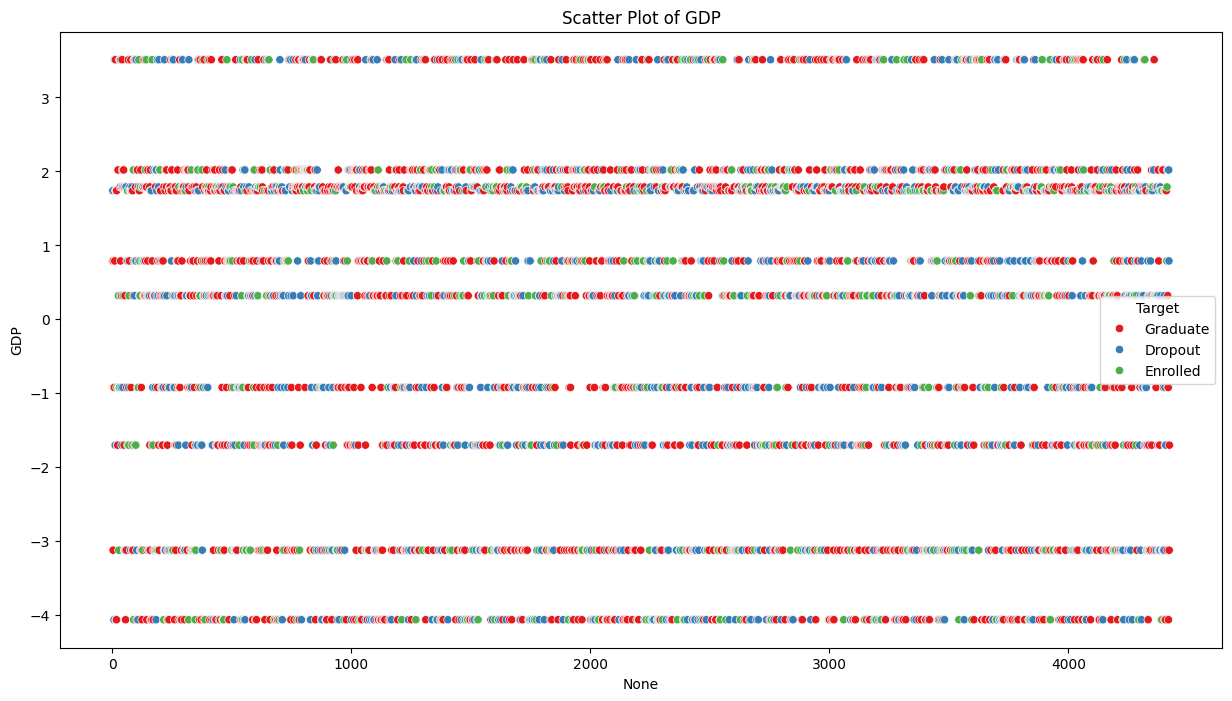

In [32]:
for col in num_df.columns:
    plt.figure(figsize=(15,8))
    sns.scatterplot(x=num_df.index, y=num_df[col], data=num_df, hue=df_renamed['Target'], palette='Set1')
    plt.title(f"Scatter Plot of {col}")
    plt.show()

### Categorical Variables

#### Grouped Bar charts of proportions between Target and Categorical Variables


In [33]:
for col in cat_df.columns:
    proportions = df_renamed.groupby([col, 'Target']).size().reset_index(name='count')
    proportions['proportion'] = proportions.groupby(col)['count'].transform(lambda x: x / x.sum())
    
    chart = px.bar(proportions, x=col, y='proportion', color='Target', 
           barmode='group', title=f'Grouped Bar Chart of Proportions between Target and {col}')
    chart.show()

#### Count plots for each categorical feature

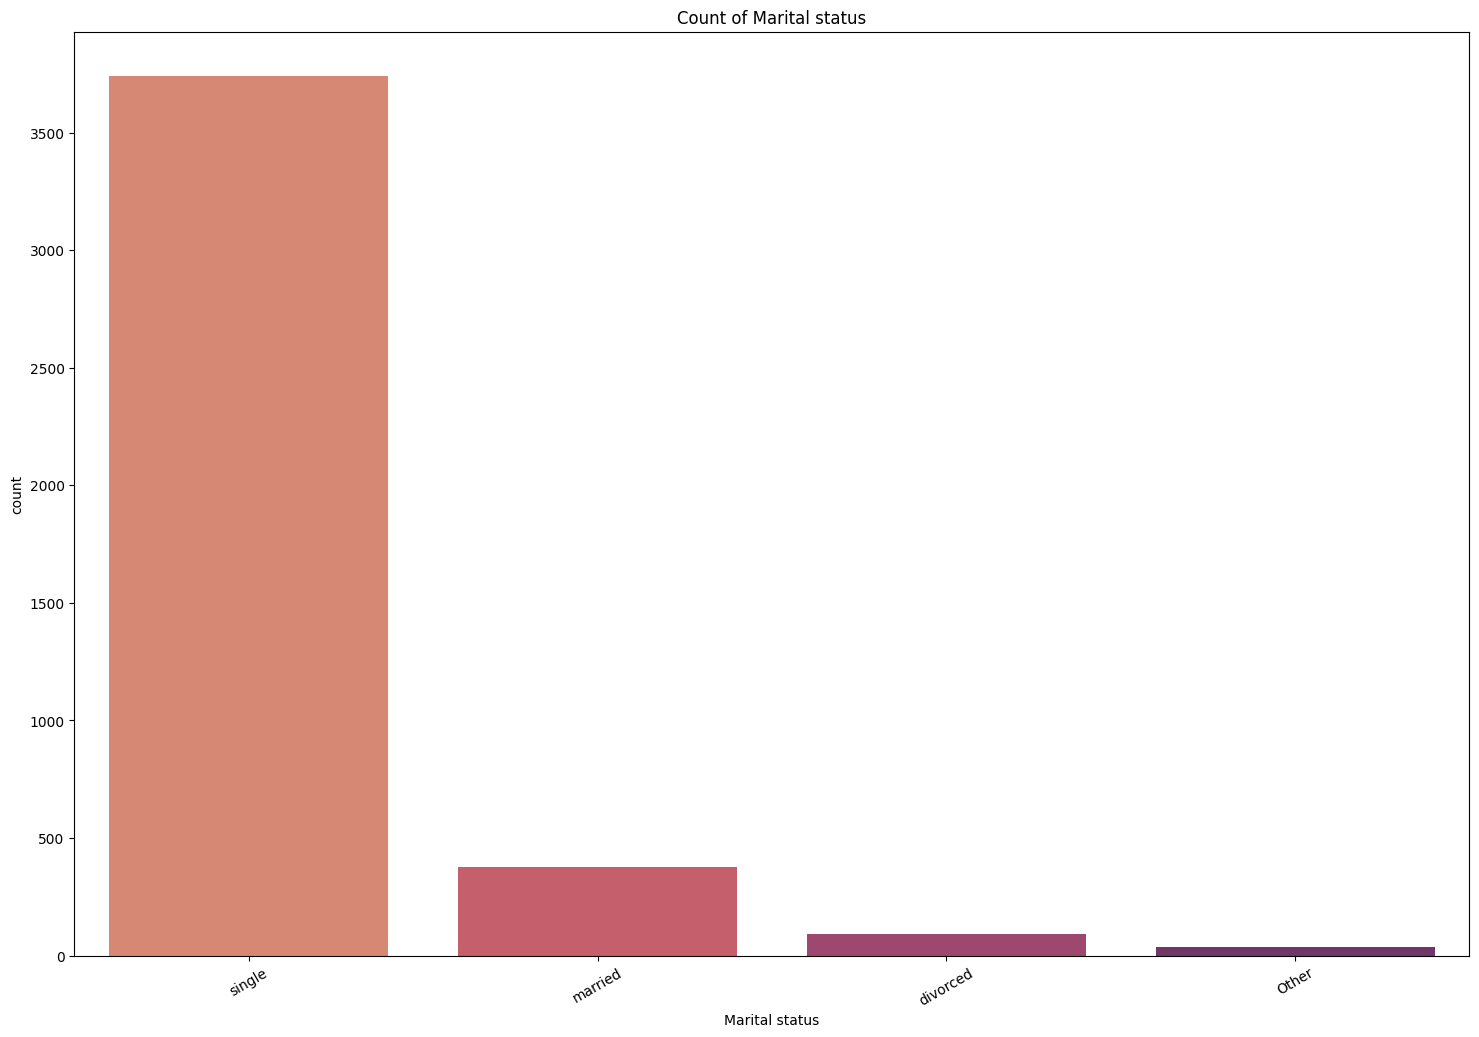

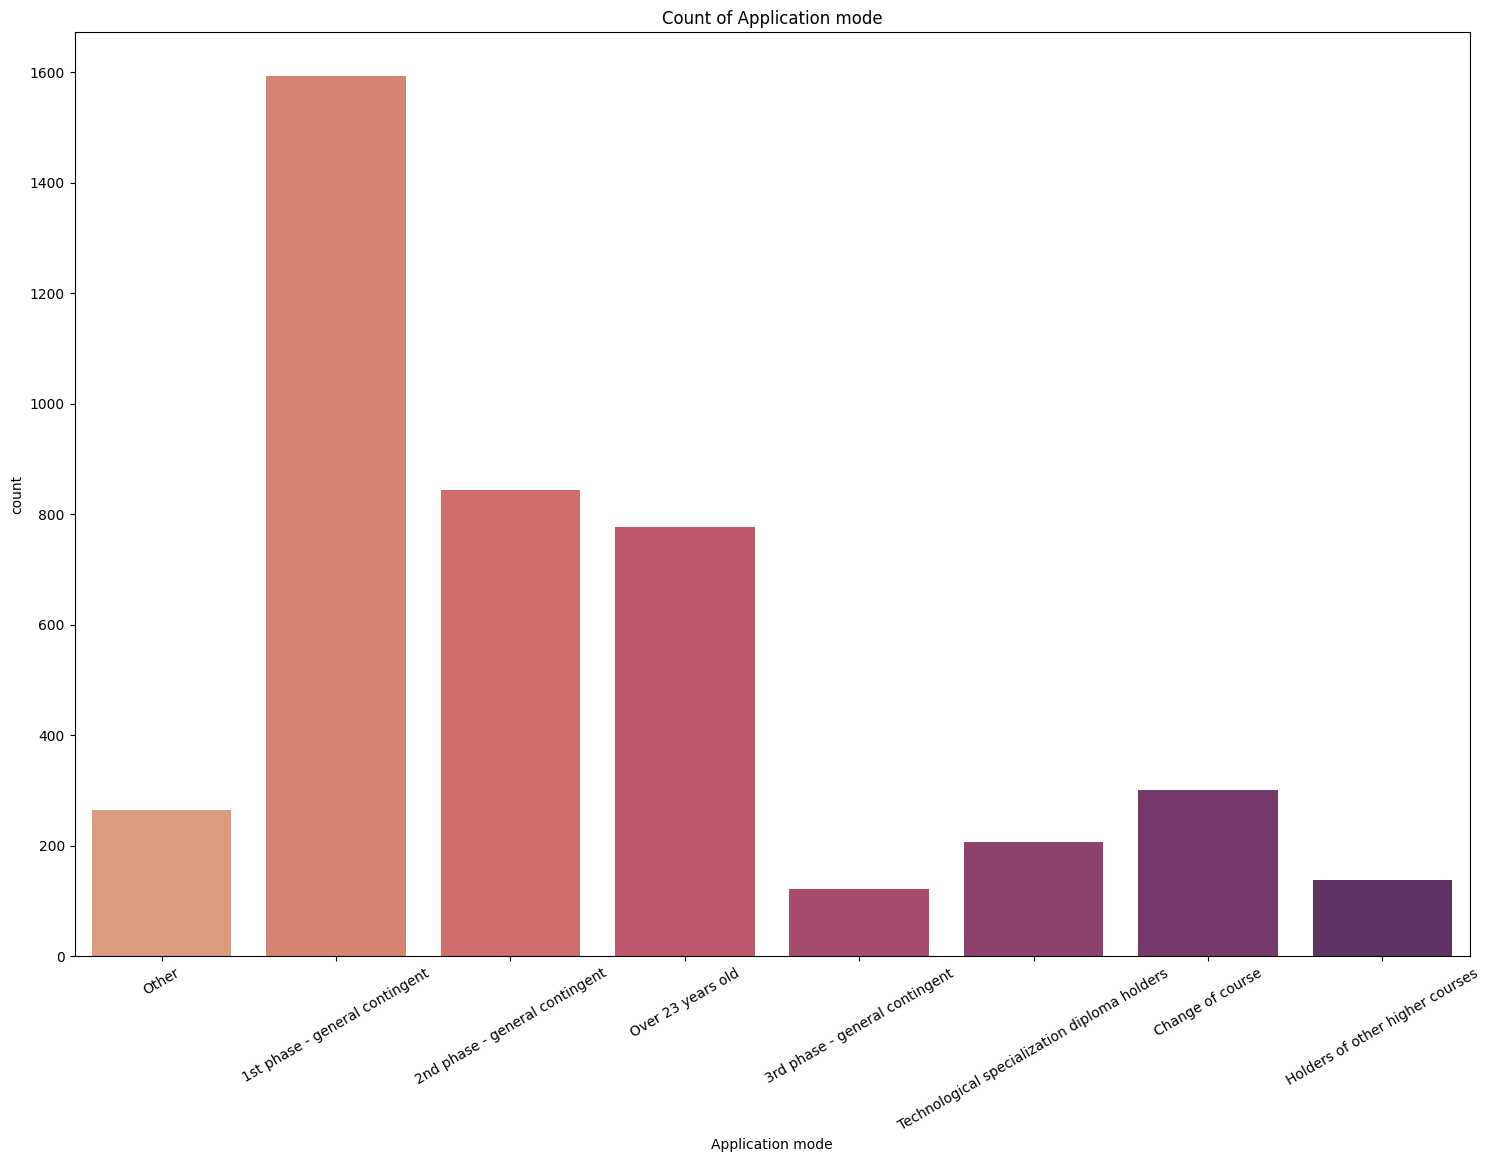

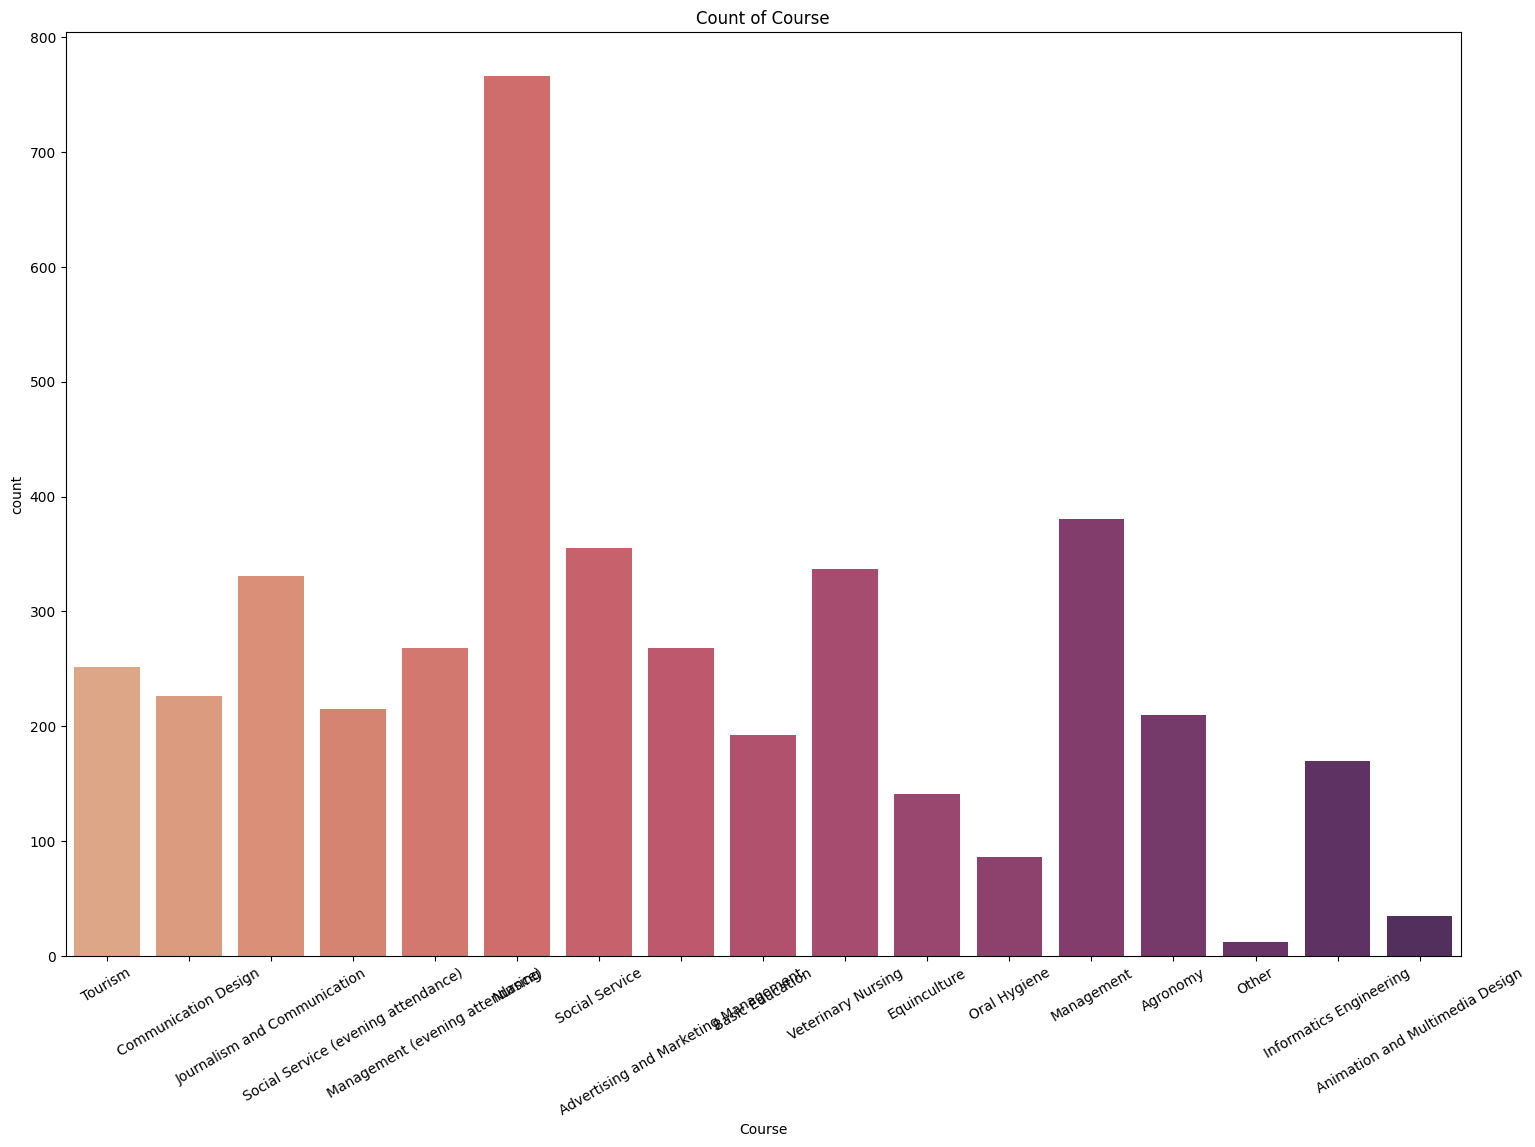

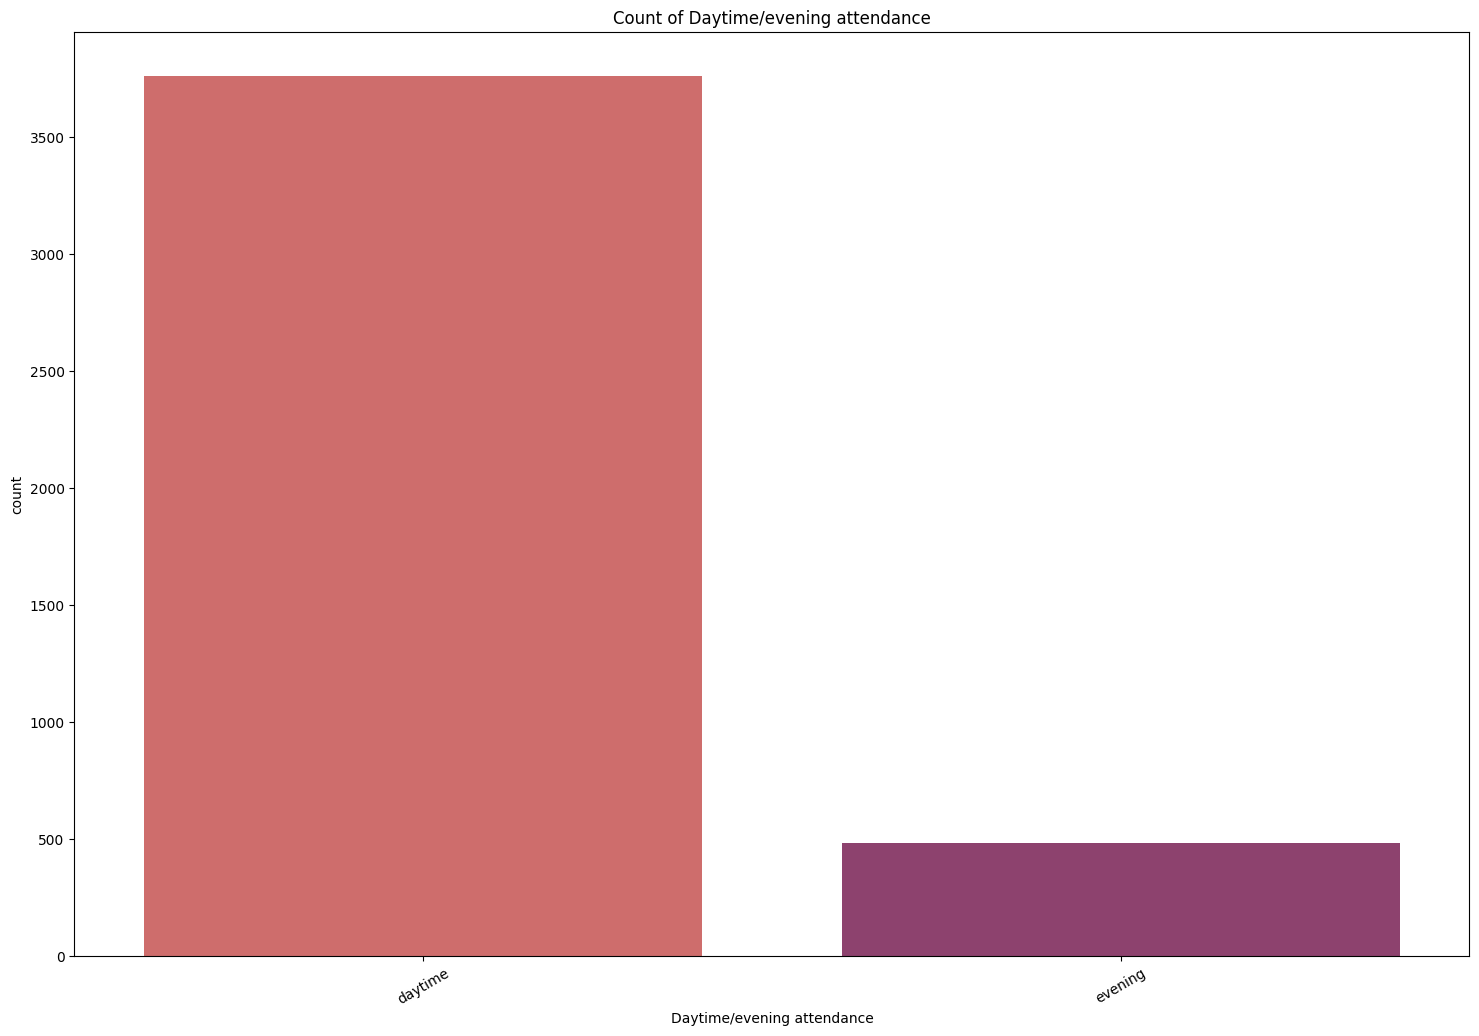

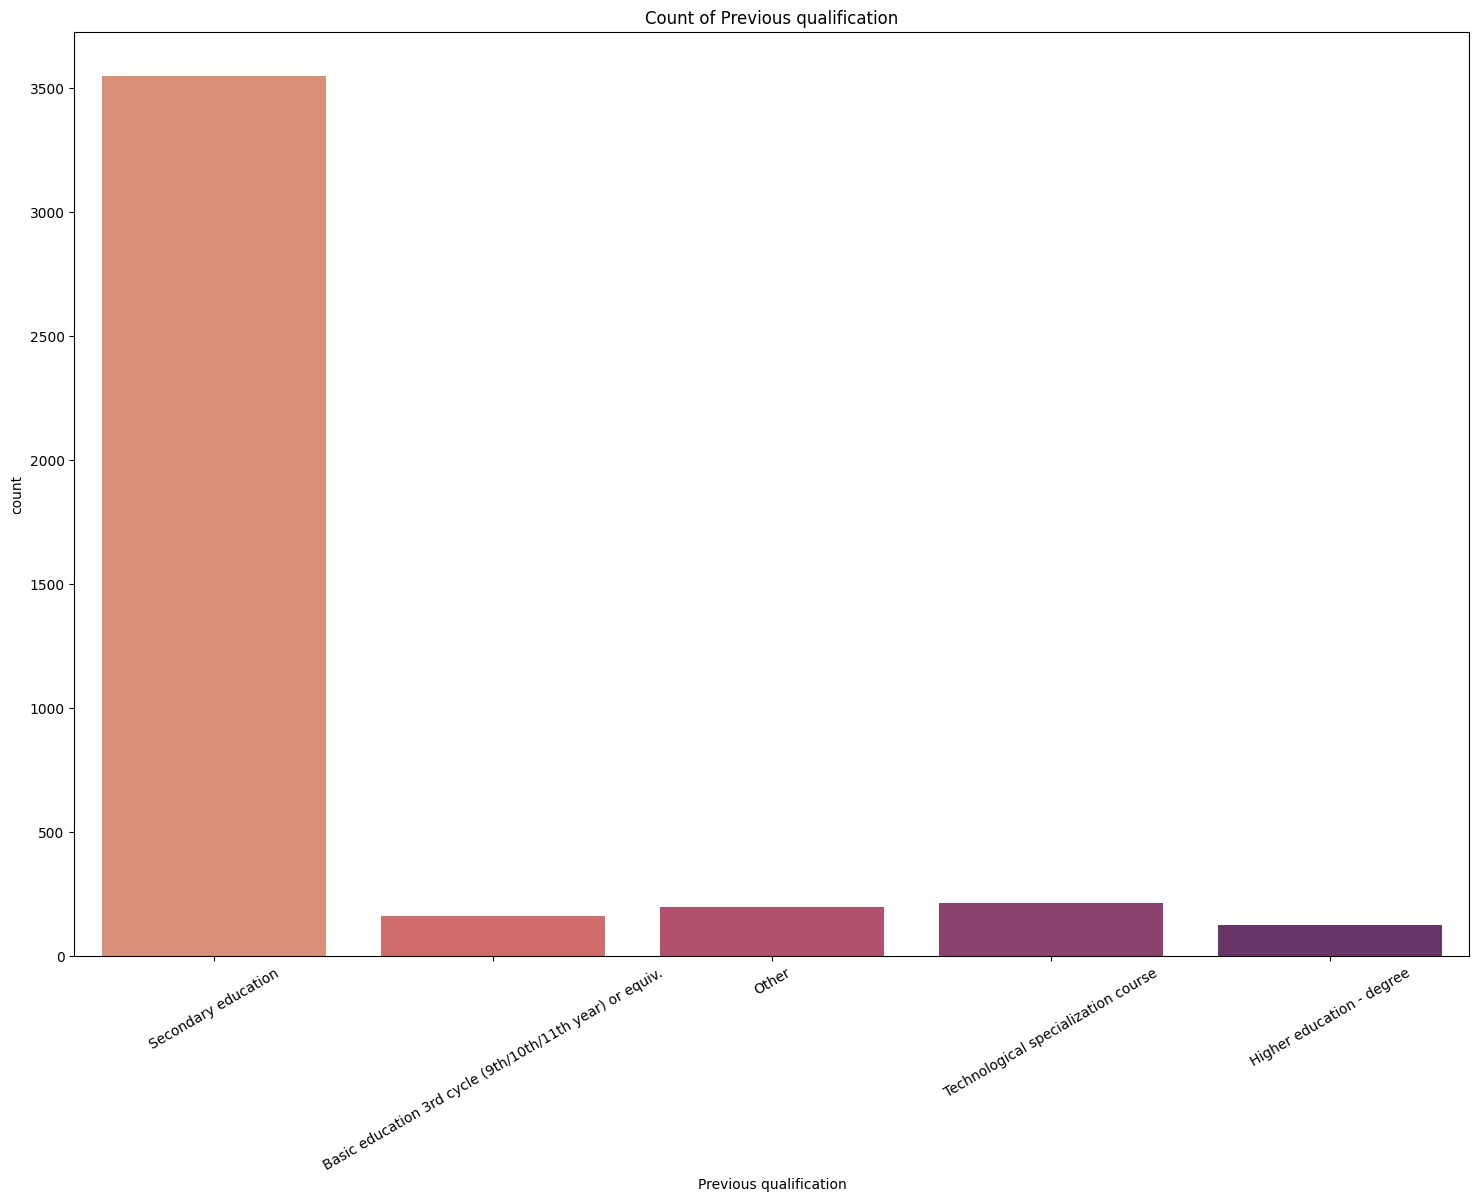

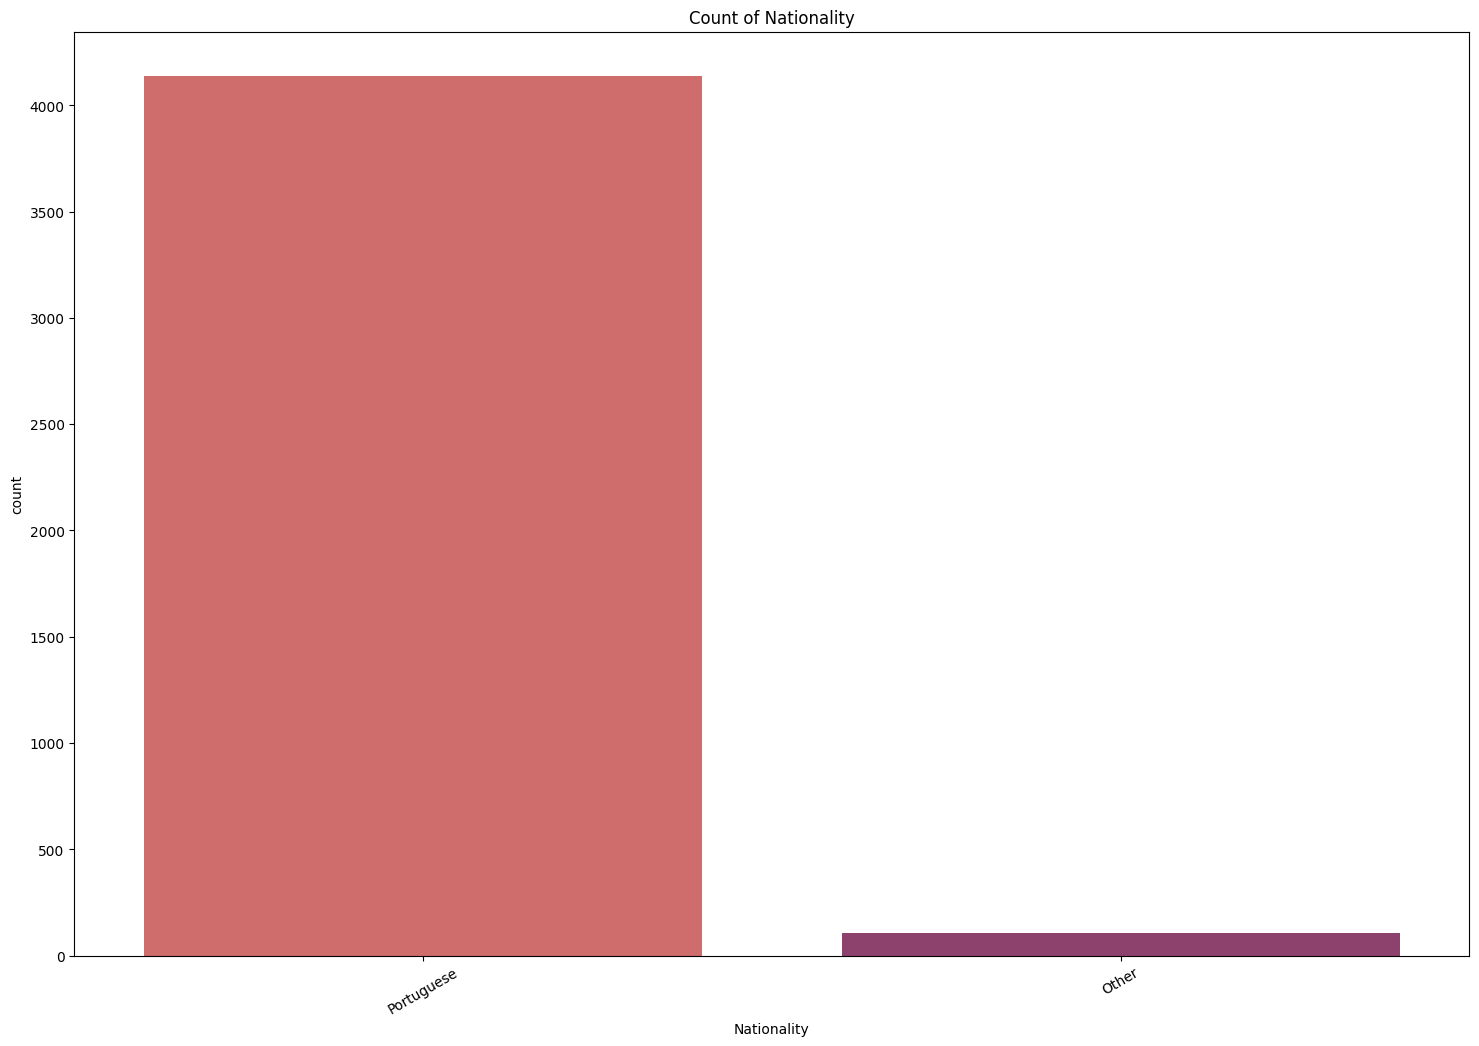

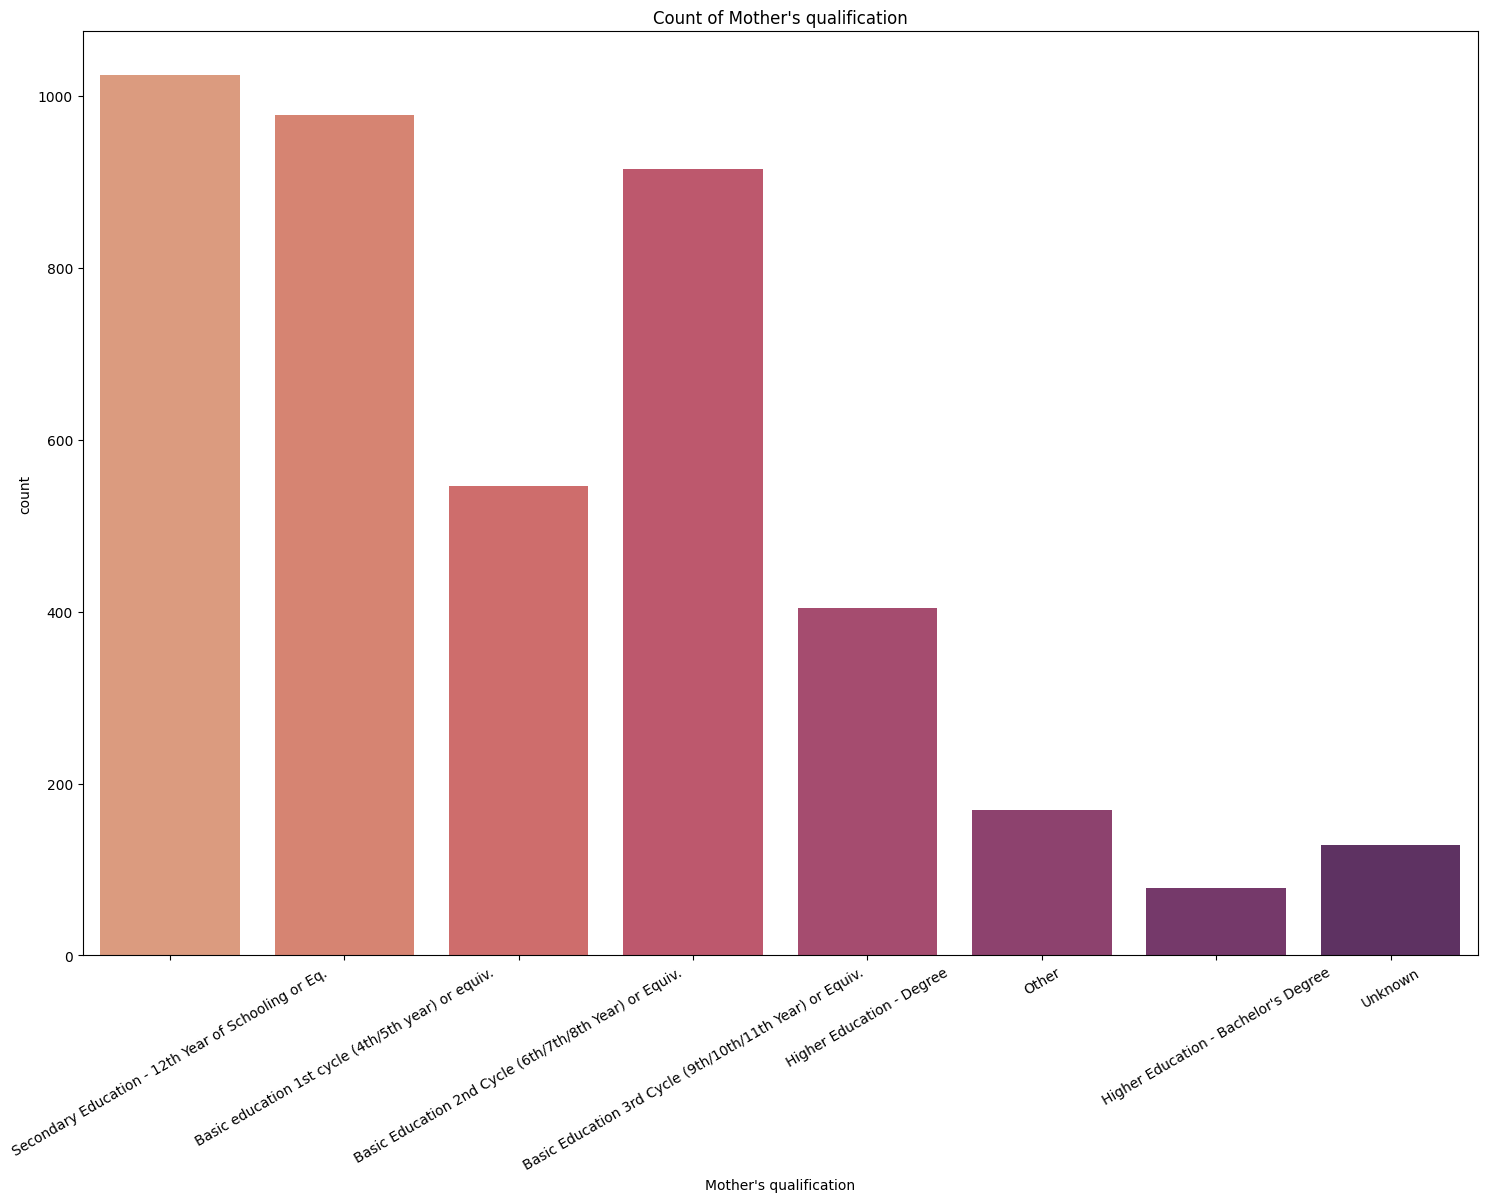

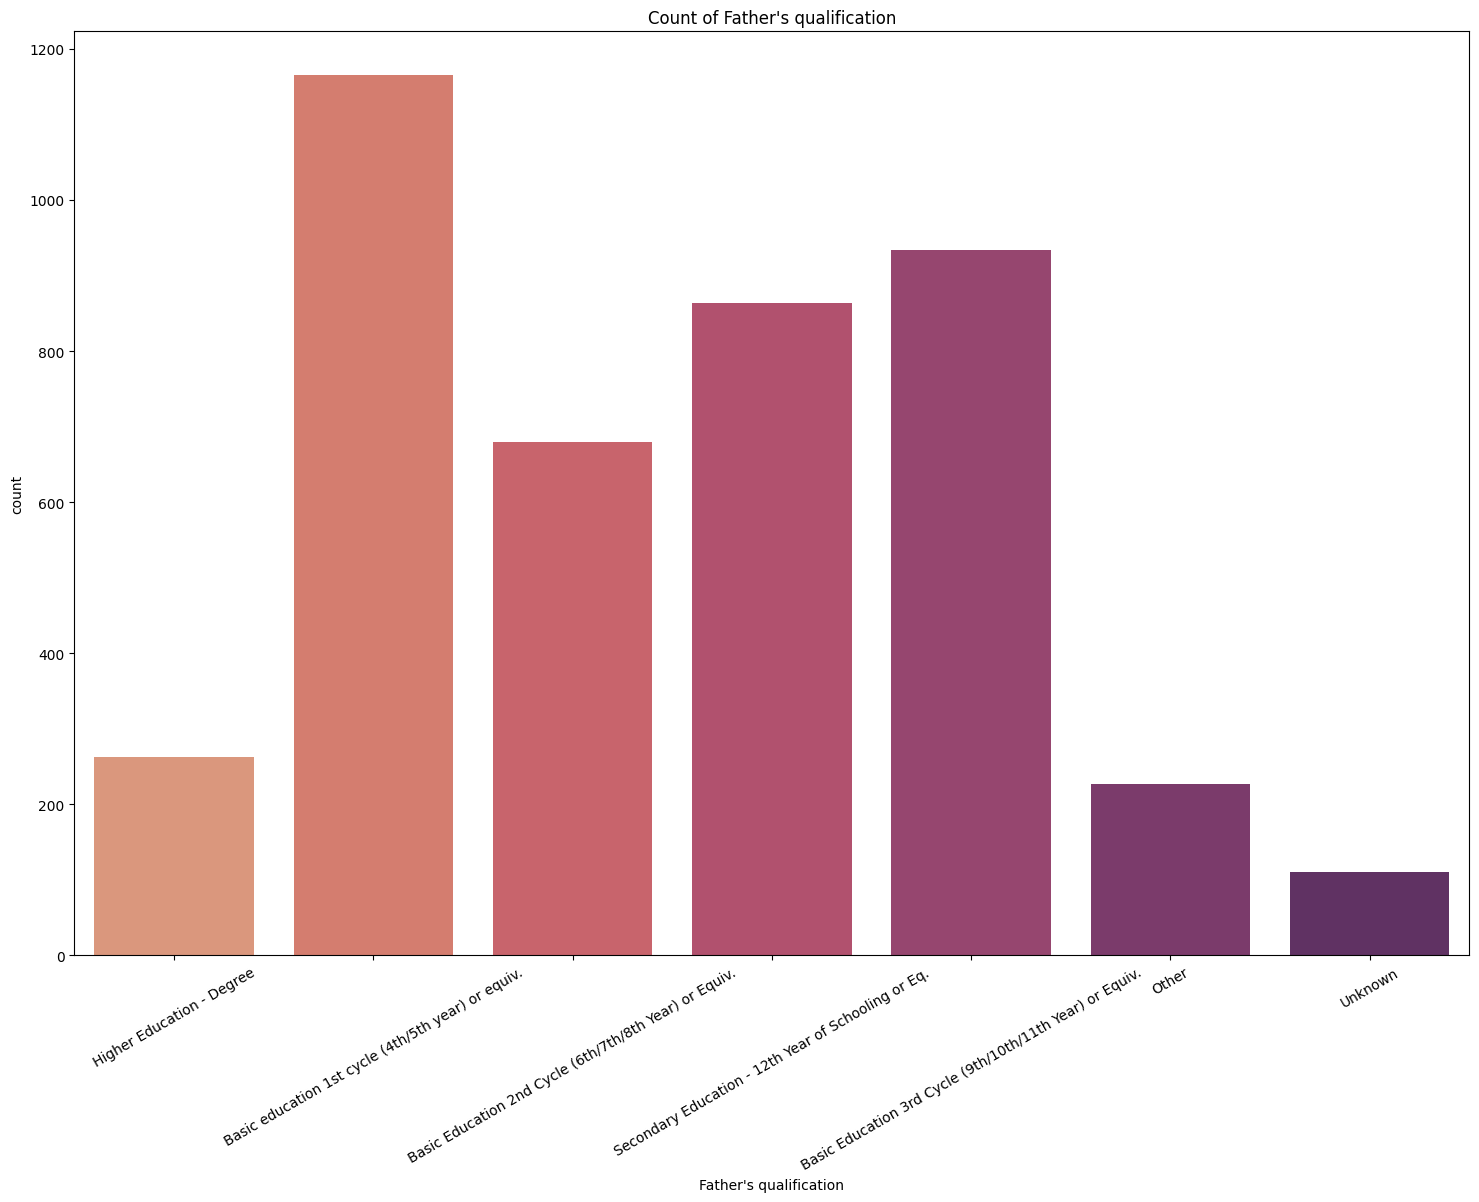

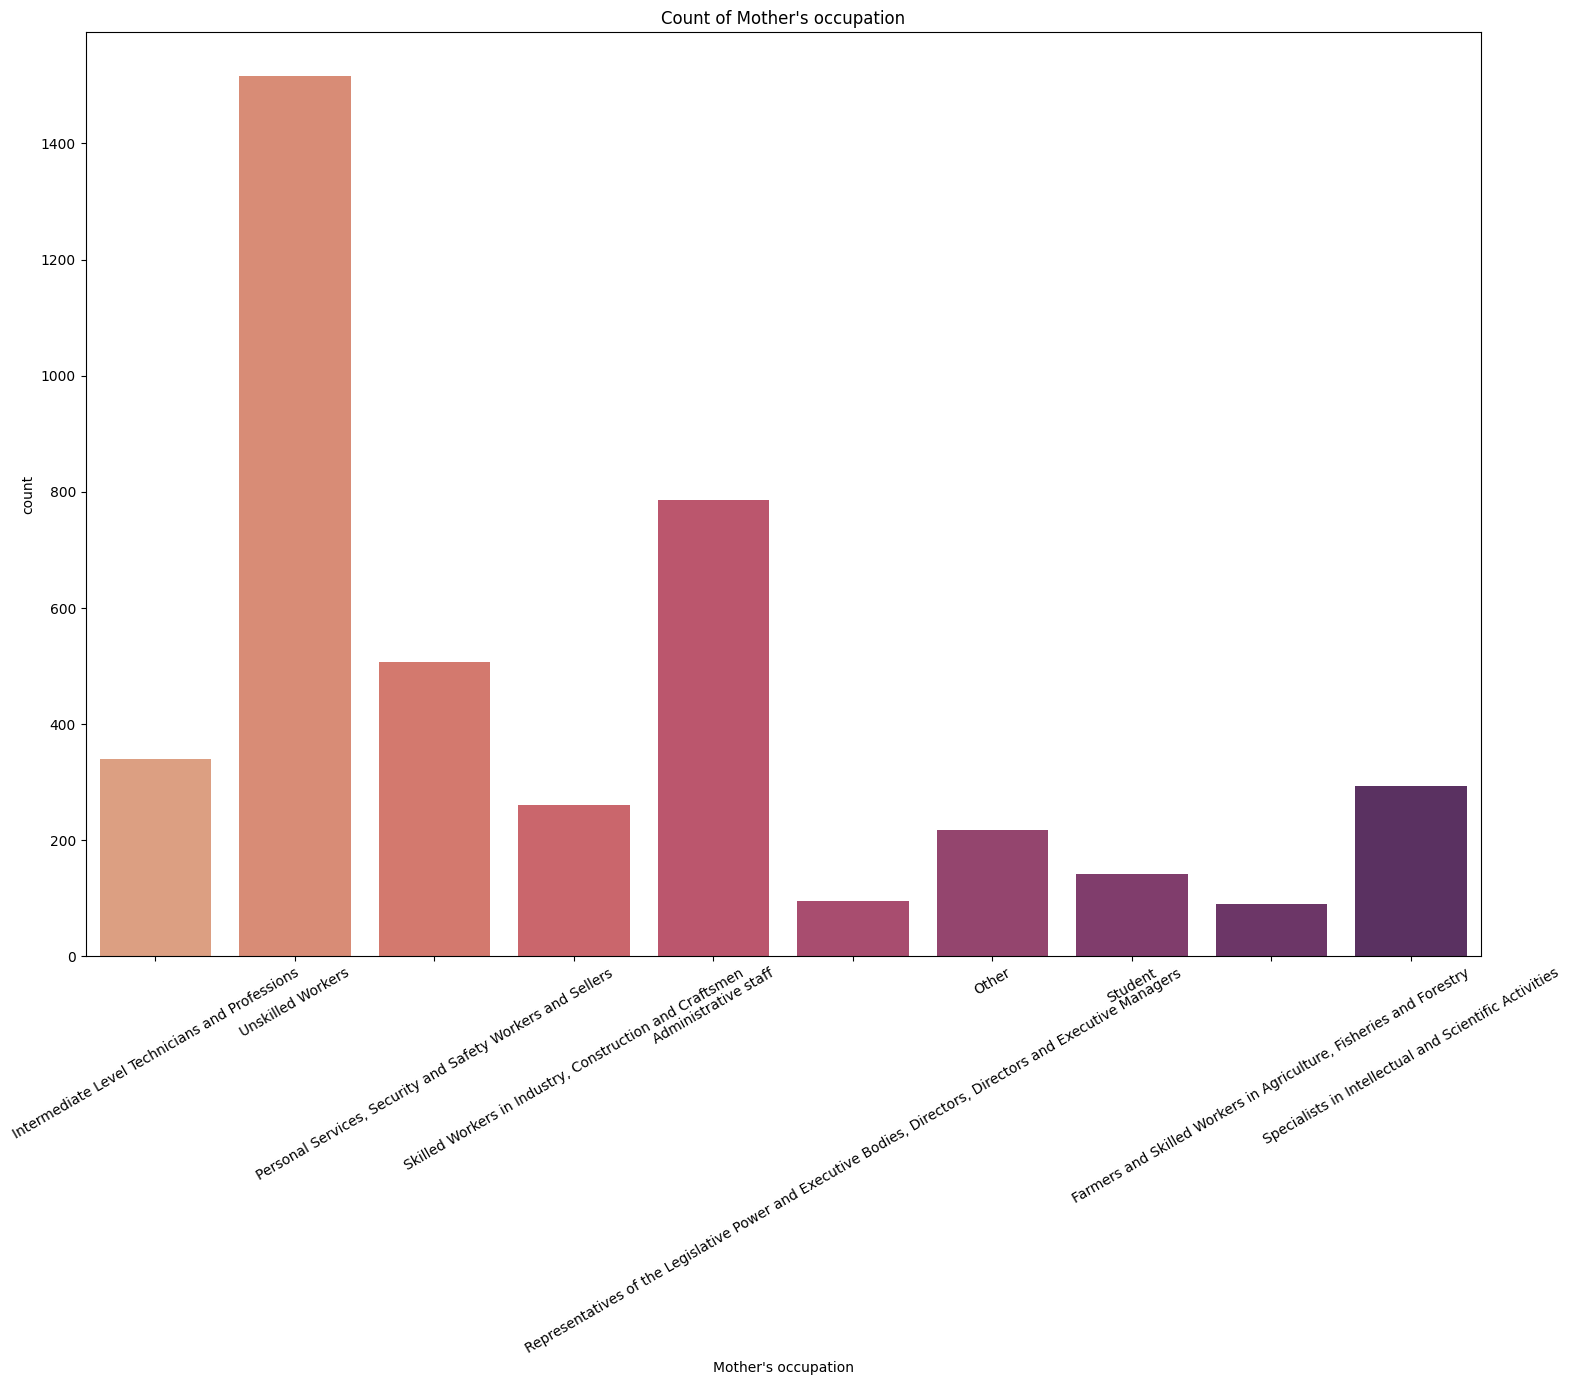

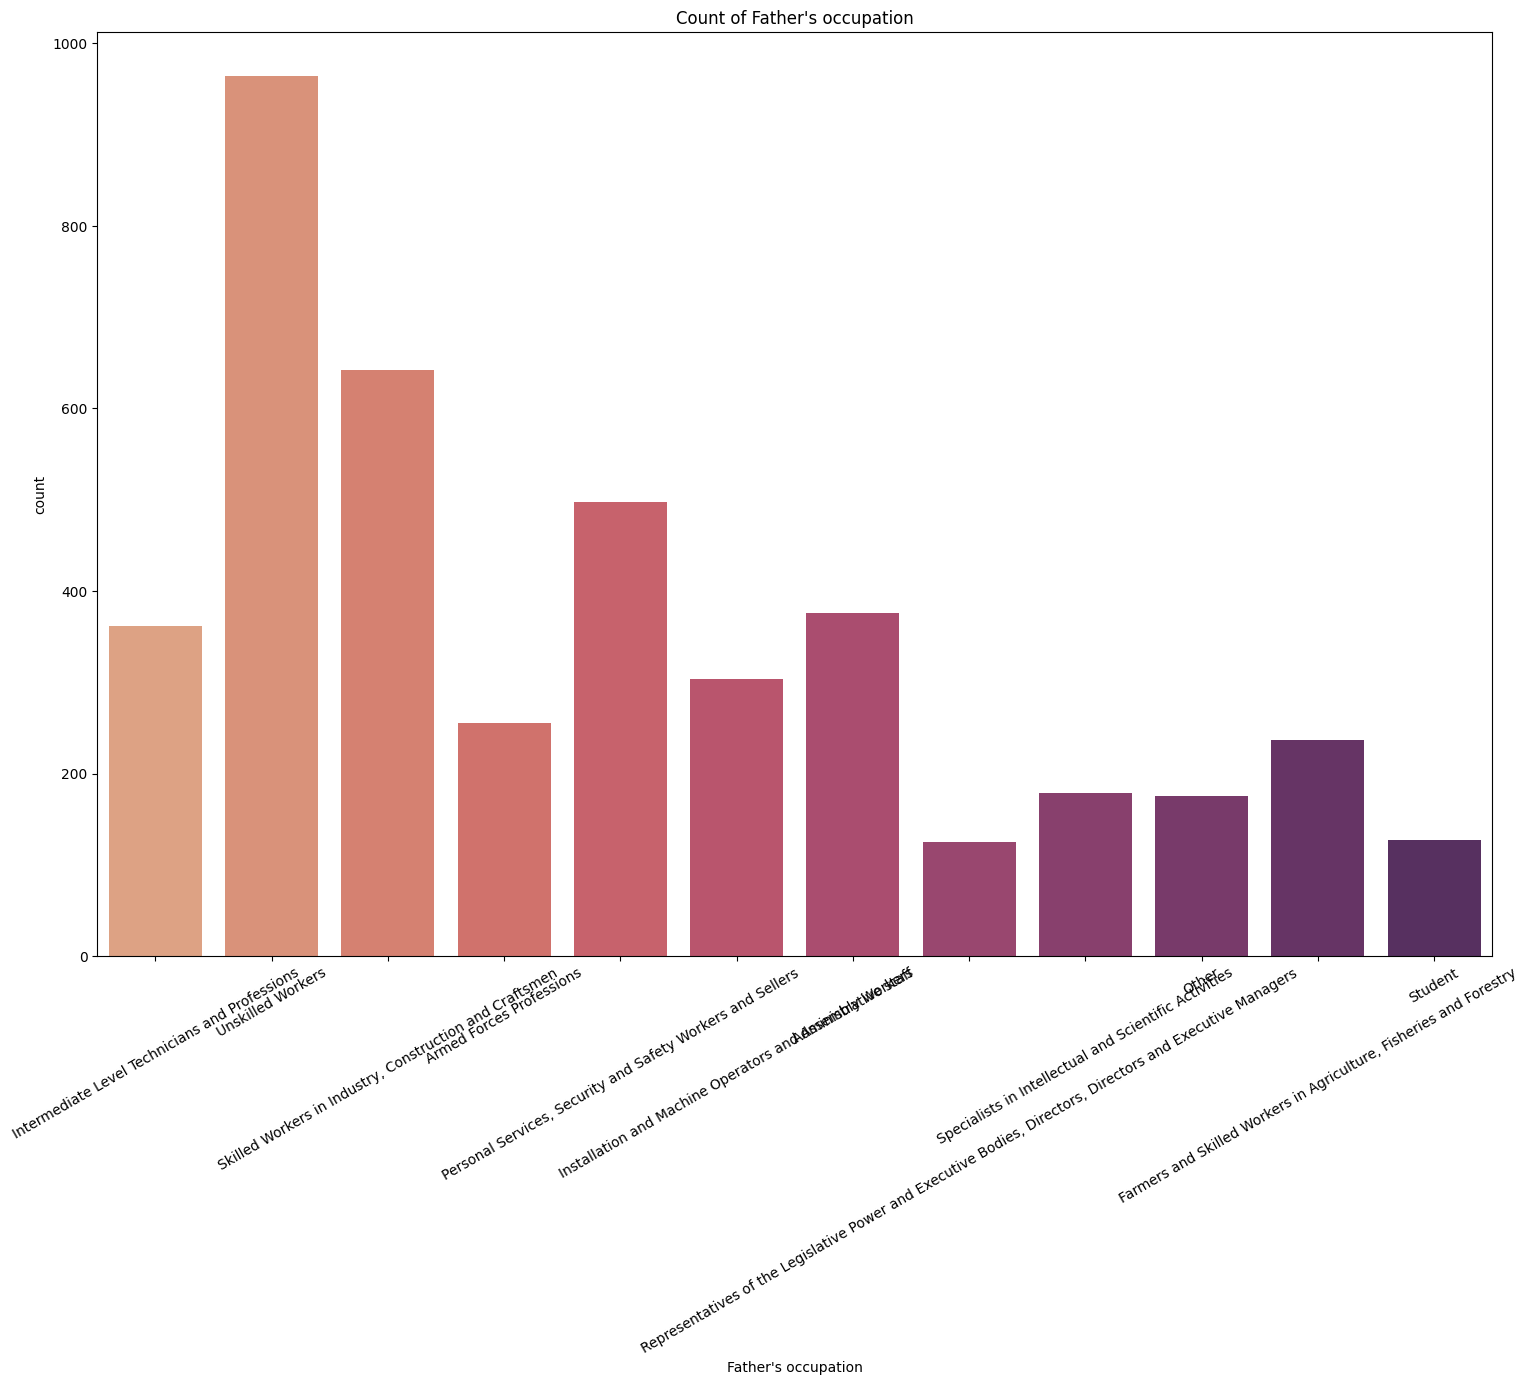

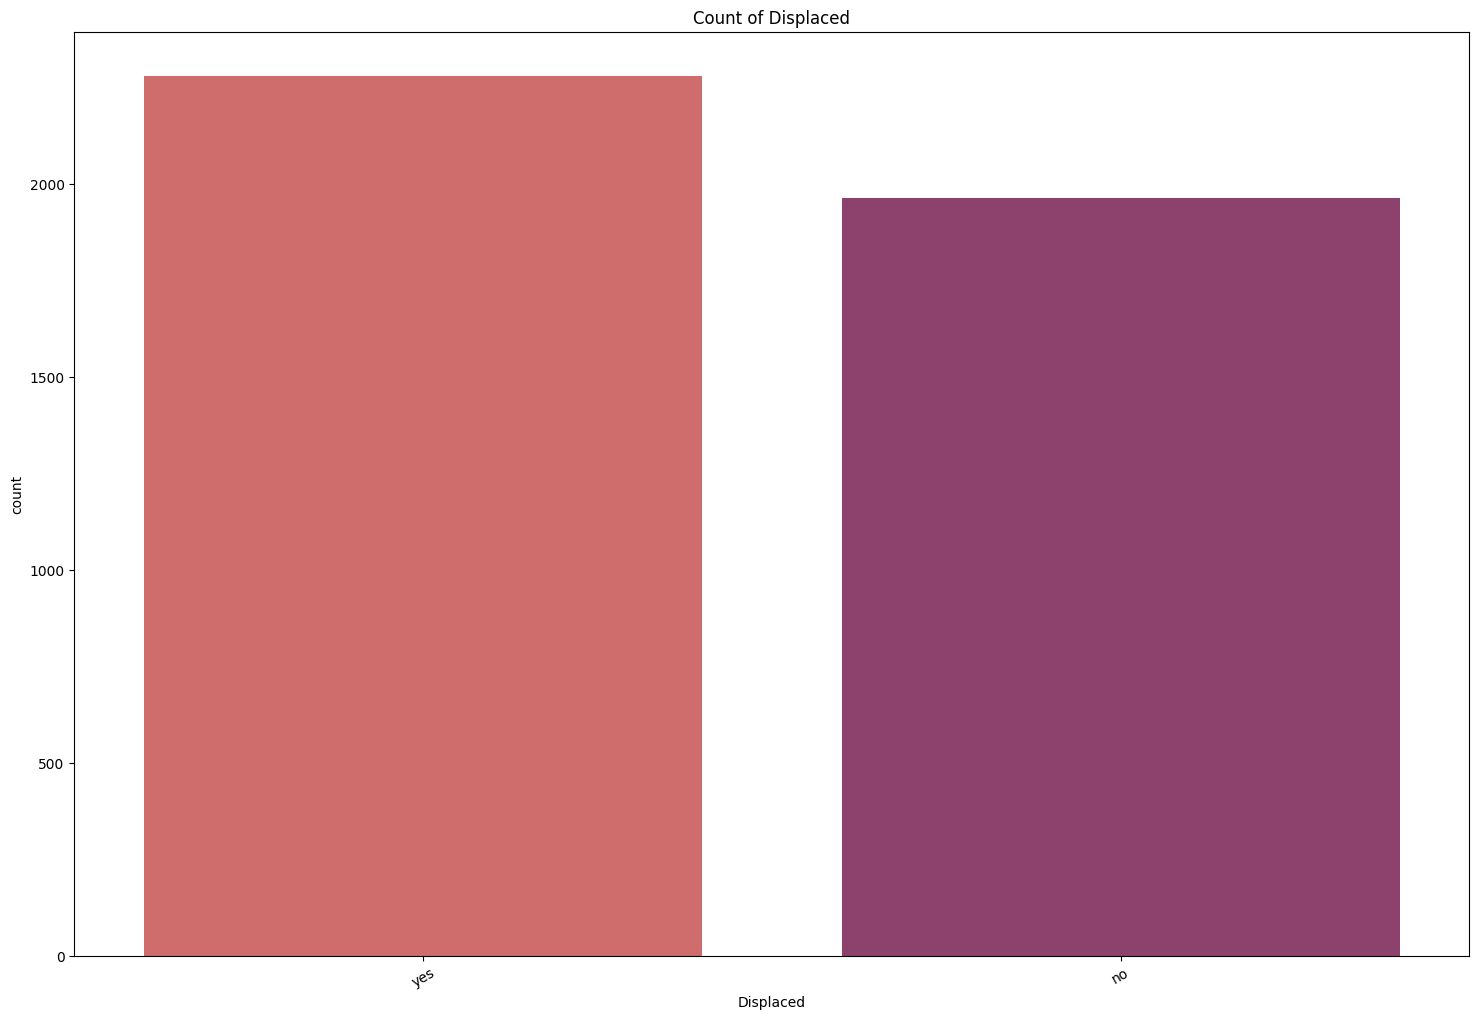

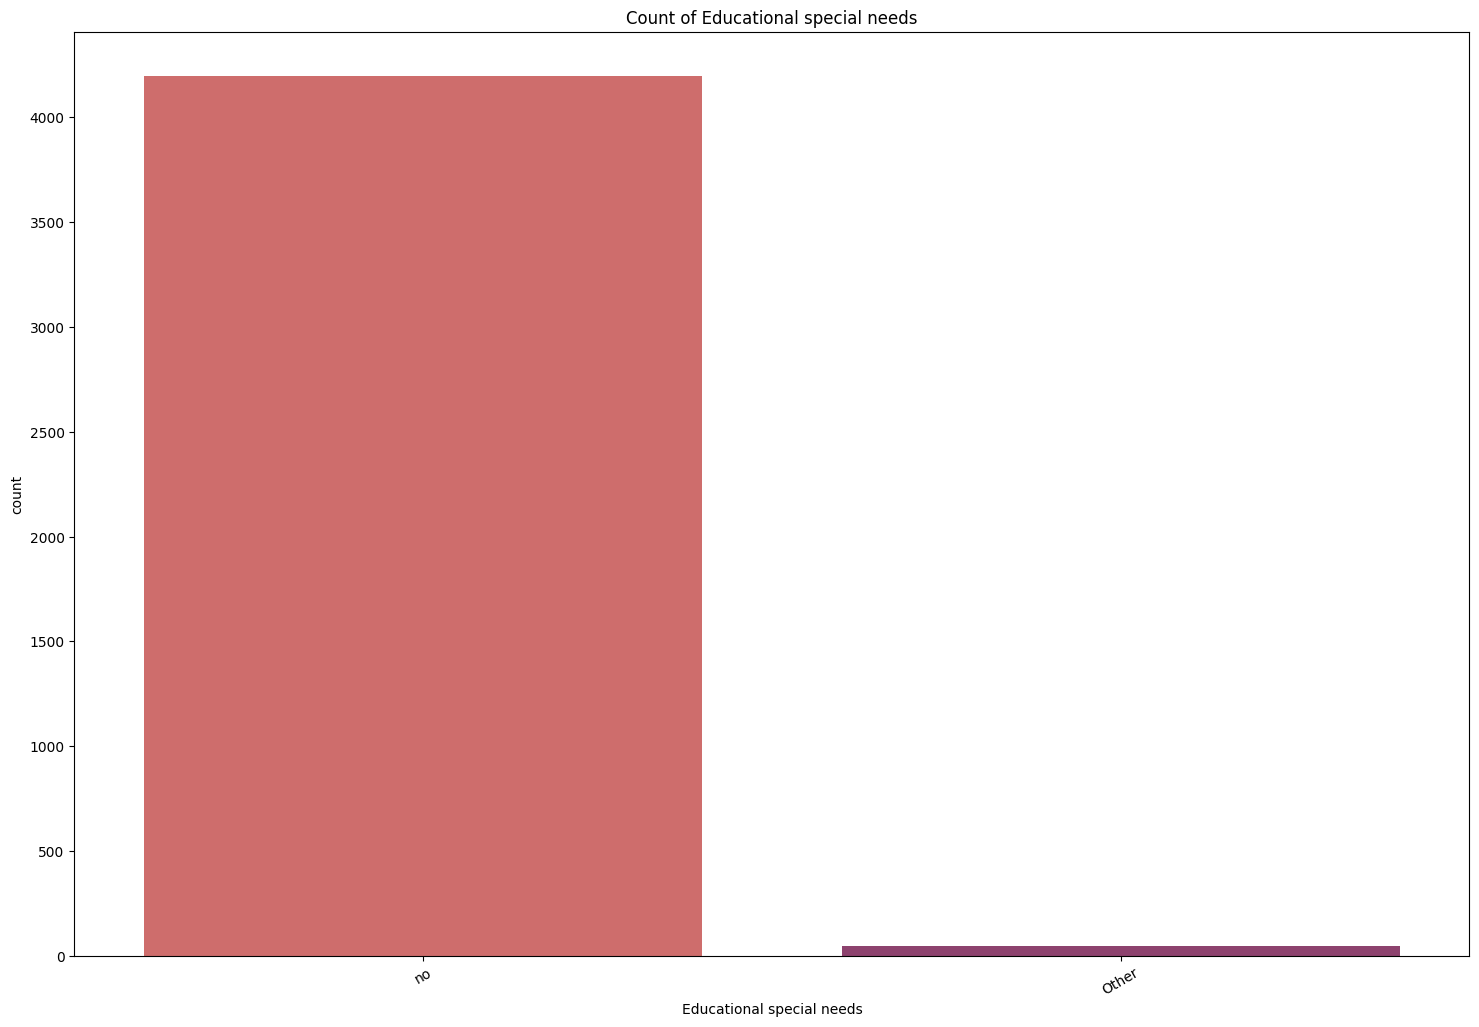

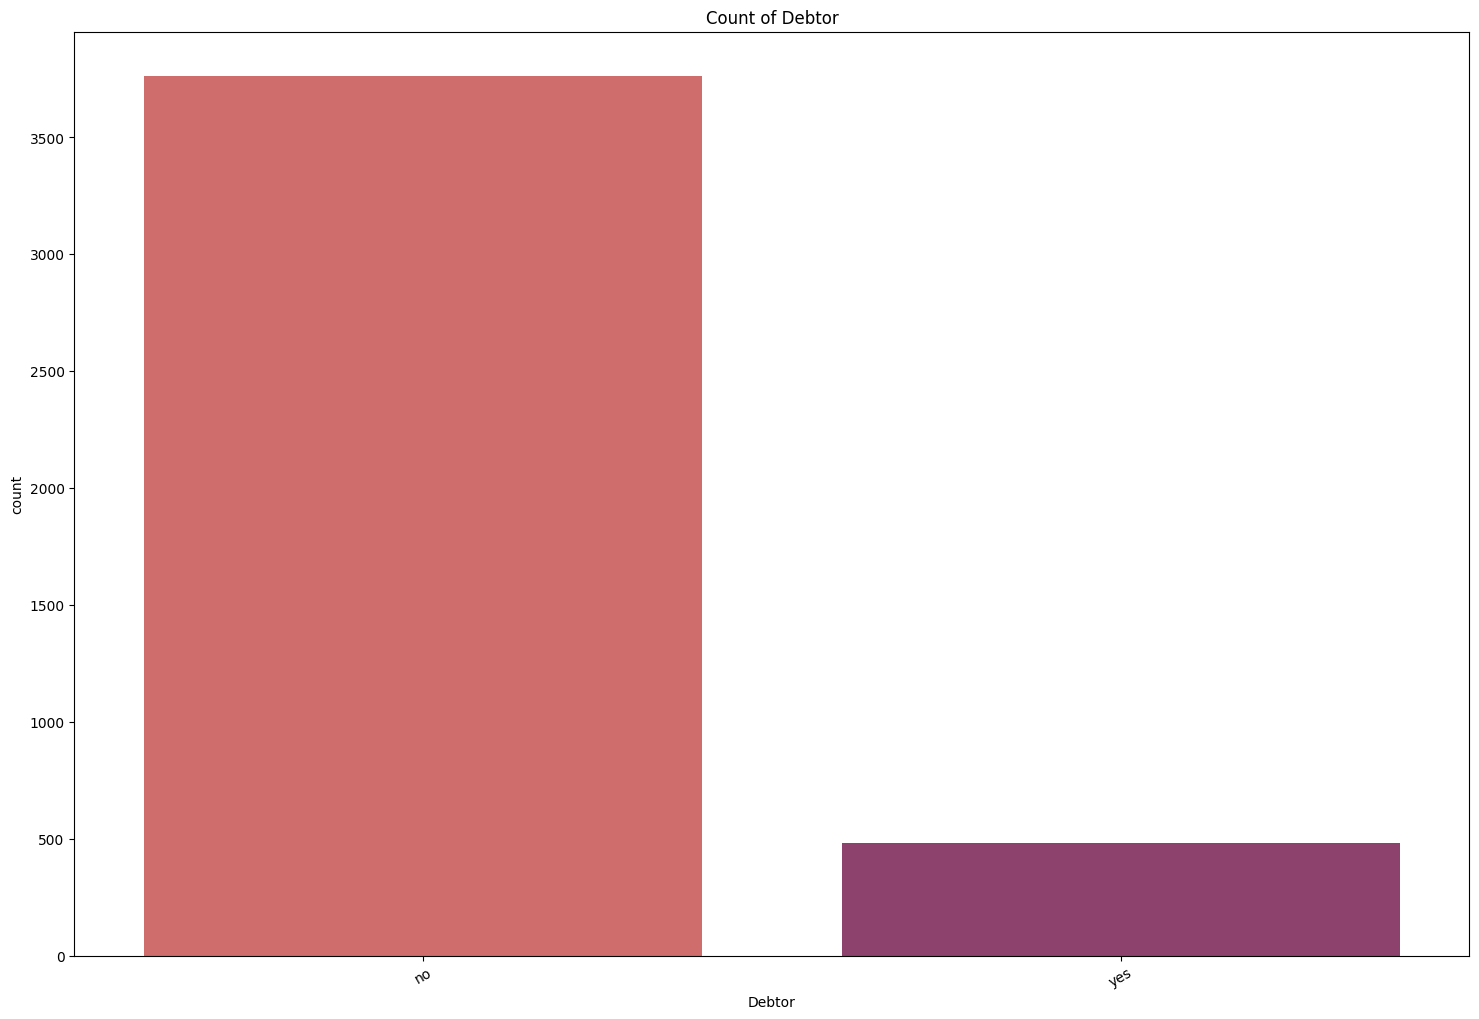

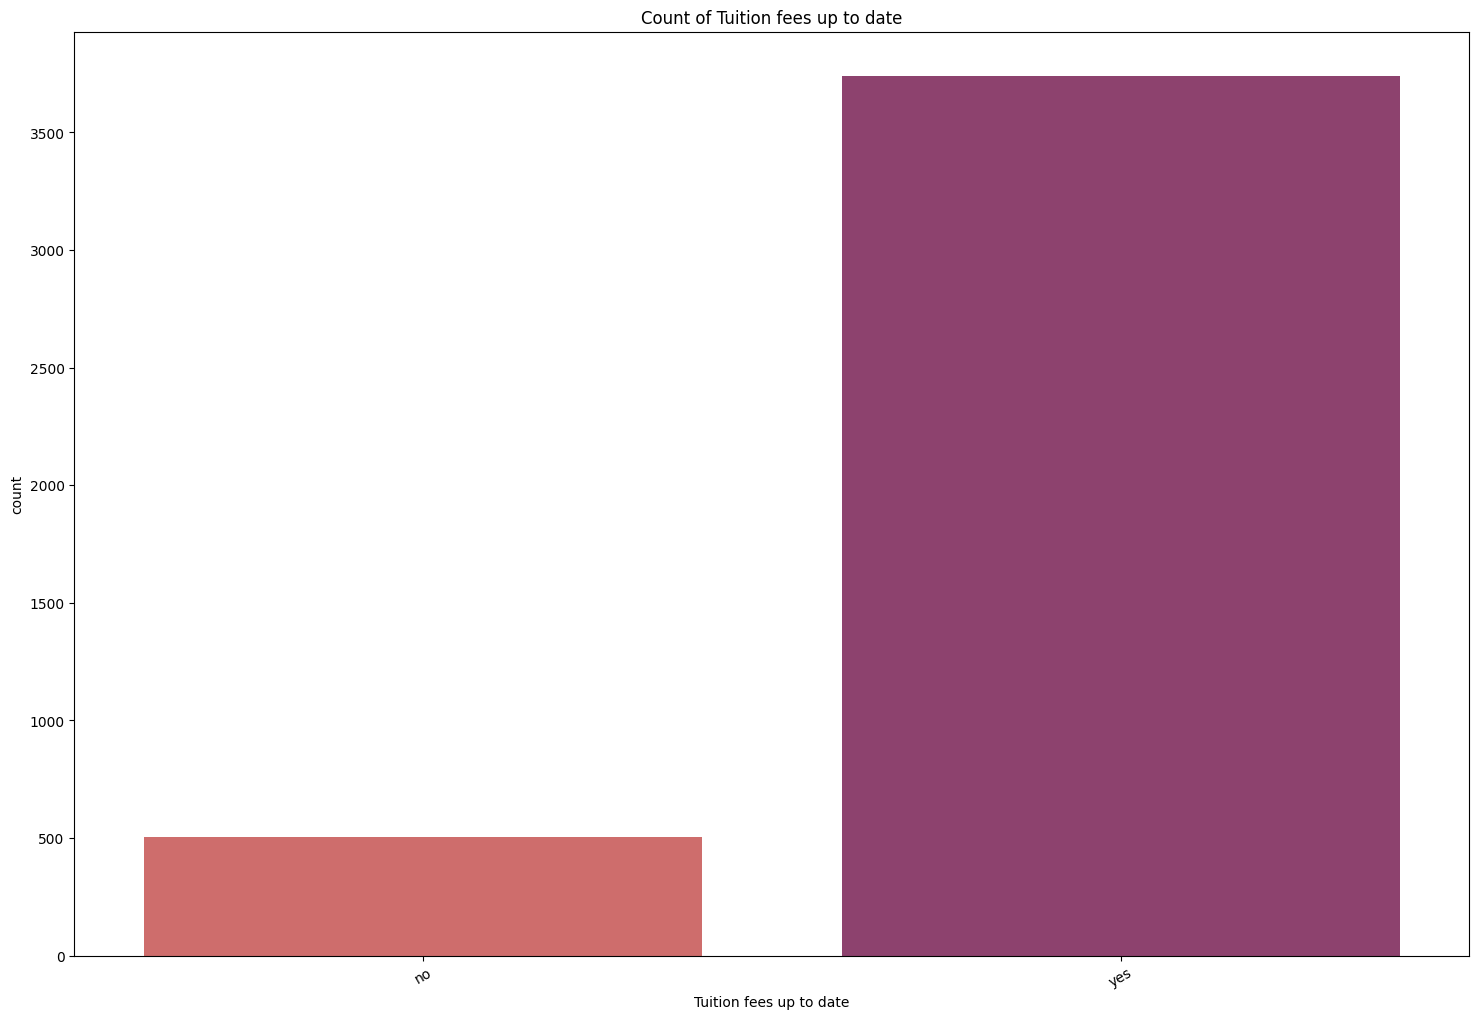

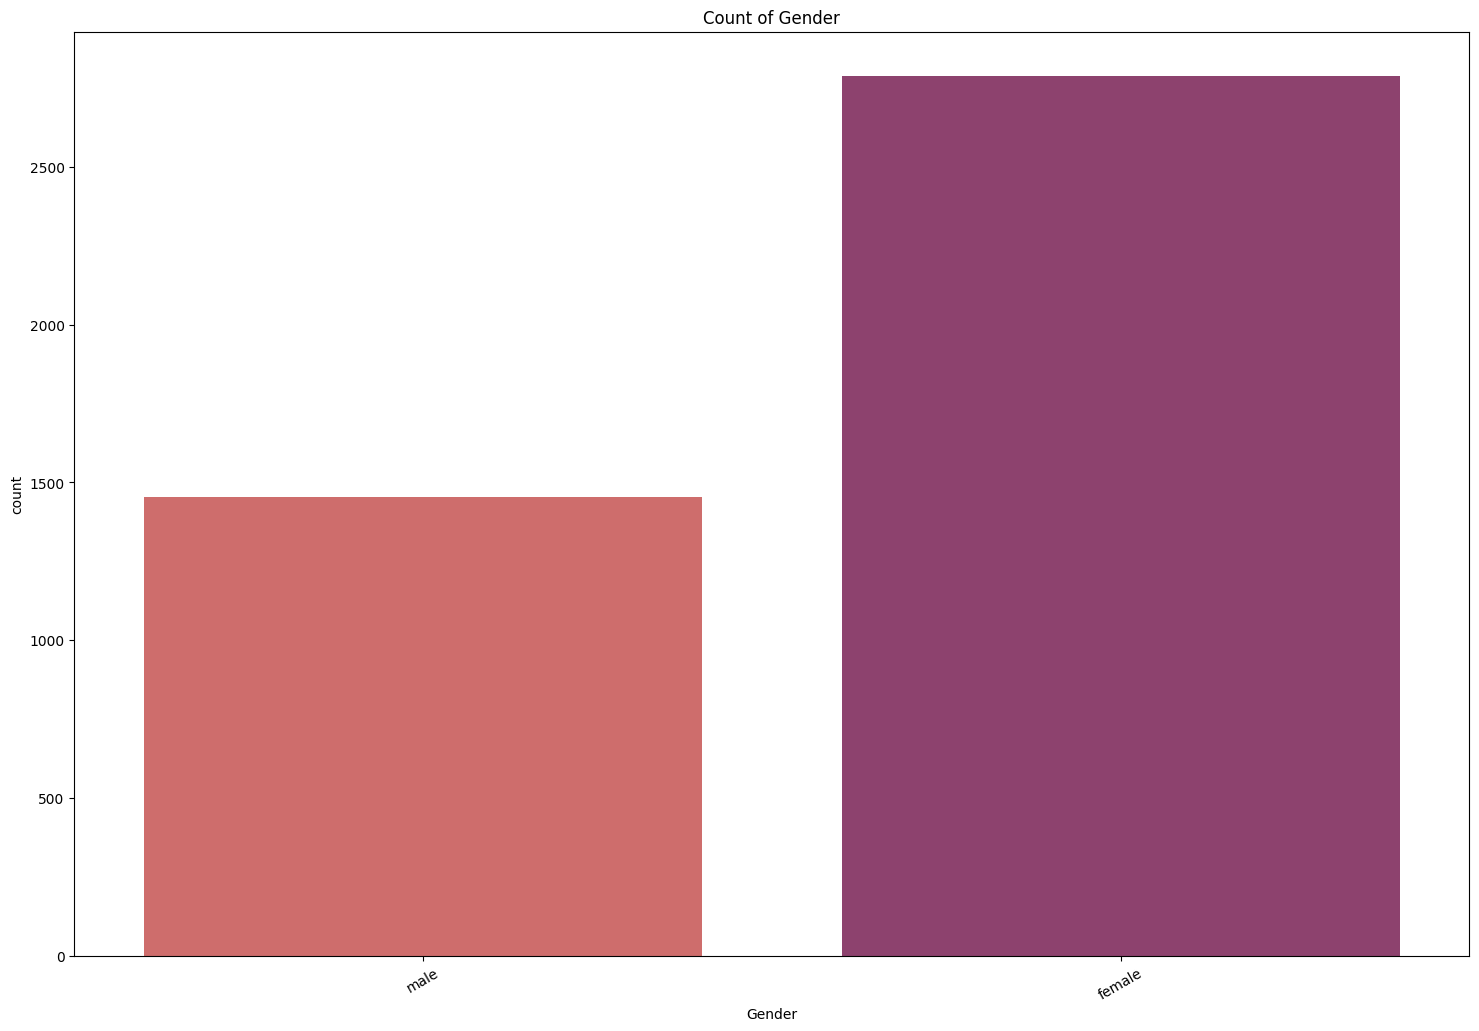

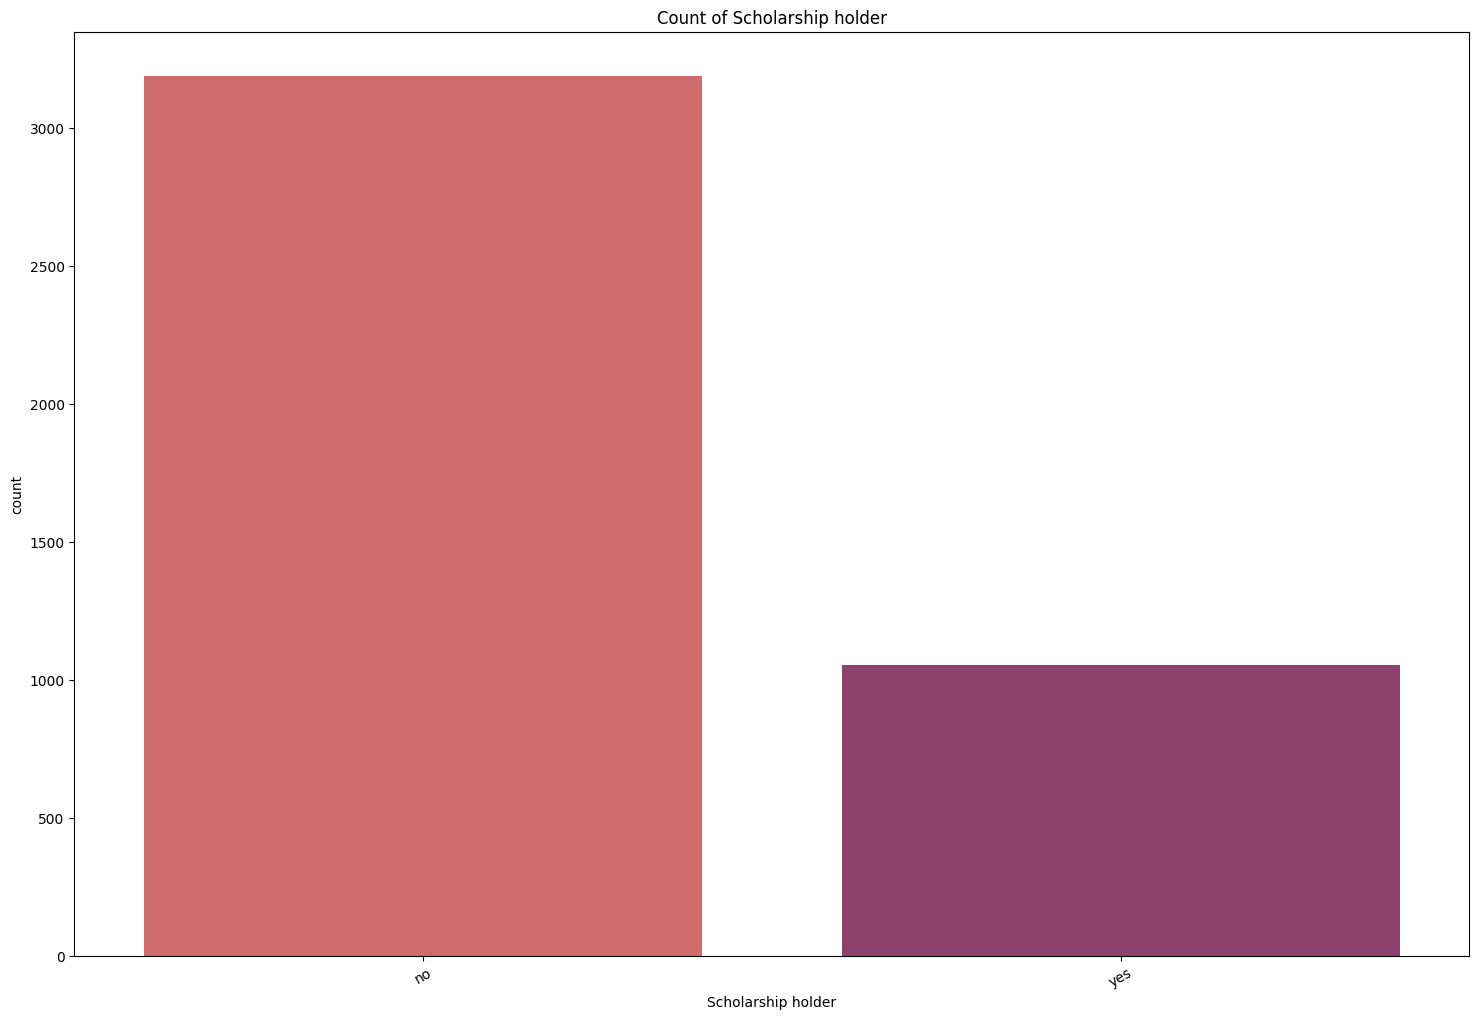

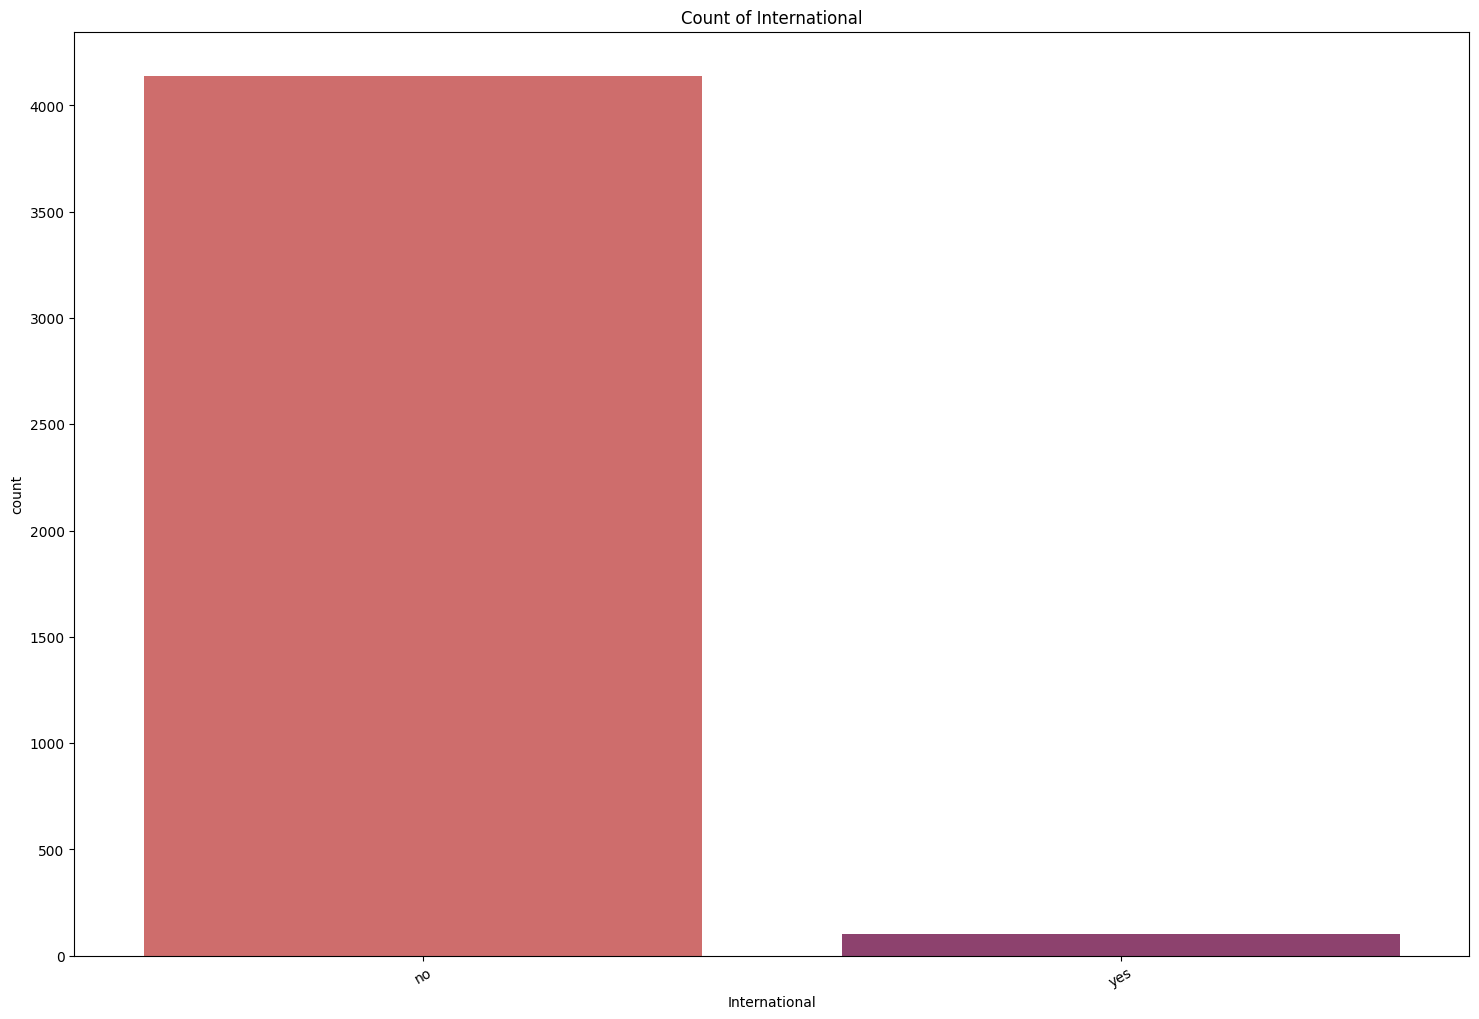

In [34]:

for col in cat_df.columns:
    plt.figure(figsize=(18, 12))
    sns.countplot(x=cat_df[col], hue=cat_df[col], palette="flare")
    plt.xticks(rotation=30)
    plt.title(f"Count of {col}")
    plt.show()


---

## Preliminary Modeling

The five classification machine learning algorithms we decided to use are the following:

- Logistic Regression
- Naive Bayes
- KNN (K-Nearest Neighbors)
- Perceptron
- SVM (Support Vector Machines)

Our baseline modeling will not entail model hyper-tuning, that will be saved for the next section of this notebook. For each model we will use Stratified K-Fold for cross-validation as this will allow us to account for the class imbalance. We will gather the precision, recall, and the F1-score for each class. Another thing to consider is the way we scale our data; numerical features have to be treated differently from categorical features. We will use `StandardScaler()` for the numerical features and `OneHotEncoder()` for the categorical features. Before anything, we need to create our design matrix, X, and response vector Y:

In [35]:
# Split data into X and Y components
X = df_reduced.drop(columns=['Target'])
Y = df_reduced['Target']

# Identify column types
categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(include=['number']).columns
categorical_columns, numerical_columns

(Index(['Marital status', 'Application mode', 'Course',
        'Mother's qualification', 'Father's qualification',
        'Mother's occupation', 'Father's occupation', 'Displaced',
        'Educational special needs', 'Debtor', 'Tuition fees up to date',
        'Gender', 'Scholarship holder', 'International'],
       dtype='object'),
 Index(['Previous qualification (grade)', 'Admission grade',
        'Age at enrollment', 'Curricular units 1st sem (credited)',
        'Curricular units 1st sem (enrolled)',
        'Curricular units 1st sem (approved)',
        'Curricular units 1st sem (grade)'],
       dtype='object'))

Let's now import all the packages necessary to get all the models imported:

In [36]:
# Importing necessary packages
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score

Below is the implementation of the baseline modeling. It is a series of for loops that will do the following:

- Split the data accordingly
- Transform the variables based on their data types
- Fit the models
- Make predictions with the models
- Gather the mean recall, and precision scores along with the F1-score for all the classes.
- Print a data frame summarizing the results

In [37]:
# Initializing stratified k-fold cross-validation
strat_kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 88)

# Initialize a list with all the models we will be using
models = [
    LogisticRegression(solver='liblinear'),
    GaussianNB(),
    KNeighborsClassifier(),
    Perceptron(),
    SVC()
]

# Loop through each model
for model in models:
    # Initialize a list to store the results
    results = []    
    for fold, (train_idx, test_idx) in enumerate(strat_kf.split(X, Y), start = 1):
        # Split the data
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        Y_train, Y_test = Y.iloc[train_idx], Y.iloc[test_idx]

        # Properly transform the data depending on data type
        preprocessors = ColumnTransformer([
        ('num_scaler', StandardScaler(), numerical_columns),
        ('categorical_encoder', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
        ])
        X_train_transformed = preprocessors.fit_transform(X_train)
        X_test_transformed = preprocessors.transform(X_test)

        # Ensure X's are dense and not sparse data type
        # This is necessary because of the OneHotEncoding 
        # making more columns.
        X_train_transformed = (X_train_transformed.todense()).A
        X_test_transformed = (X_test_transformed.todense()).A

        # Train a baseline Naive Bayes Model
        base_model = model
        base_model.fit(X_train_transformed, Y_train)
        
        # Predict
        Y_pred = base_model.predict(X_test_transformed)

        # Compute metrics
        # Using weighted average for some metrics due to class inbalance
        results.append([
            fold,
            precision_score(Y_test, Y_pred, labels=["Graduate"], average=None)[0],
            precision_score(Y_test, Y_pred, labels=["Enrolled"], average=None)[0],
            precision_score(Y_test, Y_pred, labels=["Dropout"], average=None)[0],
            recall_score(Y_test, Y_pred, labels=["Graduate"], average=None)[0],
            recall_score(Y_test, Y_pred, labels=["Enrolled"], average=None)[0],
            recall_score(Y_test, Y_pred, labels=["Dropout"], average=None)[0],
            f1_score(Y_test, Y_pred, labels=["Graduate"], average=None)[0],
            f1_score(Y_test, Y_pred, labels=["Enrolled"], average=None)[0],
            f1_score(Y_test, Y_pred, labels=["Dropout"], average=None)[0]])
        
    # Convert results to DataFrame for tabular display
    df_results = pd.DataFrame(results, columns=["Fold", "Precision_Graduate", "Precision_Enrolled", "Precision_Dropout",
                                                "Recall_Graduate", "Recall_Enrolled", "Recall_Dropout",
                                                "F1_Graduate", "F1_Enrolled", "F1_Dropout"])
    df_results.loc["Average"] = df_results.mean(numeric_only=True)  # Add row for average
    print(f"\nModel: {model.__class__.__name__}")
    print(df_results)  # Display results for each model
    print("\n")



Model: LogisticRegression
         Fold  Precision_Graduate  Precision_Enrolled  Precision_Dropout  \
0         1.0            0.757009            0.641509           0.789272   
1         2.0            0.752345            0.521739           0.792593   
2         3.0            0.748120            0.540000           0.786517   
3         4.0            0.798039            0.516667           0.738351   
4         5.0            0.752896            0.469388           0.750890   
Average   3.0            0.761682            0.537861           0.771524   

         Recall_Graduate  Recall_Enrolled  Recall_Dropout  F1_Graduate  \
0               0.948478         0.222222        0.765799     0.841996   
1               0.939110         0.156863        0.795539     0.835417   
2               0.932084         0.176471        0.780669     0.830031   
3               0.953162         0.201299        0.768657     0.868730   
4               0.915493         0.150327        0.784387     0.826271

---

## Fine-Tuning Models and SMOTE

We noted that among the baseline models, the Gaussian Naive Bayes model obtained the best recall for the “Enrolled” class by a significant margin. However, we also saw that the Naive Bayes model underperformed in essentially every other metric. The best overall baseline performance was obtained by the Logistic Regression and SVM models. Both showed a relatively high accuracy of 0.76, and captured the “Graduate” class similarly well. They differ in that the Logistic Regression model achieved a higher recall of the “Dropout” class, while the SVM achieved higher recall of the “Enrolled” class. We would like to tune the hyperparameters of each of these models, check if oversampling the training data improves performance.


We tried to improve each individual model as much as possible before combining them into a final ensemble model. This consisted of tuning each model’s hyperparameters. We used ‘f1_weighted’ as our metric because of our class imbalances.


Let's start by creating our design matrix ($X$) and response vector ($Y$) appropriately:

In [38]:
from sklearn.model_selection import train_test_split

# Split data into X and Y components
X = df_reduced.drop(columns=['Target'])
Y = df_reduced['Target']

# Identify column types
categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(include=['number']).columns
categorical_columns, numerical_columns

# Split training and test data with stratified sampling
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=88, stratify=Y)

# Process the data
preprocessors = ColumnTransformer([
    ('num_scaler', StandardScaler(), numerical_columns),
    ('categorical_encoder', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ])
X_train_transformed = preprocessors.fit_transform(X_train)
X_test_transformed = preprocessors.transform(X_test)

# Ensure X's are dense and not sparse data type
# This is necessary because of the OneHotEncoding 
# making more columns.

X_train_transformed = (X_train_transformed.todense()).A
X_test_transformed = (X_test_transformed.todense()).A

### Logistic Regression Fine Tuning

In [39]:
# Packages for fine tuning
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

The most substantial opportunity for hypertuning this model is manually adjusting the impact of a regularization term, in order to prevent overfitting to the training data. We also looked into the hyperparameter $C$ which works in a similar way to the $C$ in SVM. Finally, we tested a different solver and a different number of maximum iterations.

In [40]:
# Defining parameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 500, 1000, 5000]
}

# Defining logistic regression model and gridsearchcv
logis_model = LogisticRegression()

grid = GridSearchCV(estimator=logis_model, param_grid=param_grid, cv=StratifiedKFold(n_splits=5), scoring='f1_weighted')
grid.fit(X_train_transformed, Y_train)
print("Best Weighted F1 score: ", grid.best_score_)
print("Best Parameters: ", grid.best_params_, "\n")

# Predictions
best_logis = grid.best_estimator_
Y_pred_logis = best_logis.predict(X_test_transformed)


print('Best Logistic Regression Model Performance:')
print(classification_report(Y_test, Y_pred_logis))
print()

Best Weighted F1 score:  0.7341655031200873
Best Parameters:  {'C': 10, 'max_iter': 500, 'penalty': 'l1', 'solver': 'saga'} 

Best Logistic Regression Model Performance:
              precision    recall  f1-score   support

     Dropout       0.80      0.75      0.77       269
    Enrolled       0.49      0.24      0.32       153
    Graduate       0.77      0.94      0.84       427

    accuracy                           0.75       849
   macro avg       0.69      0.64      0.65       849
weighted avg       0.73      0.75      0.73       849




We found that after hypertuning with GridSearchCV, the L1 penalty is optimal for our Logistic Regression model which introduces sparsity in our coefficients. The optimal parameters included a $C$ value of 10, maximum iterations of 500, and using the `saga` solver instead of `liblinear`. However, although overall model accuracy increased, the predictions for the Enrolled class still lagged behind.

### Support Vector Machine Fine Tuning

The Support Vector Machine allows the use of different kernel functions and coefficients for those kernels, rather than the default radial kernel. It also permits adjustment of the parameter $C$, which controls the penalty of margin violations and thus affects the width of the margin. 

In [41]:
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],  # Kernel coefficients
    'kernel': ['rbf', 'poly', 'sigmoid']  #  Kernels
}

# SVM model
svm_model = SVC()

grid = GridSearchCV(estimator=svm_model, param_grid=param_grid,cv=StratifiedKFold(n_splits=5),scoring='f1_weighted')
grid.fit(X_train_transformed, Y_train)

# Best hyperparameters and score
print("Best Weighted F1 score: ", grid.best_score_)
print("Best Parameters: ", grid.best_params_, "\n")

# Predictions
best_svm = grid.best_estimator_
Y_pred_svm = best_svm.predict(X_test_transformed)

print('Best SVM Model Performance:')
print(classification_report(Y_test, Y_pred_svm))

Best Weighted F1 score:  0.7374119869565299
Best Parameters:  {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'} 

Best SVM Model Performance:
              precision    recall  f1-score   support

     Dropout       0.81      0.73      0.77       269
    Enrolled       0.48      0.28      0.35       153
    Graduate       0.77      0.93      0.84       427

    accuracy                           0.75       849
   macro avg       0.69      0.65      0.66       849
weighted avg       0.73      0.75      0.73       849



We found that after hypertuning with GridSearchCV, we found that a $C$ value of 10 was optimal. Also, the radial kernel remained as the best kernel and leaving the ‘gamma’ parameter as ‘auto’ made the model optimal. 

*Note: Due to the nature of the algorithm, there was not much flexibility to tune the Gaussian Naive Bayes model. For this reason, we decided to simply pass it through with default parameters to the later modeling processes. Below is a computation of its weighted F1 score for the sake of comparison.*

In [42]:
# NB model
gaus_nb = GaussianNB()
gaus_nb.fit(X_train_transformed, Y_train)

# Getting weighted f1 score
Y_pred_nb = gaus_nb.predict(X_test_transformed)
weighted_f1_nb = f1_score(Y_test, Y_pred_nb, average='weighted')
print(f'Weighted F1 Score: {weighted_f1_nb:.2f}')

Weighted F1 Score: 0.66


#### Fine Tuning  Summary

- Logistic Regression: Weighted F1 Score of **0.73**
    - Graduate F1 Score before: 0.84 || Graduate F1 Score after: 0.84 (**+0.00**)
    - Enrolled F1 Score before: 0.27 || Enrolled F1 Score after: 0.32 (**+0.05**)
    - Dropout F1 Score before: 0.78 || Dropout F1 Score after: 0.77 (**-0.01**)

- SVM: Weighted F1 Score of **0.74**
    - Graduate F1 Score before: 0.84 || Graduate F\1 Score after: 0.81 (**-0.03**)
    - Enrolled F1 Score before: 0.33 || Enrolled F1 Score after: 0.35 (**+0.02**)
    - Dropout F1 Score before: 0.77 || Dropout F1 Score after: 0.77 (**+0.00**)

- Gaussian Naive Bayes (*NOT fine tuned*): Weighted F1 Score of **0.66**
    - Graduate F1 Score before: 0.71 
    - Enrolled F1 Score before: 0.36 
    - Dropout F1 Score before: 0.59 

### SMOTE

In [44]:
from imblearn.over_sampling import SMOTENC # SMOTE Package for multi-class classification

Suspecting that the imbalance of classes was behind the lackluster prediction of the “Enrolled” class, we considered the use of oversampling methods to rebalance classes in the training data. We specifically used the SMOTE (Synthetic Minority Over-Sampling Technique) algorithm to implement this rebalancing. Using the optimal hyperparameters we found in the previous section, we experimented with using SMOTE during the training of each model to see if it improved performance, particularly on the “Enrolled” minority class.

Let's implement SMOTE over our three models. First, we'll resample our X and Y accordingly:

In [45]:
# Getting the indices for the categorical columns
cat_indices = [X.columns.get_loc(col) for col in categorical_columns]

# Creating the SMOTE objects
smote = SMOTENC(categorical_features = cat_indices, random_state = 88)

# Applying SMOTE to X and Y
X_resampled , Y_resampled = smote.fit_resample(X_train_transformed, Y_train)

Now, we'll fit new Logistic Regression, SVM, and Naive Bayes models with SMOTE:

In [46]:
# Fitting models with new X and Y
logis_smote = best_logis.fit(X_resampled, Y_resampled)
svm_smote = best_svm.fit(X_resampled, Y_resampled)
nb_smote = gaus_nb.fit(X_resampled, Y_resampled)

# Making predictions
Y_pred_logis_smote = logis_smote.predict(X_test_transformed)
Y_pred_svm_smote = svm_smote.predict(X_test_transformed)
Y_pred_nb_smote = nb_smote.predict(X_test_transformed)

# Printing results
weighted_f1_logis_smote = f1_score(Y_test, Y_pred_logis_smote, average='weighted')
print(f'Best Logistic Regression Model with SMOTE Performance: Weighted F1 of {weighted_f1_logis_smote:.2f}')
print(classification_report(Y_test, Y_pred_logis_smote),'\n')

weighted_f1_svm_smote = f1_score(Y_test, Y_pred_svm_smote, average='weighted')
print(f'Best SVM Model with SMOTE Performance: Weighted F1 of {weighted_f1_svm_smote:.2f}')
print(classification_report(Y_test, Y_pred_svm_smote),'\n')

weighted_f1_nb_smote = f1_score(Y_test, Y_pred_nb_smote, average='weighted')
print(f'Gaussian Naive Bayes Model with SMOTE Performance: Weighted F1 of {weighted_f1_nb_smote:.2f}')
print(classification_report(Y_test, Y_pred_nb_smote))

Best Logistic Regression Model with SMOTE Performance: Weighted F1 of 0.74
              precision    recall  f1-score   support

     Dropout       0.82      0.70      0.76       269
    Enrolled       0.44      0.52      0.48       153
    Graduate       0.82      0.85      0.83       427

    accuracy                           0.74       849
   macro avg       0.69      0.69      0.69       849
weighted avg       0.75      0.74      0.74       849
 

Best SVM Model with SMOTE Performance: Weighted F1 of 0.73
              precision    recall  f1-score   support

     Dropout       0.82      0.67      0.74       269
    Enrolled       0.41      0.48      0.44       153
    Graduate       0.80      0.85      0.82       427

    accuracy                           0.72       849
   macro avg       0.68      0.67      0.67       849
weighted avg       0.74      0.72      0.73       849
 

Gaussian Naive Bayes Model with SMOTE Performance: Weighted F1 of 0.61
              precision    re

As we can see, over the three models when we applied SMOTE, the Enrolled class’ F1 score increased. However, scores for the other classes decreased, with Naive Bayes taking the most dramatic hit.

#### Summary of SMOTE's effect

- Tuned Logistic Regression: Weighted F1 of **0.74**
    - Graduate F1 Score before SMOTE: 0.84 || Graduate F1 Score after SMOTE: 0.83 (**-0.01**)
    - Enrolled F1 Score before SMOTE: 0.32 || Enrolled F1 Score after SMOTE: 0.48 (**+0.16**)
    - Dropout F1 Score before SMOTE: 0.77 || Dropout F1 Score after SMOTE: 0.76 (**-0.01**)

- Tuned SVM: Weighted F1 of **0.73**
    - Graduate F1 Score before SMOTE: 0.84 || Graduate F1 Score after SMOTE: 0.82 (**-0.02**)
    - Enrolled F1 Score before SMOTE: 0.35 || Enrolled F1 Score after SMOTE: 0.44 (**+0.09**)
    - Dropout F1 Score before SMOTE: 0.77 || Dropout F1 Score after SMOTE: 0.74 (**-0.03**)

- Gaussian Naive Bayes: Weighted F1 of **0.73**
    - Graduate F1 Score before SMOTE: 0.71 || Graduate F1 Score after SMOTE: 0.67 (**-0.04**)
    - Enrolled F1 Score before SMOTE: 0.36 || Enrolled F1 Score after SMOTE: 0.38 (**+0.02**)
    - Dropout F1 Score before SMOTE: 0.59 || Dropout F1 Score after SMOTE: 0.66 (**+0.07**)

---

## Ensemble Model

Each of the Logistic Regression, Naive Bayes, and SVM models displayed their own strengths and weaknesses. We thought that the best way to aggregate the advantages of each model would be to implement an ensemble model that averaged the predictions of each algorithm. For this objective, we used sci-kit learn’s Voting Classifier model with the “soft voting” option. Soft voting enables the ensemble to make a decision by averaging each class’s predicted probability among all of the constituent models.


The voting classifier accepts a weight parameter, useful for emphasizing the predictions of one constituent model over another. Using a grid search with 5-fold cross-validation, we optimized the weight vector which resulted in an emphasis on the SVM component, with two lesser, equal weights on the Logistic Regression and Naive Bayes model.

Let's initialize the voting model and the hypertuned learners within it:

In [47]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[
    ('logistic', LogisticRegression(C = 10, max_iter = 500, penalty = 'l1', solver = 'saga')),
    ('svm', SVC(C = 10, kernel = 'rbf', gamma = 'auto', probability = True)),
    ('naive_bayes', GaussianNB())
], voting='soft')

Now, we will do Grid Search to get the optimal voting ensemble classifier:

In [48]:
log_weights = range(1, 4)
svm_weights = range(1, 4)
nb_weights = range(1, 4)

weights_grid = []
for i in log_weights:
    for j in svm_weights:
        for k in nb_weights:
            weights_grid.append((i, j, k))

# Grid search to find best value of weights for soft voting classifier
grid = GridSearchCV(estimator=voting, param_grid={'weights': weights_grid}, 
                    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=88), scoring='f1_weighted')
grid.fit(X_resampled, Y_resampled)
print("Best Weighted F1 Score: ", grid.best_score_)
print("Best Parameters: ", grid.best_params_)

Best Weighted F1 Score:  0.7594960193630147
Best Parameters:  {'weights': (3, 3, 1)}


In [49]:
# Fit the best estimator on the entire training set
best_voting = grid.best_estimator_
Y_pred_voting = best_voting.predict(X_test_transformed)

# Printing
weighted_f1_voting = f1_score(Y_test, Y_pred_voting, average='weighted')
print(f'Voting Ensemble Model with SMOTE Performance: Weighted F1 {weighted_f1_voting:.2f}')
print(classification_report(Y_test, Y_pred_voting))

Voting Ensemble Model with SMOTE Performance: Weighted F1 0.74
              precision    recall  f1-score   support

     Dropout       0.83      0.68      0.75       269
    Enrolled       0.42      0.53      0.47       153
    Graduate       0.82      0.84      0.83       427

    accuracy                           0.73       849
   macro avg       0.69      0.68      0.68       849
weighted avg       0.75      0.73      0.74       849

